In [23]:
import pandas as pd
import numpy as np
import time

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pickle

_ = np.random.seed(0)

import pyabc
from pyabc import ABCSMC, Distribution, RV, MultivariateNormalTransition, QuantileEpsilon
import tempfile

pyabc.settings.set_figure_params('pyabc') 

In [24]:
def ode_system(y, t, beta, kappa, gamma, N):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - kappa * E
    dIdt = kappa * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

def simulate(parameters, ic, T):
    beta, kappa, gamma = parameters
    S0, E0, I0, R0 = ic

    N  = S0 + E0 + I0 + R0
    y0 = ic
    
    t = np.arange(T+1)
    ret = odeint(ode_system, y0, t, args=(beta, kappa, gamma, N))

    return ret[1:]

In [26]:
N  = 100000
E0 = 0
I0 = 10
R0 = 0
S0 = N - E0 - I0 - R0

init_cond = [S0, E0, I0, R0]

duration=100

In [27]:
with open('../sim_dataset.pkl', 'rb') as f:
    simulation_dataset = pickle.load(f)

In [28]:
def model(params):
    pvec = [
        params['beta'],
        params['kappa'],
        params['gamma']
    ]
    sim = simulate(pvec, init_cond, T=duration)
    
    return {'cases1': poisson_noise(params['kappa'] * sim[:,1])}

def distance(sim, obs):

    return np.linalg.norm(sim['cases1']-obs['cases1'])

In [29]:
eps = QuantileEpsilon(initial_epsilon='from_sample', alpha=0.2)
transition = MultivariateNormalTransition(scaling=0.5)

In [30]:
prior = Distribution(
    beta=RV("uniform", 0.2, 1.5),
    kappa=RV("uniform", 0.1, 0.5),
    gamma=RV("uniform", 0.05, 0.4)
)

In [31]:
results = []
gene_num = 10

for i, sim in enumerate(simulation_dataset):
    obs_data = sim['poisson']
    obs_dict={"cases1": obs_data[:,0]}
 
    db_path = "sqlite:///" + tempfile.mkstemp(suffix=f"abc_{i}.db")[1]

    abc = ABCSMC(model, prior, distance, population_size=100, transitions=transition, eps=eps)
    abc.new(db_path, obs_dict)

    start_time = time.time()
    history = abc.run(max_total_nr_simulations=1000)
    end_time = time.time()

    df_posterior = history.get_distribution()
    
    results.append({
        "id": i,
        "params": sim['params'],
        "posterior": df_posterior,
        "populations": history.get_all_populations(),
        "runtime": end_time - start_time
    })

    print(f"[{i}] Done in {end_time - start_time:.2f} seconds")

ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:54:39>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 9.84590142e+03.
ABC INFO: Accepted: 100 / 548 = 1.8248e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.23079316e+03.
ABC INFO: Accepted: 100 / 497 = 2.0121e-01, ESS: 7.7783e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.618333, end_time=2026-01-26 18:54:44>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:54:44>
ABC INFO: Calibration sample t = -1.


[0] Done in 4.61 seconds


ABC INFO: t: 0, eps: 9.84558683e+03.
ABC INFO: Accepted: 100 / 593 = 1.6863e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.05183550e+03.
ABC INFO: Accepted: 100 / 623 = 1.6051e-01, ESS: 7.2719e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.887929, end_time=2026-01-26 18:54:49>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:54:49>
ABC INFO: Calibration sample t = -1.


[1] Done in 4.88 seconds


ABC INFO: t: 0, eps: 1.35705689e+04.
ABC INFO: Accepted: 100 / 450 = 2.2222e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.54756413e+03.
ABC INFO: Accepted: 100 / 465 = 2.1505e-01, ESS: 8.0284e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.432718, end_time=2026-01-26 18:54:53>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:54:53>
ABC INFO: Calibration sample t = -1.


[2] Done in 4.43 seconds


ABC INFO: t: 0, eps: 1.02900615e+04.
ABC INFO: Accepted: 100 / 611 = 1.6367e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.00082015e+03.
ABC INFO: Accepted: 100 / 503 = 1.9881e-01, ESS: 6.3553e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.363309, end_time=2026-01-26 18:54:58>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:54:58>
ABC INFO: Calibration sample t = -1.


[3] Done in 4.36 seconds


ABC INFO: t: 0, eps: 1.28584490e+04.
ABC INFO: Accepted: 100 / 522 = 1.9157e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.41498661e+03.
ABC INFO: Accepted: 100 / 554 = 1.8051e-01, ESS: 8.0253e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.619068, end_time=2026-01-26 18:55:02>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:02>
ABC INFO: Calibration sample t = -1.


[4] Done in 4.61 seconds


ABC INFO: t: 0, eps: 1.21596526e+04.
ABC INFO: Accepted: 100 / 623 = 1.6051e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.09126227e+03.
ABC INFO: Accepted: 100 / 494 = 2.0243e-01, ESS: 8.9335e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.413087, end_time=2026-01-26 18:55:07>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:07>
ABC INFO: Calibration sample t = -1.


[5] Done in 4.41 seconds


ABC INFO: t: 0, eps: 1.23409600e+04.
ABC INFO: Accepted: 100 / 592 = 1.6892e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.44121687e+03.
ABC INFO: Accepted: 100 / 580 = 1.7241e-01, ESS: 8.1755e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.658156, end_time=2026-01-26 18:55:12>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:12>
ABC INFO: Calibration sample t = -1.


[6] Done in 4.65 seconds


ABC INFO: t: 0, eps: 9.79827951e+03.
ABC INFO: Accepted: 100 / 674 = 1.4837e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.31539340e+03.
ABC INFO: Accepted: 100 / 572 = 1.7483e-01, ESS: 5.7819e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.447011, end_time=2026-01-26 18:55:16>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:16>
ABC INFO: Calibration sample t = -1.


[7] Done in 4.44 seconds


ABC INFO: t: 0, eps: 1.97433080e+04.
ABC INFO: Accepted: 100 / 458 = 2.1834e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.97314667e+03.
ABC INFO: Accepted: 100 / 670 = 1.4925e-01, ESS: 7.3126e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:04.371636, end_time=2026-01-26 18:55:20>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:20>
ABC INFO: Calibration sample t = -1.


[8] Done in 4.37 seconds


ABC INFO: t: 0, eps: 1.23955852e+04.
ABC INFO: Accepted: 100 / 421 = 2.3753e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.90588389e+03.
ABC INFO: Accepted: 100 / 482 = 2.0747e-01, ESS: 8.0029e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:03.503174, end_time=2026-01-26 18:55:24>


[9] Done in 3.50 seconds


In [32]:
with open("./results/M1_1k.pkl", "wb") as f:
    pickle.dump(results, f)

In [33]:
param_names = ["beta", "kappa","gamma"]

In [34]:
posterior_samples_1k=[]
for i, res in enumerate(results):  # results[i]['history']가 history 객체
    df, weights = res['posterior']
    df = df[param_names]
    
    kde_estimator = pyabc.transition.MultivariateNormalTransition()
    kde_estimator.fit(df, weights)
    
    num_samples = 10000
    samples = kde_estimator.rvs(num_samples)
    posterior_samples_1k.append(samples)

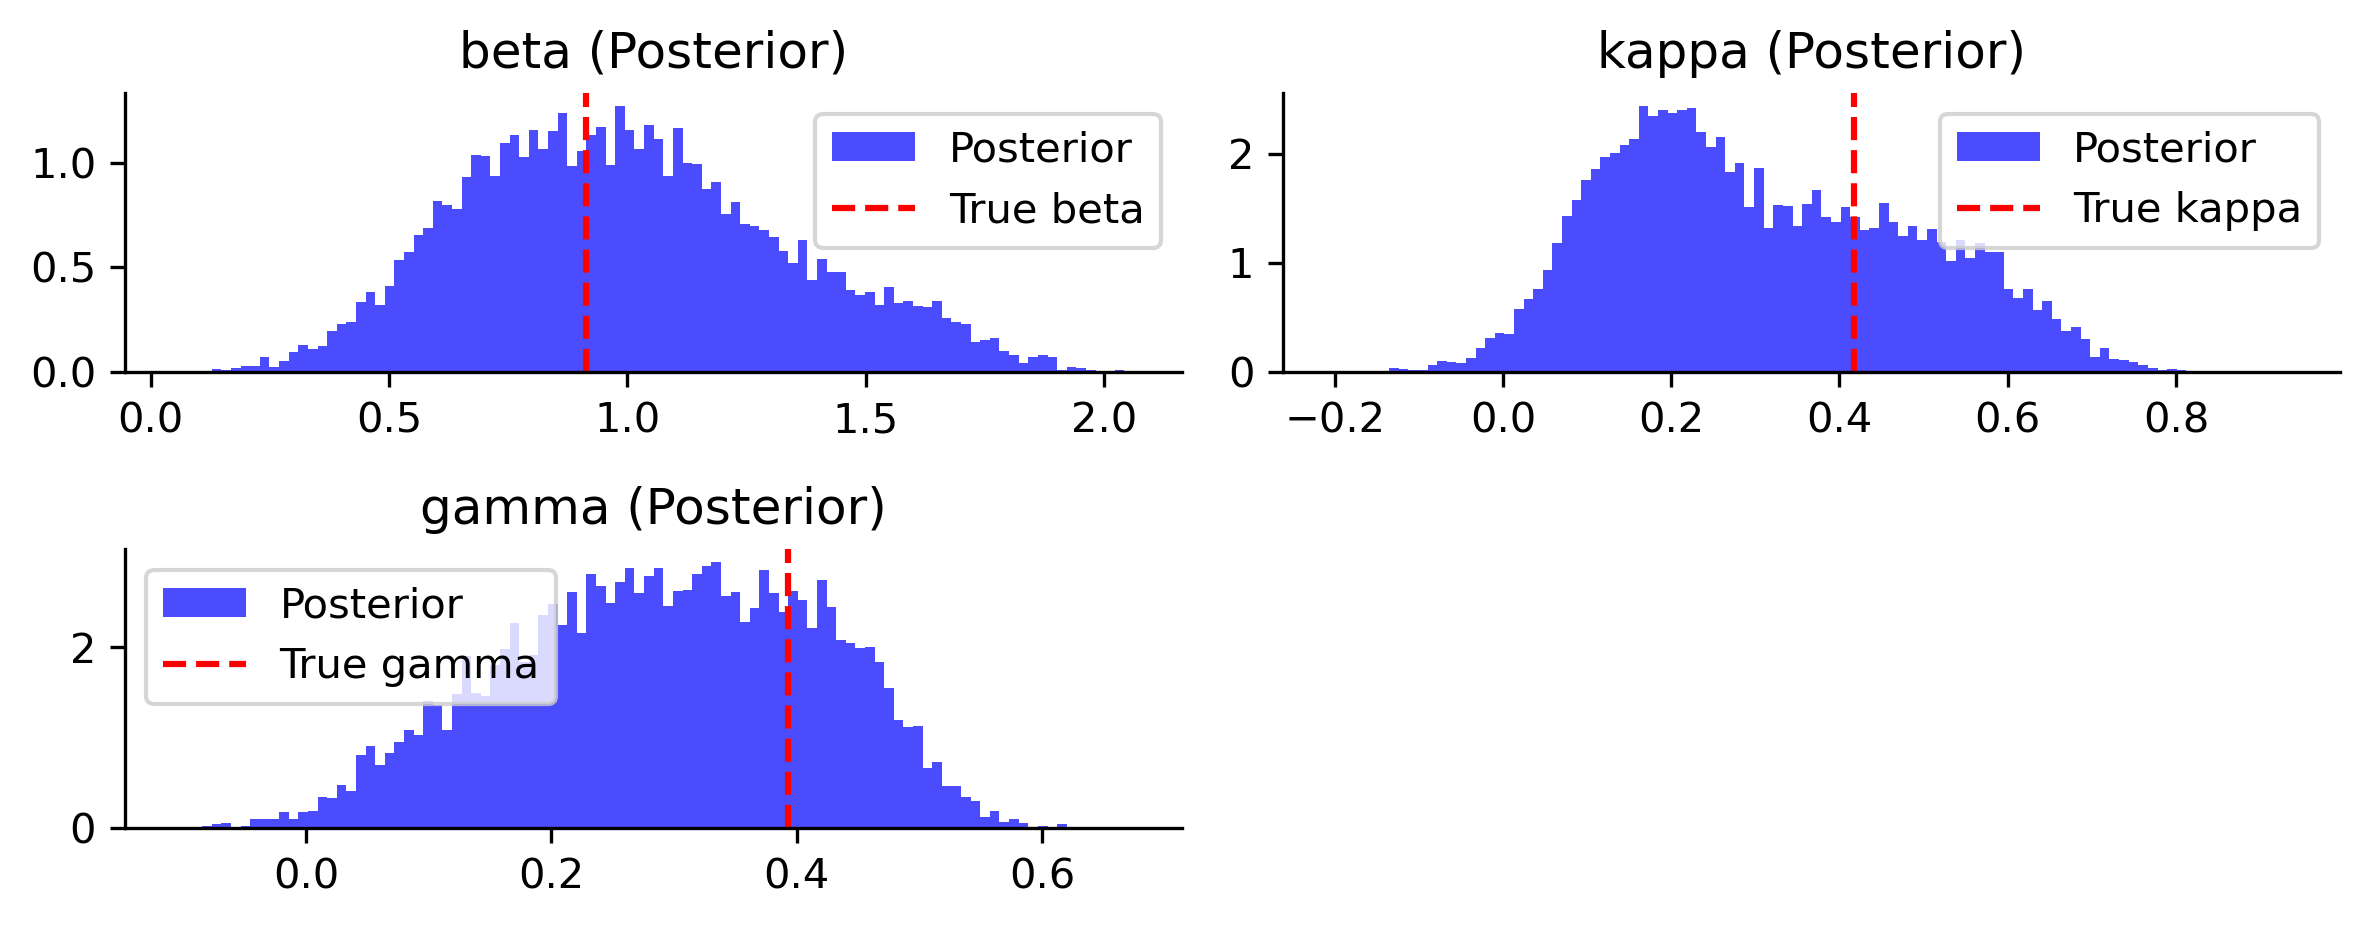

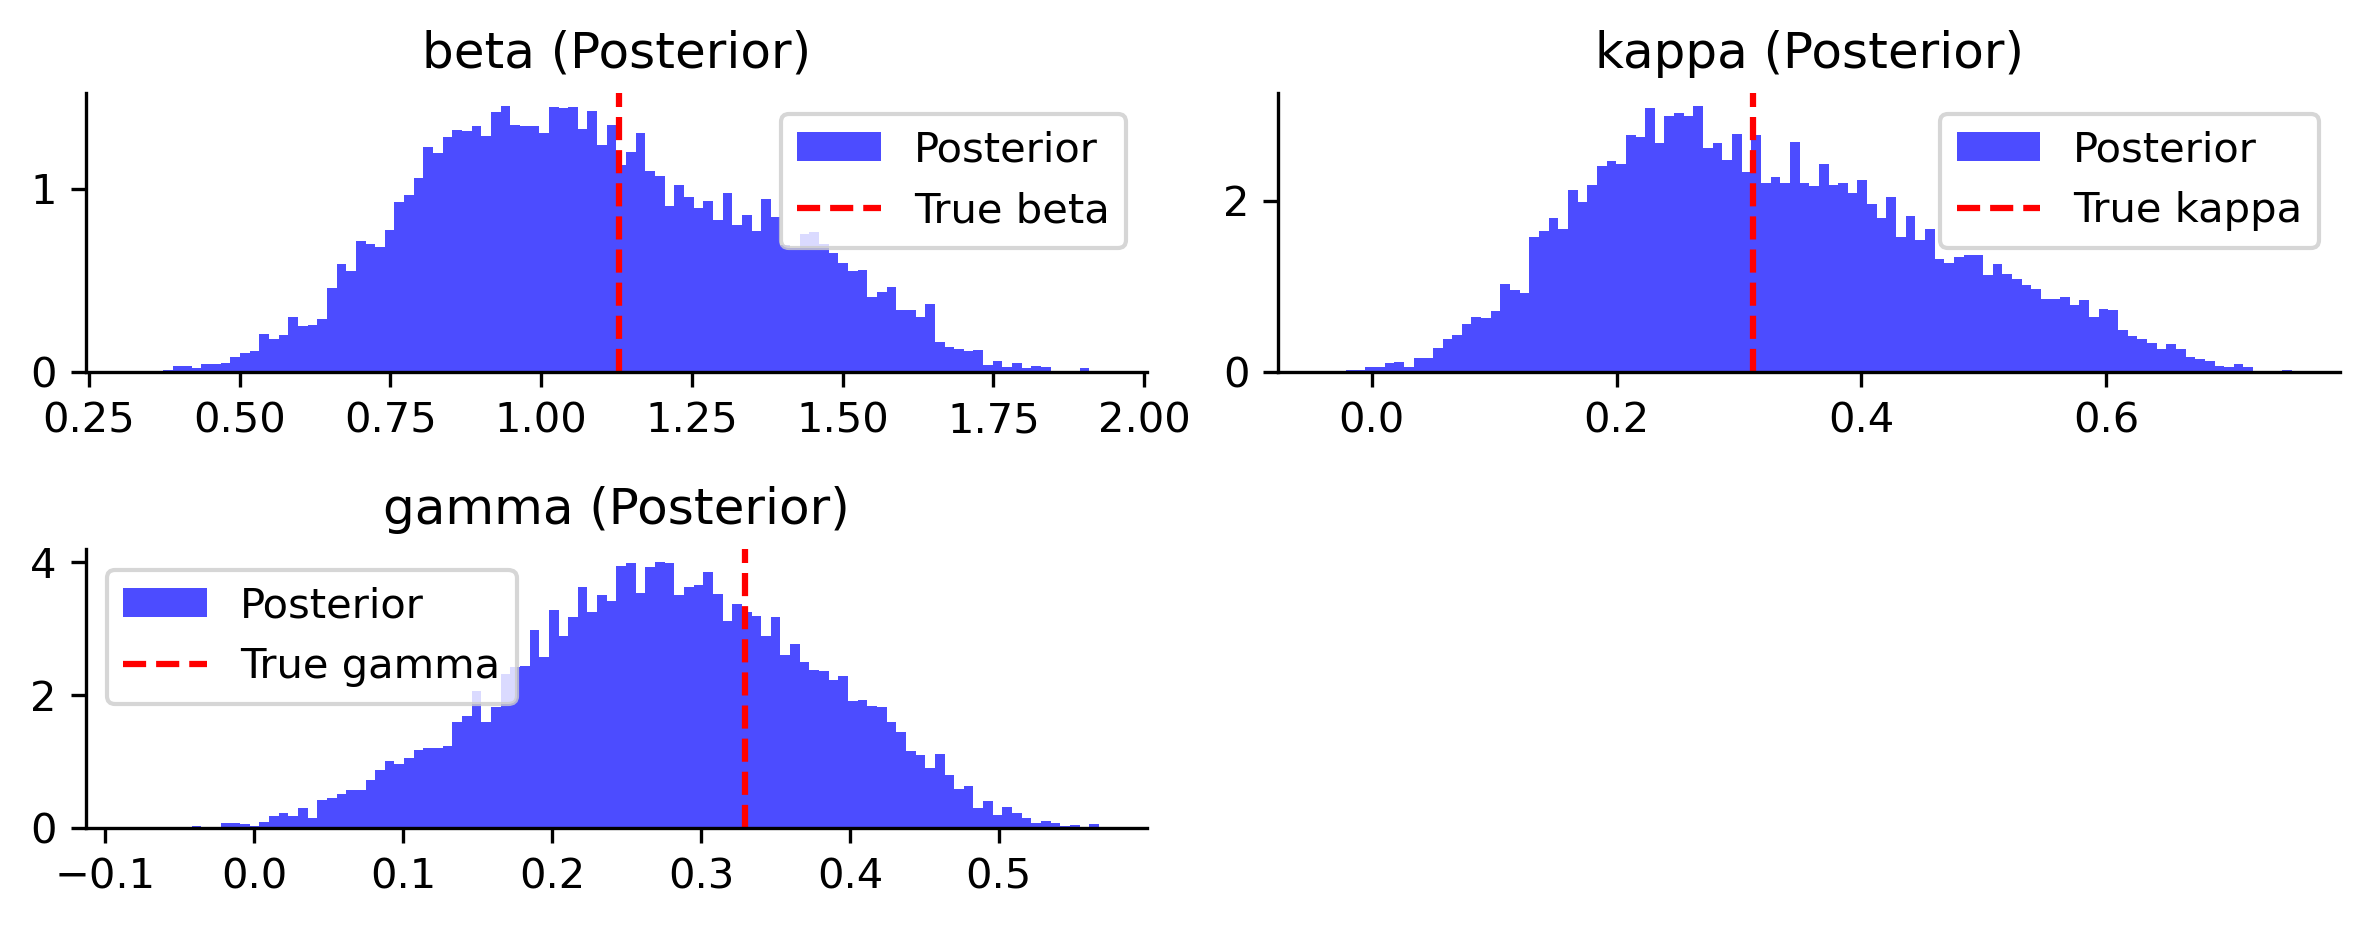

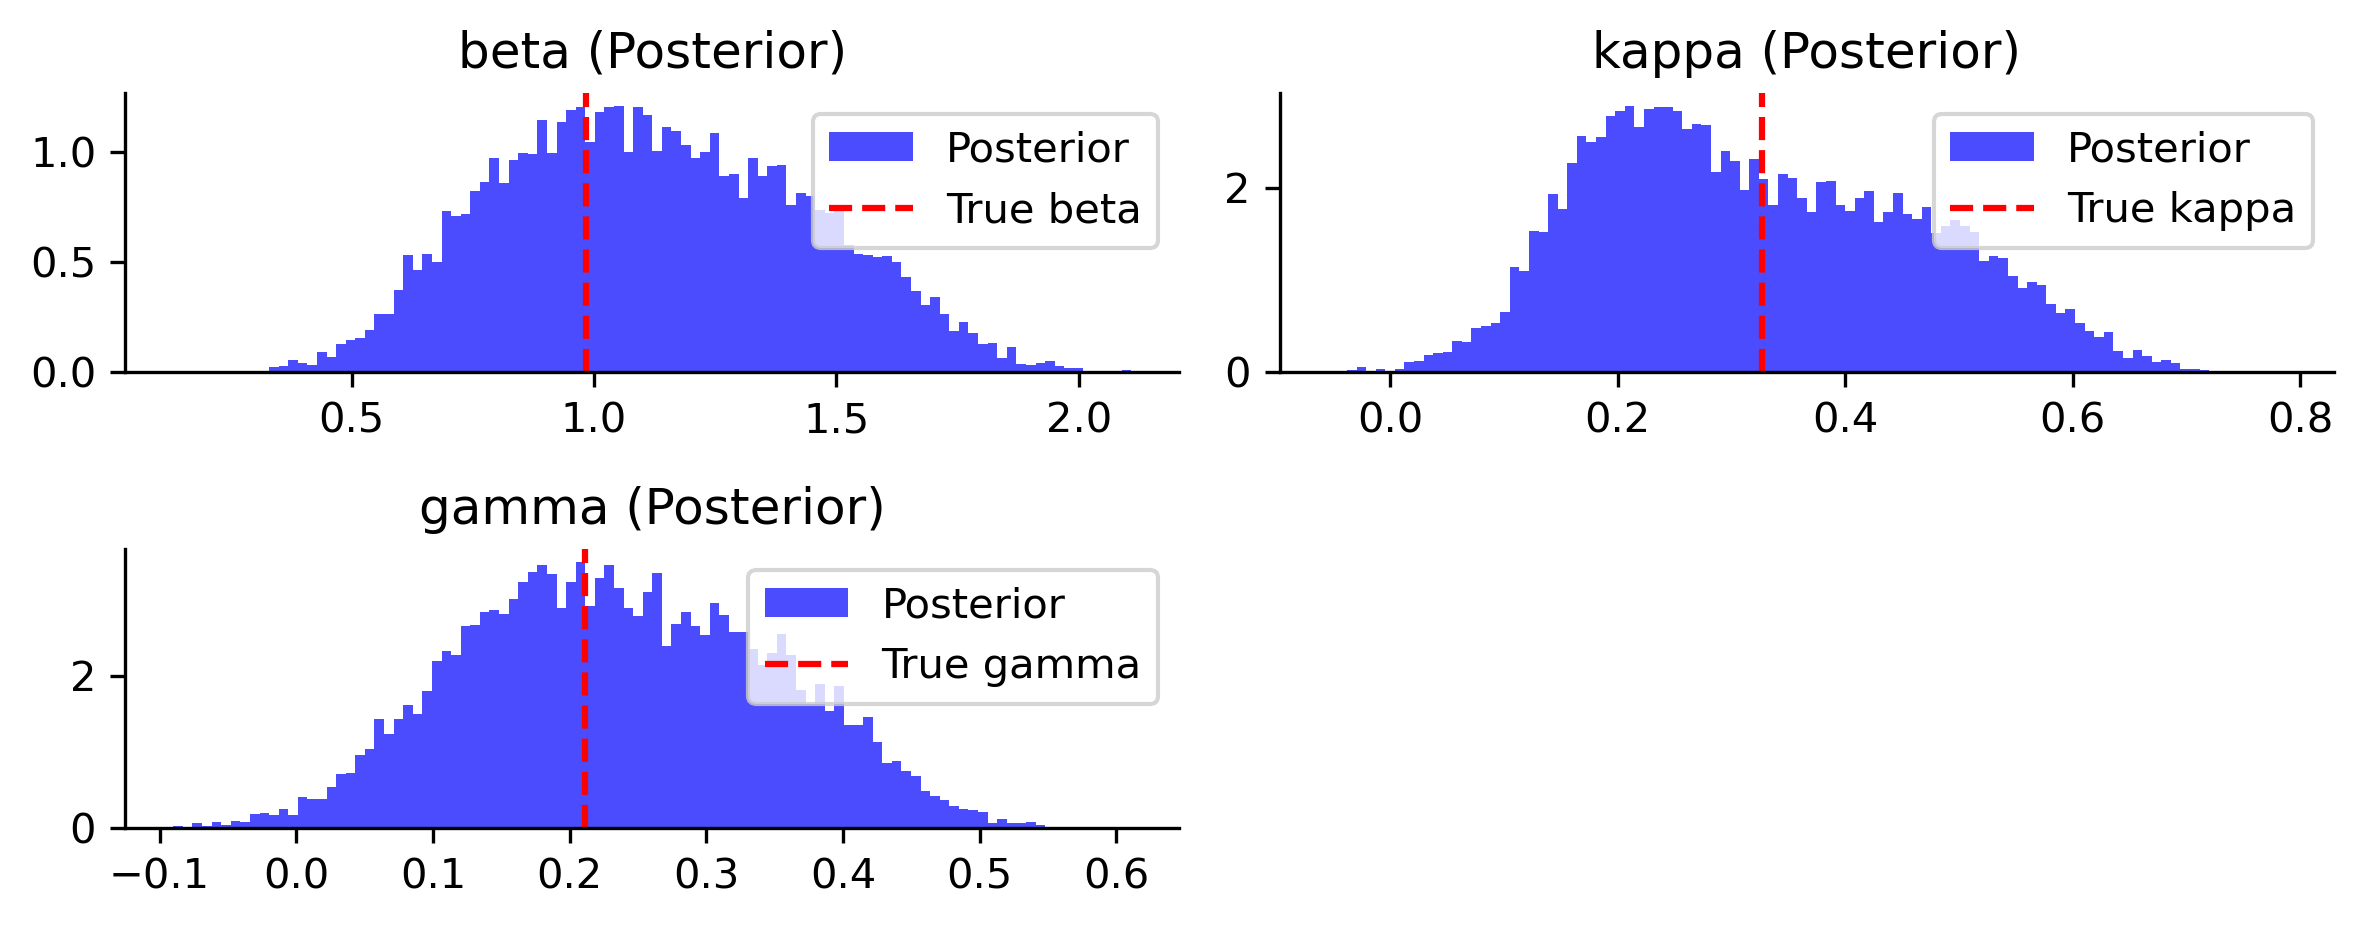

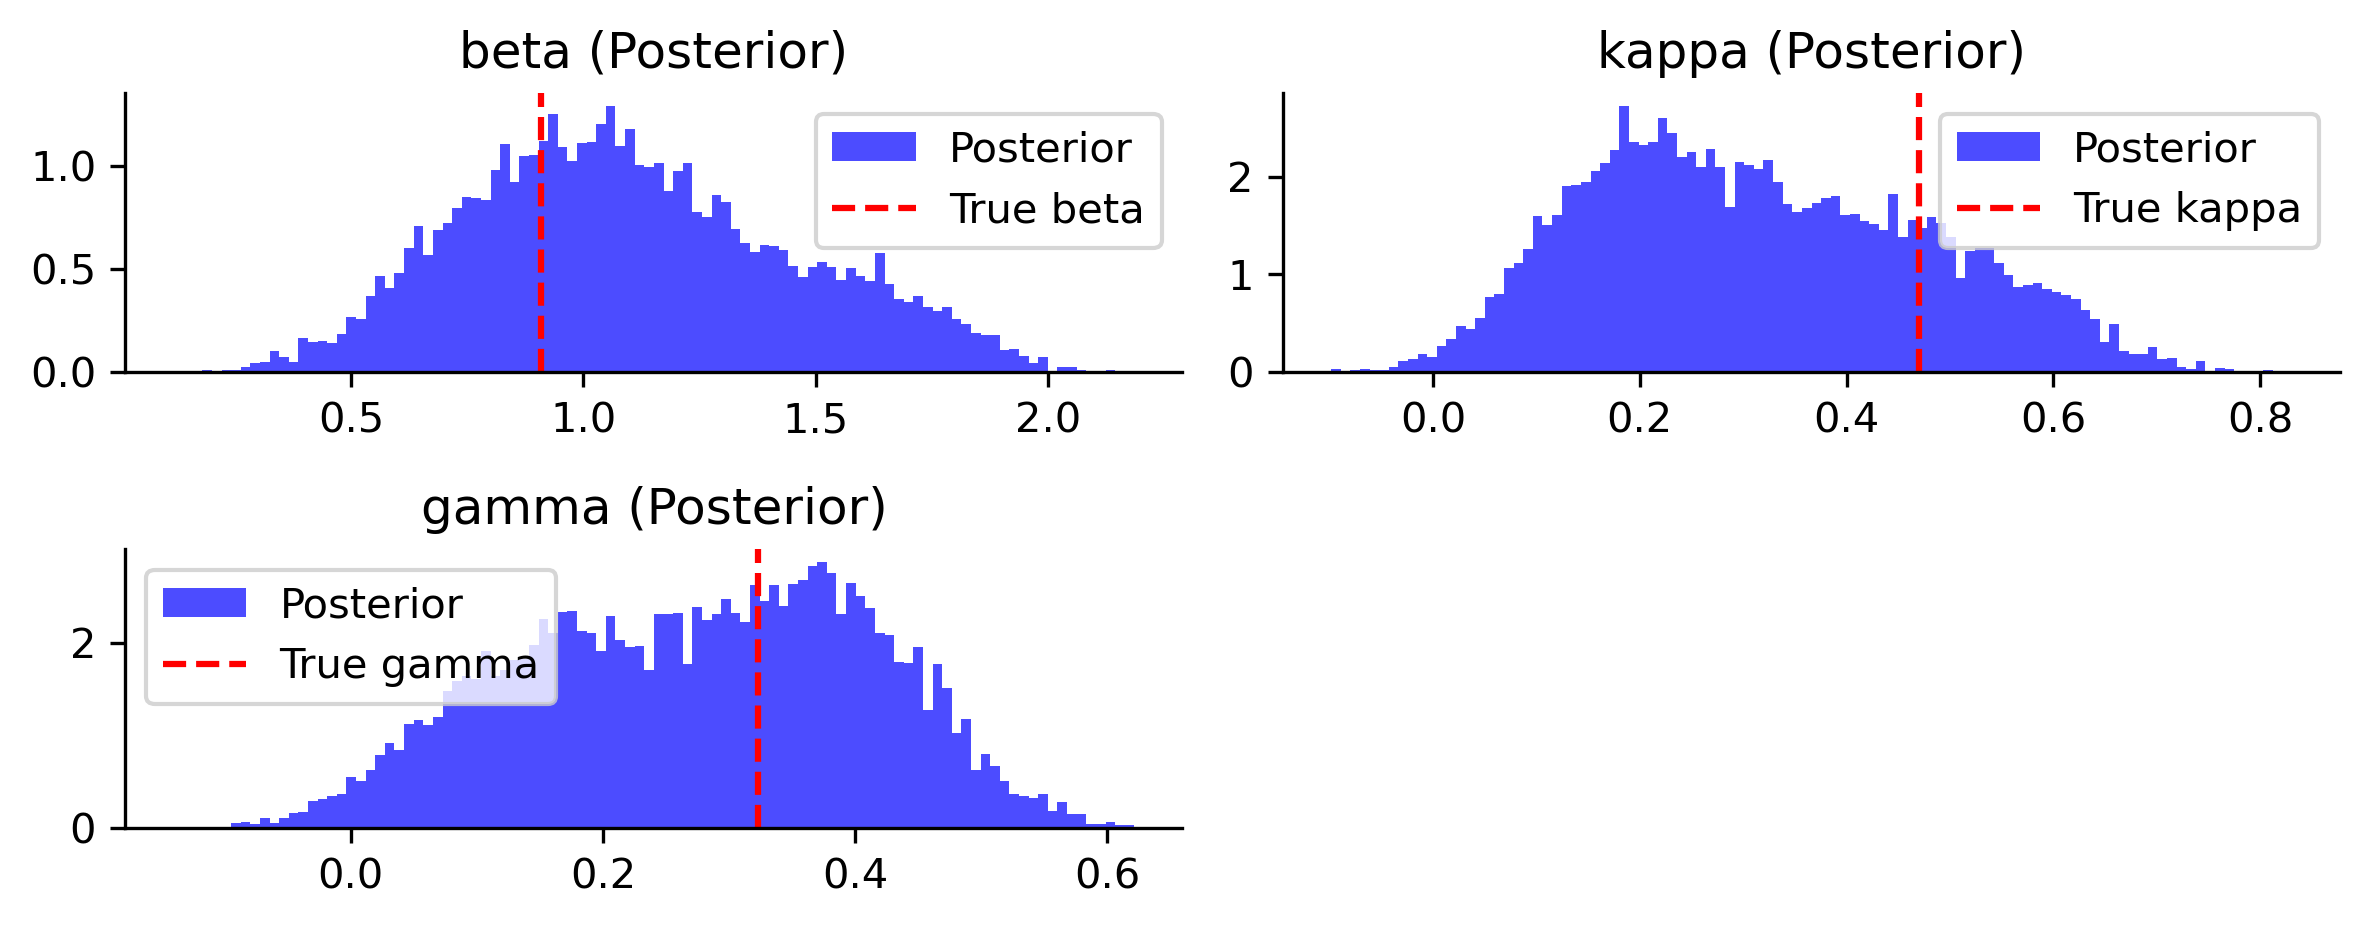

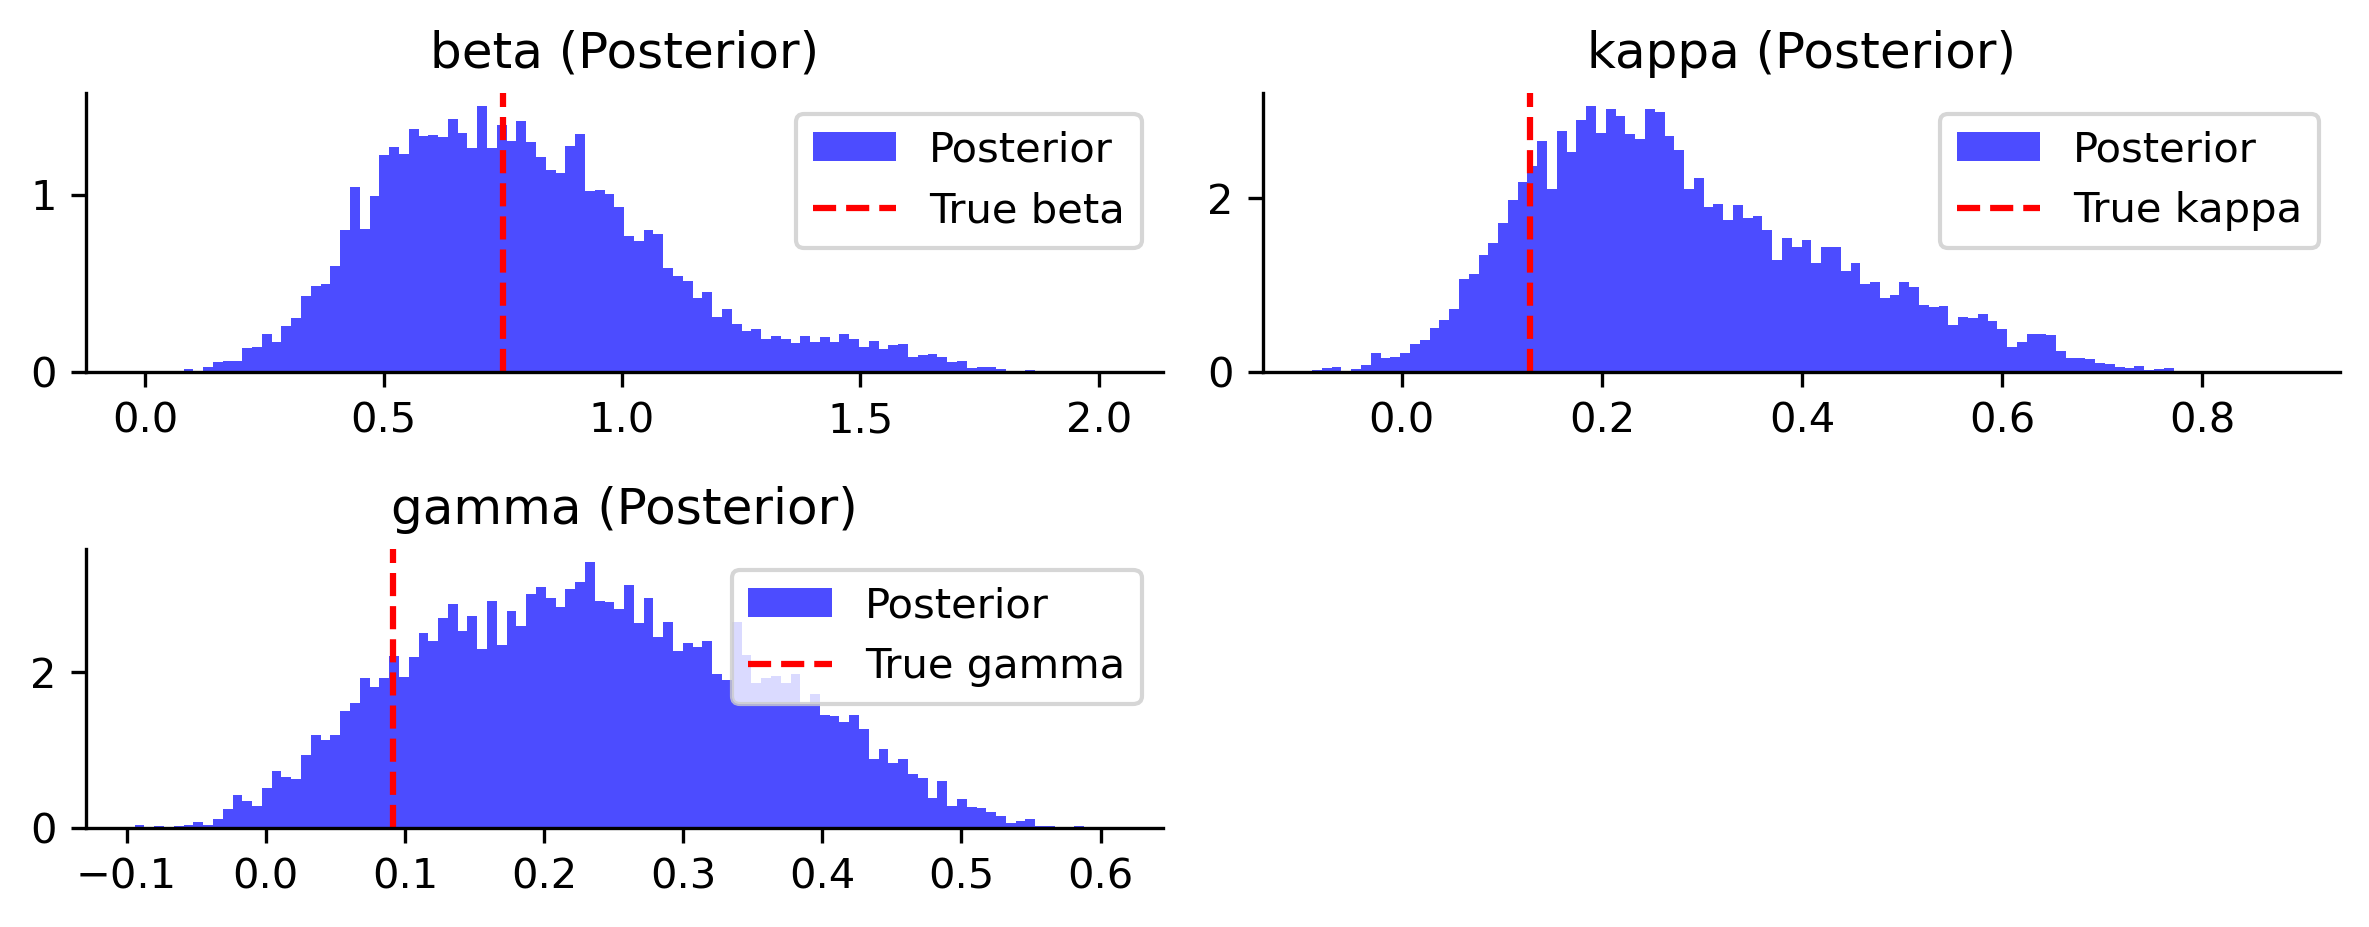

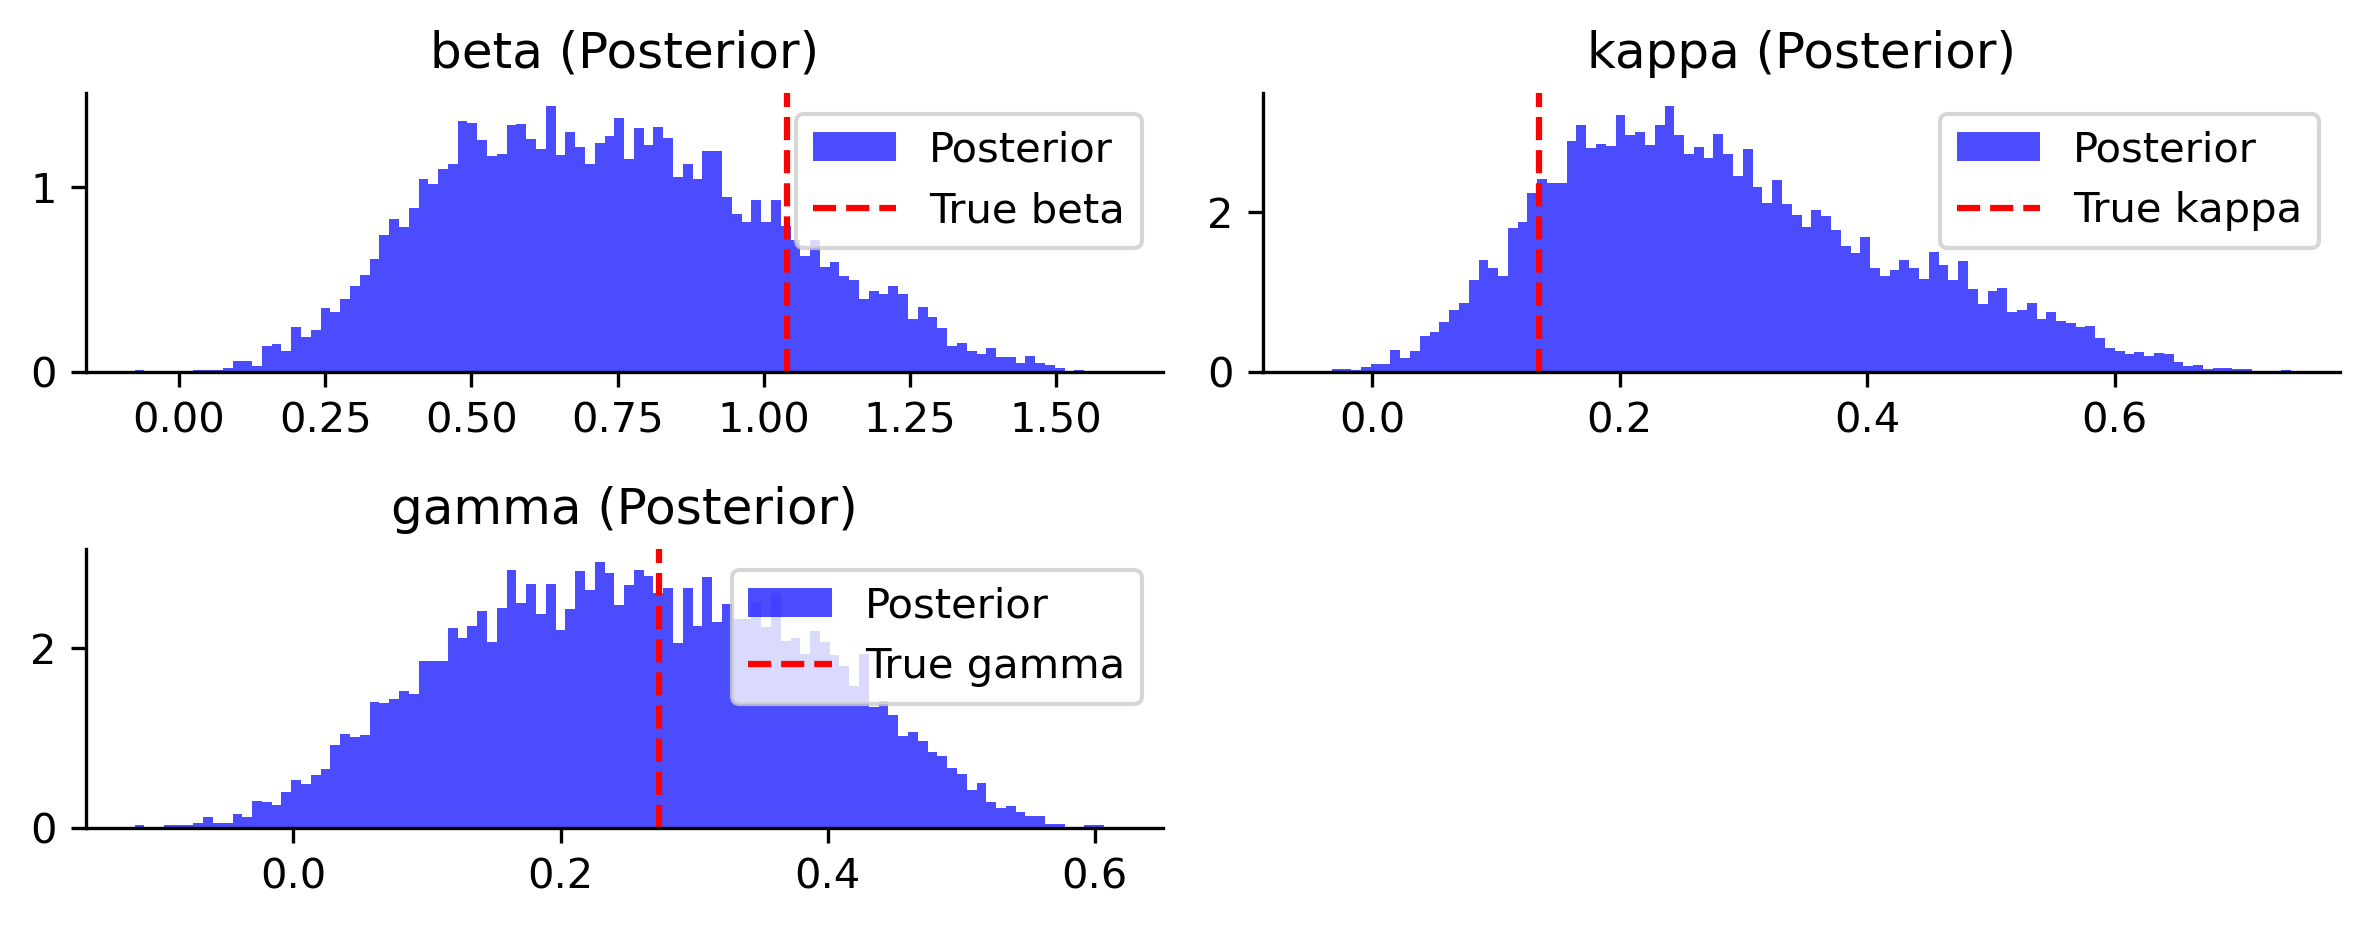

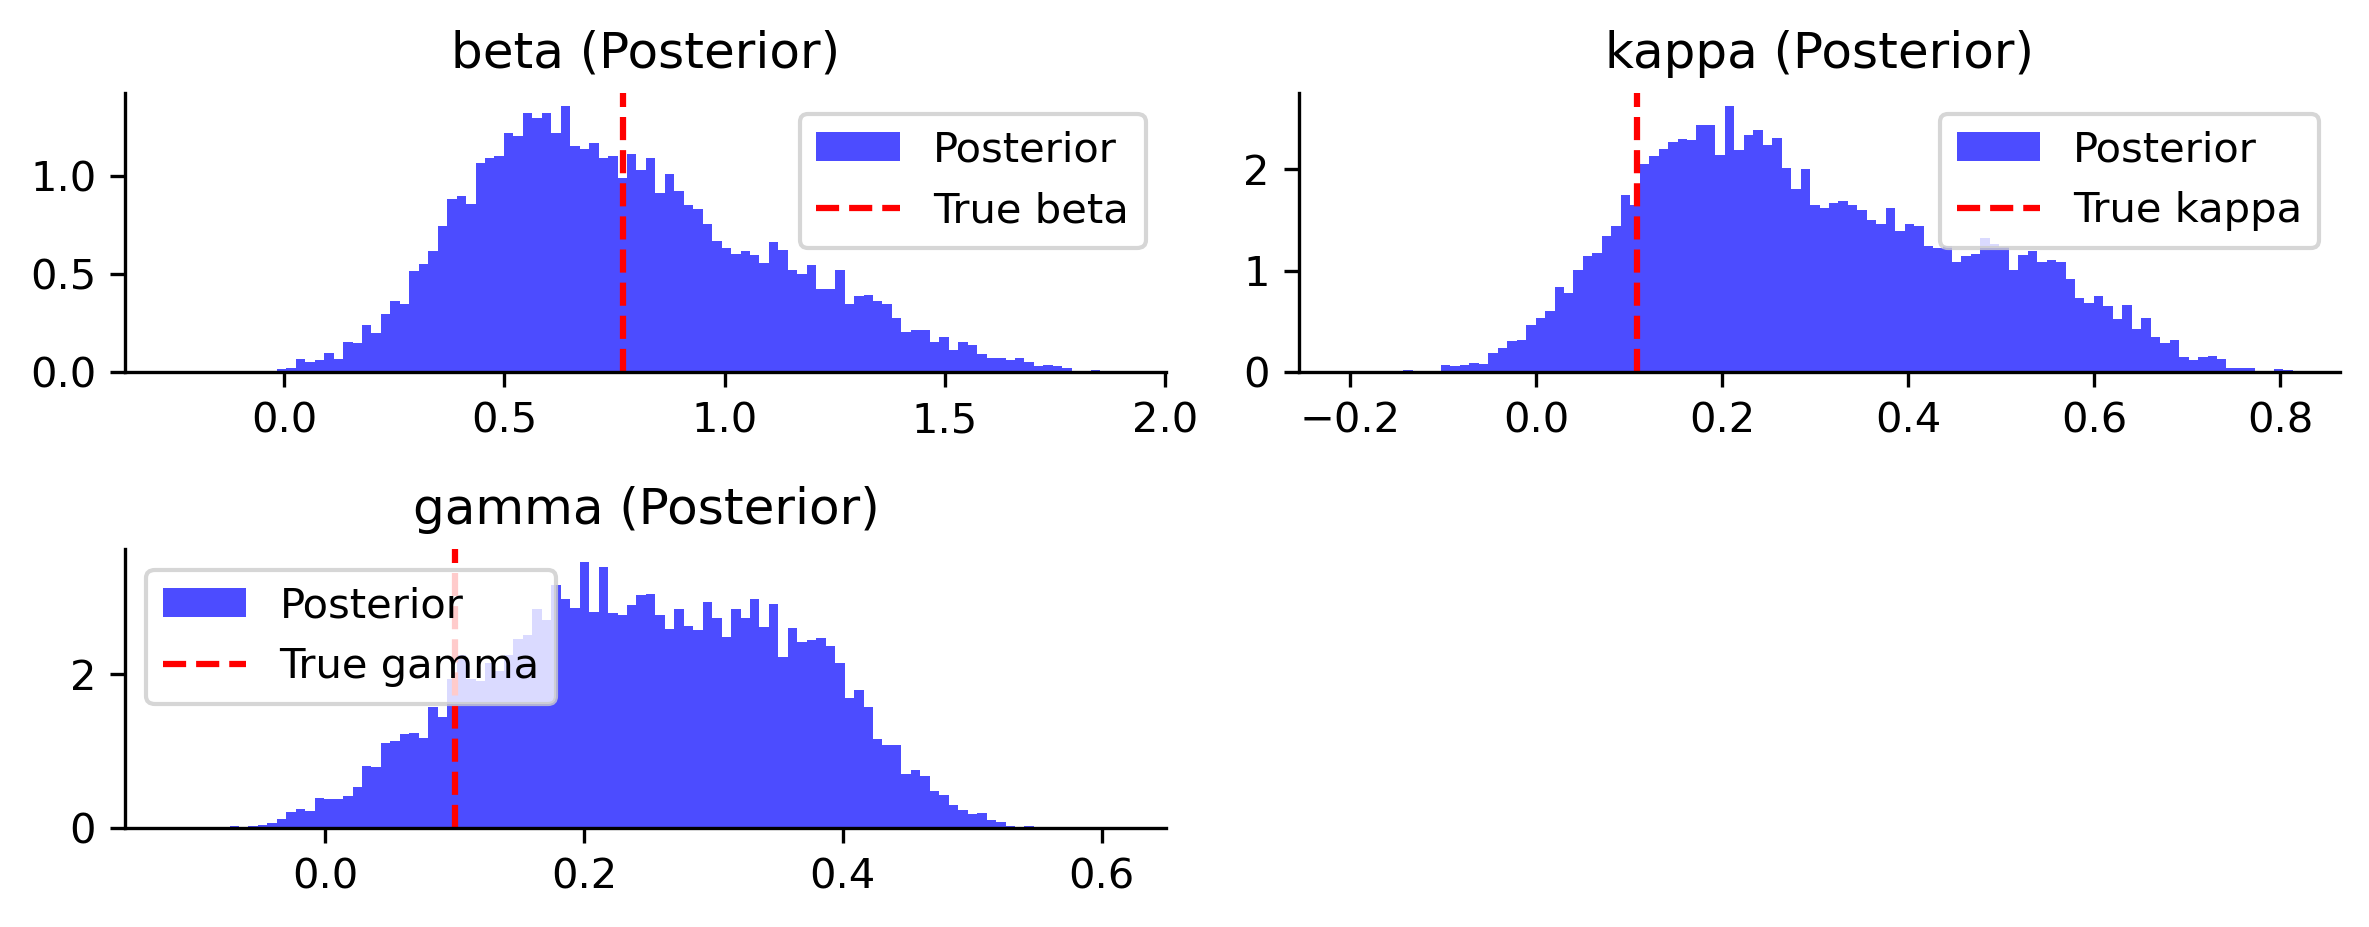

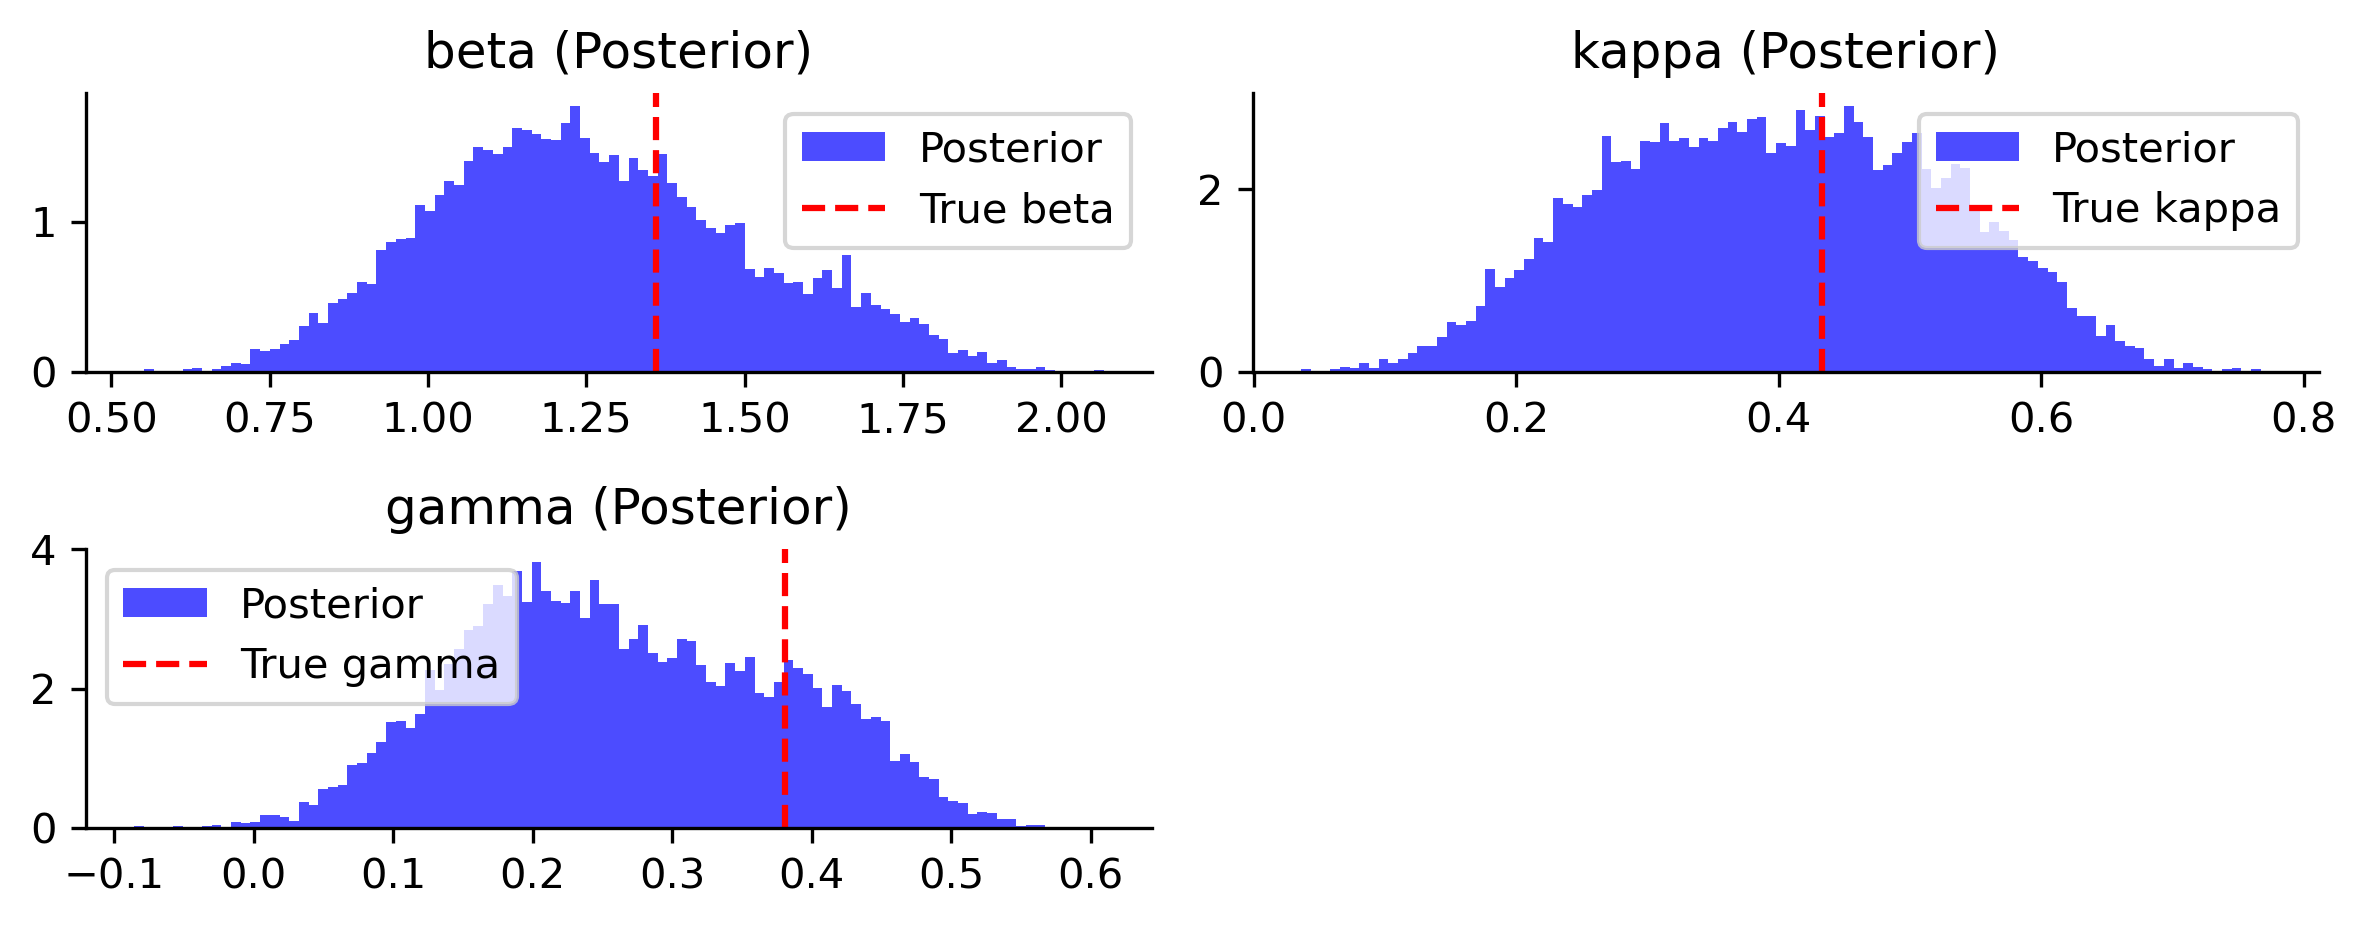

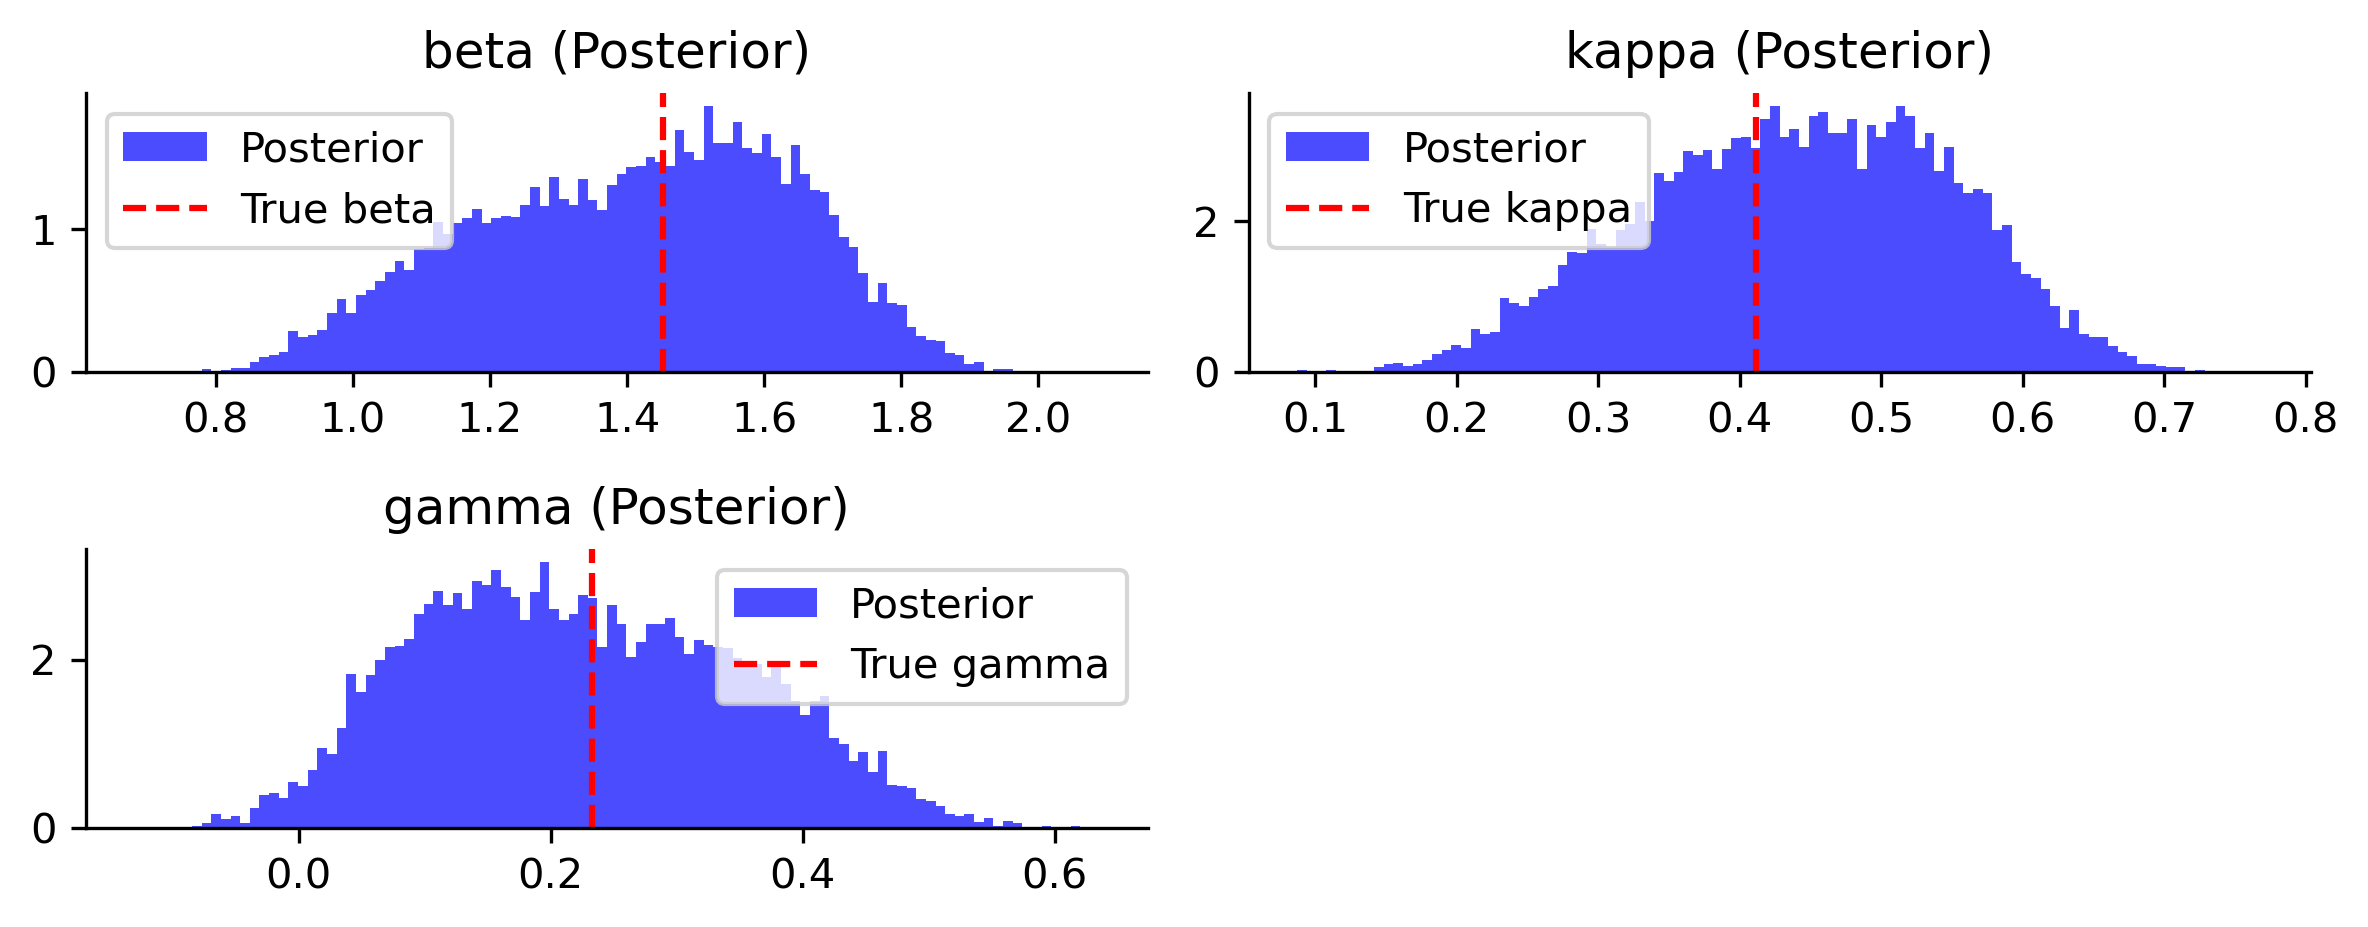

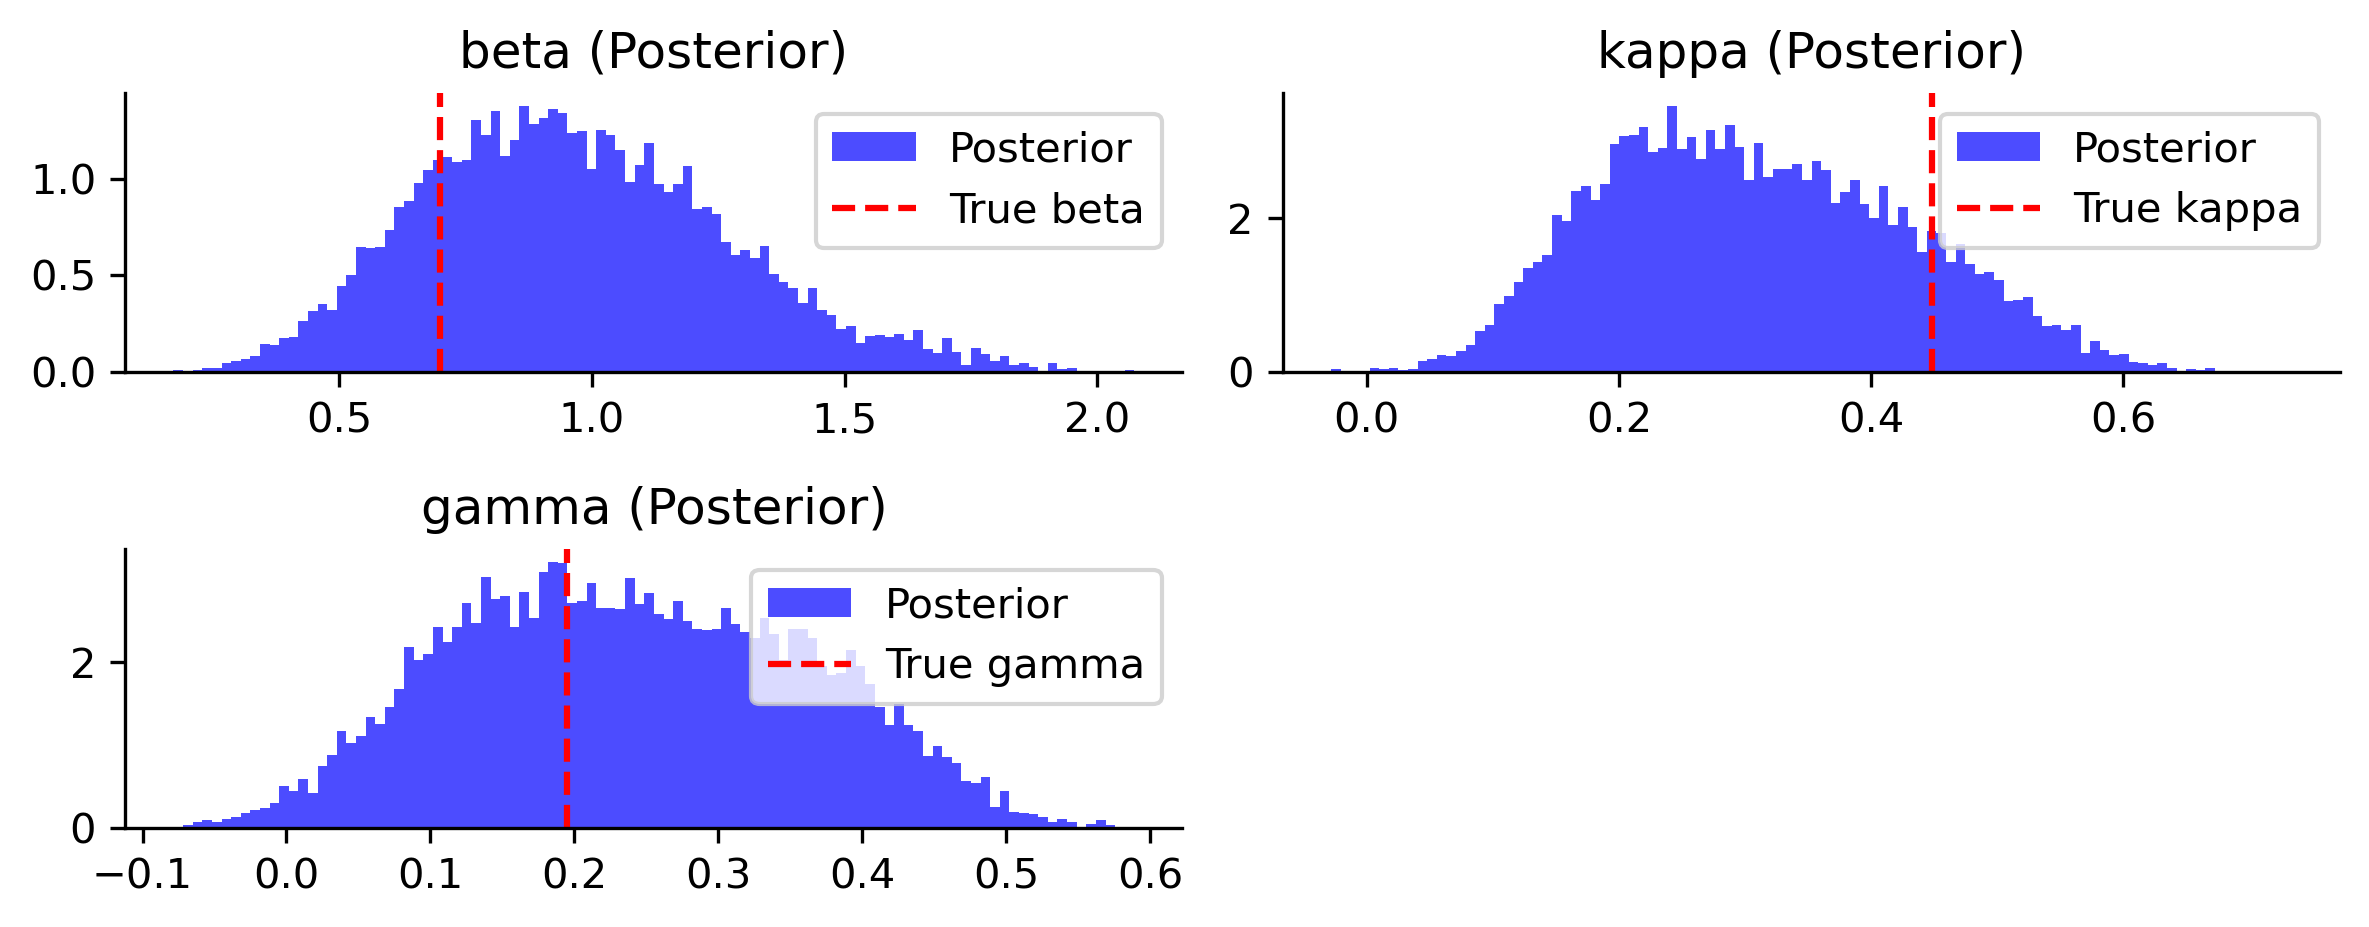

In [35]:
for k in range(10):
    samples = posterior_samples_1k[k]
    true_values = simulation_dataset[k]['params']
    plt.figure(figsize=(8, 6),dpi=300)
    for i in range(3):
        plt.subplot(4, 2, i + 1)
        plt.hist(samples.iloc[:,i], bins=100, alpha=0.7, label="Posterior", color='blue', density=True)
        plt.axvline(true_values[param_names[i]], color='red', linestyle='--', label=f"True {param_names[i]}")
        plt.title(f"{param_names[i]} (Posterior)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [36]:
with open("./posterior/ABC_1k_posterior_samples.pkl", "wb") as f:
    pickle.dump(posterior_samples_1k, f)

In [37]:
results_10k = []

for i, sim in enumerate(simulation_dataset):
    obs_data = sim['poisson']
    obs_dict={"cases1": obs_data[:,0]}
 
    db_path = "sqlite:///" + tempfile.mkstemp(suffix=f"abc_{i}.db")[1]

    abc = ABCSMC(model, prior, distance, transitions=transition, eps=eps, population_size=100)
    abc.new(db_path, obs_dict)

    start_time = time.time()
    history = abc.run(max_total_nr_simulations=10000)
    end_time = time.time()

    df_posterior = history.get_distribution()
    
    results_10k.append({
        "id": i,
        "params": sim['params'],
        "posterior": df_posterior,
        "populations": history.get_all_populations(),
        "runtime": end_time - start_time
    })

    print(f"[{i}] Done in {end_time - start_time:.2f} seconds")

with open("./results/M1_10k.pkl", "wb") as f:
    pickle.dump(results_10k, f)

ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:30>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 1.18807097e+04.
ABC INFO: Accepted: 100 / 401 = 2.4938e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.13565358e+03.
ABC INFO: Accepted: 100 / 538 = 1.8587e-01, ESS: 6.2814e+01.
ABC INFO: t: 2, eps: 1.62725074e+03.
ABC INFO: Accepted: 100 / 1418 = 7.0522e-02, ESS: 8.5865e+01.
ABC INFO: t: 3, eps: 8.00346139e+02.
ABC INFO: Accepted: 100 / 1246 = 8.0257e-02, ESS: 6.5346e+01.
ABC INFO: t: 4, eps: 4.83400952e+02.
ABC INFO: Accepted: 100 / 1115 = 8.9686e-02, ESS: 7.7484e+01.
ABC INFO: t: 5, eps: 4.04015832e+02.
ABC INFO: Accepted: 100 / 1545 = 6.4725e-02, ESS: 5.8138e+01.
ABC INFO: t: 6, eps: 3.64821119e+02.
ABC INFO: Accepted: 100 / 6129 = 1.6316e-02, ESS: 6.8701e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:12.458551, end_time=2026-01-26 18:55:43>
ABC.Sampler

[0] Done in 12.45 seconds


ABC INFO: t: 0, eps: 1.09381685e+04.
ABC INFO: Accepted: 100 / 538 = 1.8587e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.07404154e+03.
ABC INFO: Accepted: 100 / 653 = 1.5314e-01, ESS: 7.8543e+01.
ABC INFO: t: 2, eps: 9.54904430e+02.
ABC INFO: Accepted: 100 / 1244 = 8.0386e-02, ESS: 5.3085e+01.
ABC INFO: t: 3, eps: 6.92183223e+02.
ABC INFO: Accepted: 100 / 1087 = 9.1996e-02, ESS: 8.0651e+01.
ABC INFO: t: 4, eps: 5.45615277e+02.
ABC INFO: Accepted: 100 / 1436 = 6.9638e-02, ESS: 8.6883e+01.
ABC INFO: t: 5, eps: 4.74112835e+02.
ABC INFO: Accepted: 100 / 2555 = 3.9139e-02, ESS: 5.5592e+01.
ABC INFO: t: 6, eps: 4.30475504e+02.
ABC INFO: Accepted: 100 / 5611 = 1.7822e-02, ESS: 1.5471e+00.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:13.861284, end_time=2026-01-26 18:55:57>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:55:57>
ABC INFO: Calibration sample t = -1.


[1] Done in 13.85 seconds


ABC INFO: t: 0, eps: 1.17570625e+04.
ABC INFO: Accepted: 100 / 562 = 1.7794e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.98775546e+03.
ABC INFO: Accepted: 100 / 496 = 2.0161e-01, ESS: 7.3335e+01.
ABC INFO: t: 2, eps: 1.49260280e+03.
ABC INFO: Accepted: 100 / 636 = 1.5723e-01, ESS: 5.9744e+01.
ABC INFO: t: 3, eps: 9.04174196e+02.
ABC INFO: Accepted: 100 / 1217 = 8.2169e-02, ESS: 3.9676e+01.
ABC INFO: t: 4, eps: 5.93573563e+02.
ABC INFO: Accepted: 100 / 1827 = 5.4735e-02, ESS: 4.2130e+01.
ABC INFO: t: 5, eps: 4.72508671e+02.
ABC INFO: Accepted: 100 / 2056 = 4.8638e-02, ESS: 7.6887e+01.
ABC INFO: t: 6, eps: 3.96414981e+02.
ABC INFO: Accepted: 100 / 3543 = 2.8225e-02, ESS: 7.5611e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:12.577641, end_time=2026-01-26 18:56:09>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:56:09>
ABC INFO: Calibration sample t = -1.


[2] Done in 12.57 seconds


ABC INFO: t: 0, eps: 1.13040641e+04.
ABC INFO: Accepted: 100 / 501 = 1.9960e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 2.57670193e+03.
ABC INFO: Accepted: 100 / 551 = 1.8149e-01, ESS: 6.9406e+01.
ABC INFO: t: 2, eps: 1.12002230e+03.
ABC INFO: Accepted: 100 / 1251 = 7.9936e-02, ESS: 8.7687e+01.
ABC INFO: t: 3, eps: 7.17631304e+02.
ABC INFO: Accepted: 100 / 819 = 1.2210e-01, ESS: 7.2154e+01.
ABC INFO: t: 4, eps: 4.73854557e+02.
ABC INFO: Accepted: 100 / 1637 = 6.1087e-02, ESS: 7.6251e+01.
ABC INFO: t: 5, eps: 3.95463352e+02.
ABC INFO: Accepted: 100 / 1298 = 7.7042e-02, ESS: 7.2050e+01.
ABC INFO: t: 6, eps: 3.42357250e+02.
ABC INFO: Accepted: 100 / 5985 = 1.6708e-02, ESS: 3.6685e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:12.621268, end_time=2026-01-26 18:56:22>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:56:22>
ABC INFO: Calibration sample t = -1.


[3] Done in 12.61 seconds


ABC INFO: t: 0, eps: 9.72692406e+03.
ABC INFO: Accepted: 100 / 551 = 1.8149e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.41708715e+03.
ABC INFO: Accepted: 100 / 495 = 2.0202e-01, ESS: 6.7532e+01.
ABC INFO: t: 2, eps: 1.54635044e+03.
ABC INFO: Accepted: 100 / 1160 = 8.6207e-02, ESS: 7.4258e+01.
ABC INFO: t: 3, eps: 9.62235994e+02.
ABC INFO: Accepted: 100 / 1663 = 6.0132e-02, ESS: 7.2419e+01.
ABC INFO: t: 4, eps: 6.79856891e+02.
ABC INFO: Accepted: 100 / 842 = 1.1876e-01, ESS: 7.4861e+01.
ABC INFO: t: 5, eps: 5.13017794e+02.
ABC INFO: Accepted: 100 / 527 = 1.8975e-01, ESS: 5.9446e+01.
ABC INFO: t: 6, eps: 4.34825629e+02.
ABC INFO: Accepted: 100 / 625 = 1.6000e-01, ESS: 9.0059e+01.
ABC INFO: t: 7, eps: 3.86673193e+02.
ABC INFO: Accepted: 100 / 1080 = 9.2593e-02, ESS: 8.6368e+01.
ABC INFO: t: 8, eps: 3.51286083e+02.
ABC INFO: Accepted: 100 / 3284 = 3.0451e-02, ESS: 6.6942e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:16.169988, end_time=2

[4] Done in 16.16 seconds


ABC INFO: t: 0, eps: 1.23924657e+04.
ABC INFO: Accepted: 100 / 485 = 2.0619e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.77010116e+03.
ABC INFO: Accepted: 100 / 501 = 1.9960e-01, ESS: 8.8620e+01.
ABC INFO: t: 2, eps: 1.33260828e+03.
ABC INFO: Accepted: 100 / 1245 = 8.0321e-02, ESS: 2.1632e+01.
ABC INFO: t: 3, eps: 8.55815074e+02.
ABC INFO: Accepted: 100 / 2526 = 3.9588e-02, ESS: 5.2555e+01.
ABC INFO: t: 4, eps: 6.02061236e+02.
ABC INFO: Accepted: 100 / 694 = 1.4409e-01, ESS: 6.9801e+01.
ABC INFO: t: 5, eps: 4.58036675e+02.
ABC INFO: Accepted: 100 / 939 = 1.0650e-01, ESS: 8.7515e+01.
ABC INFO: t: 6, eps: 4.02659857e+02.
ABC INFO: Accepted: 100 / 789 = 1.2674e-01, ESS: 6.9468e+01.
ABC INFO: t: 7, eps: 3.65355497e+02.
ABC INFO: Accepted: 100 / 2072 = 4.8263e-02, ESS: 6.5888e+01.
ABC INFO: t: 8, eps: 3.34239576e+02.
ABC INFO: Accepted: 100 / 9150 = 1.0929e-02, ESS: 2.8630e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:16.470407, end_time=2

[5] Done in 16.47 seconds


ABC INFO: t: 0, eps: 1.28789063e+04.
ABC INFO: Accepted: 100 / 483 = 2.0704e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.49556806e+03.
ABC INFO: Accepted: 100 / 564 = 1.7730e-01, ESS: 7.6577e+01.
ABC INFO: t: 2, eps: 1.49827471e+03.
ABC INFO: Accepted: 100 / 1230 = 8.1301e-02, ESS: 5.8752e+01.
ABC INFO: t: 3, eps: 9.71418138e+02.
ABC INFO: Accepted: 100 / 2501 = 3.9984e-02, ESS: 8.4821e+01.
ABC INFO: t: 4, eps: 6.74886696e+02.
ABC INFO: Accepted: 100 / 541 = 1.8484e-01, ESS: 8.5524e+01.
ABC INFO: t: 5, eps: 5.05172508e+02.
ABC INFO: Accepted: 100 / 576 = 1.7361e-01, ESS: 5.0049e+01.
ABC INFO: t: 6, eps: 4.34104755e+02.
ABC INFO: Accepted: 100 / 984 = 1.0163e-01, ESS: 8.0493e+01.
ABC INFO: t: 7, eps: 3.89357780e+02.
ABC INFO: Accepted: 100 / 1450 = 6.8966e-02, ESS: 7.2146e+01.
ABC INFO: t: 8, eps: 3.60547189e+02.
ABC INFO: Accepted: 100 / 3886 = 2.5733e-02, ESS: 6.9136e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:16.802368, end_time=2

[6] Done in 16.79 seconds


ABC INFO: t: 0, eps: 6.08917696e+03.
ABC INFO: Accepted: 100 / 1069 = 9.3545e-02, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 1.85988000e+03.
ABC INFO: Accepted: 100 / 550 = 1.8182e-01, ESS: 3.7773e+01.
ABC INFO: t: 2, eps: 9.56988025e+02.
ABC INFO: Accepted: 100 / 652 = 1.5337e-01, ESS: 9.0095e+01.
ABC INFO: t: 3, eps: 5.84751536e+02.
ABC INFO: Accepted: 100 / 1073 = 9.3197e-02, ESS: 8.7006e+01.
ABC INFO: t: 4, eps: 4.34532167e+02.
ABC INFO: Accepted: 100 / 1357 = 7.3692e-02, ESS: 6.5253e+01.
ABC INFO: t: 5, eps: 3.73127000e+02.
ABC INFO: Accepted: 100 / 2622 = 3.8139e-02, ESS: 5.9023e+01.
ABC INFO: t: 6, eps: 3.35196042e+02.
ABC INFO: Accepted: 100 / 5757 = 1.7370e-02, ESS: 2.4521e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:13.035513, end_time=2026-01-26 18:57:24>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:57:24>
ABC INFO: Calibration sample t = -1.


[7] Done in 13.03 seconds


ABC INFO: t: 0, eps: 1.77826393e+04.
ABC INFO: Accepted: 100 / 490 = 2.0408e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.93857483e+03.
ABC INFO: Accepted: 100 / 584 = 1.7123e-01, ESS: 6.8387e+01.
ABC INFO: t: 2, eps: 1.33327193e+03.
ABC INFO: Accepted: 100 / 398 = 2.5126e-01, ESS: 7.4191e+01.
ABC INFO: t: 3, eps: 7.88295413e+02.
ABC INFO: Accepted: 100 / 452 = 2.2124e-01, ESS: 7.6560e+01.
ABC INFO: t: 4, eps: 5.39960590e+02.
ABC INFO: Accepted: 100 / 614 = 1.6287e-01, ESS: 8.8320e+01.
ABC INFO: t: 5, eps: 4.14698803e+02.
ABC INFO: Accepted: 100 / 938 = 1.0661e-01, ESS: 6.7069e+01.
ABC INFO: t: 6, eps: 3.32803883e+02.
ABC INFO: Accepted: 100 / 2526 = 3.9588e-02, ESS: 6.8124e+01.
ABC INFO: t: 7, eps: 2.90636069e+02.
ABC INFO: Accepted: 100 / 6057 = 1.6510e-02, ESS: 6.5219e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:14.255257, end_time=2026-01-26 18:57:39>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start

[8] Done in 14.25 seconds


ABC INFO: t: 0, eps: 1.09309977e+04.
ABC INFO: Accepted: 100 / 533 = 1.8762e-01, ESS: 1.0000e+02.
ABC INFO: t: 1, eps: 3.20213393e+03.
ABC INFO: Accepted: 100 / 523 = 1.9120e-01, ESS: 6.0057e+01.
ABC INFO: t: 2, eps: 1.61562955e+03.
ABC INFO: Accepted: 100 / 925 = 1.0811e-01, ESS: 8.1057e+01.
ABC INFO: t: 3, eps: 8.97318143e+02.
ABC INFO: Accepted: 100 / 1012 = 9.8814e-02, ESS: 8.1628e+01.
ABC INFO: t: 4, eps: 6.08019105e+02.
ABC INFO: Accepted: 100 / 1035 = 9.6618e-02, ESS: 7.2734e+01.
ABC INFO: t: 5, eps: 4.77369551e+02.
ABC INFO: Accepted: 100 / 1867 = 5.3562e-02, ESS: 8.4050e+01.
ABC INFO: t: 6, eps: 4.03425227e+02.
ABC INFO: Accepted: 100 / 3173 = 3.1516e-02, ESS: 3.5642e+01.
ABC INFO: t: 7, eps: 3.65518990e+02.
ABC INFO: Accepted: 100 / 9517 = 1.0508e-02, ESS: 5.3554e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:13.757813, end_time=2026-01-26 18:57:52>


[9] Done in 13.75 seconds


In [38]:
posterior_samples_10k=[]
for i, res in enumerate(results_10k):  # results[i]['history']가 history 객체
    df, weights = res['posterior']
    df = df[param_names]
    
    kde_estimator = pyabc.transition.MultivariateNormalTransition()
    kde_estimator.fit(df, weights)
    
    num_samples = 10000
    samples = kde_estimator.rvs(num_samples)
    posterior_samples_10k.append(samples)

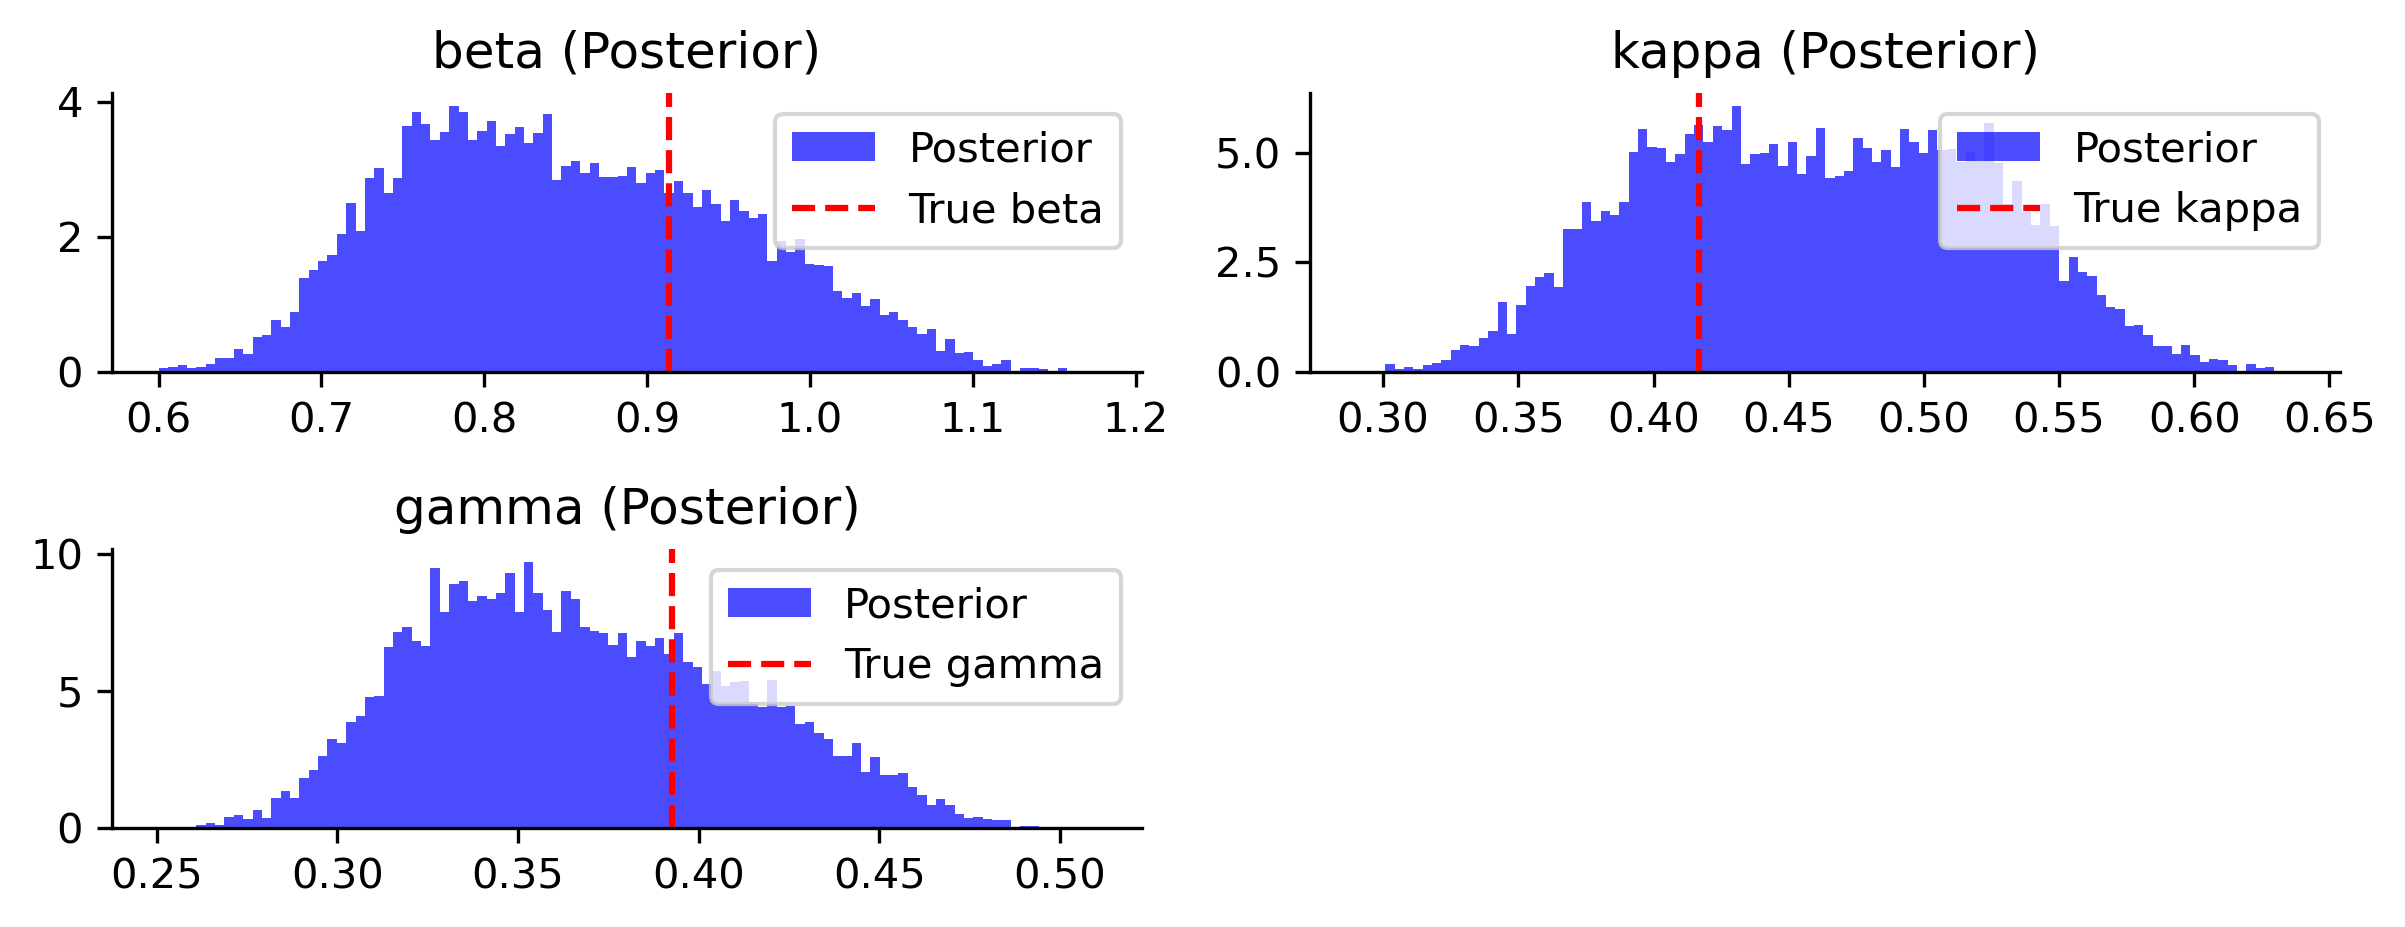

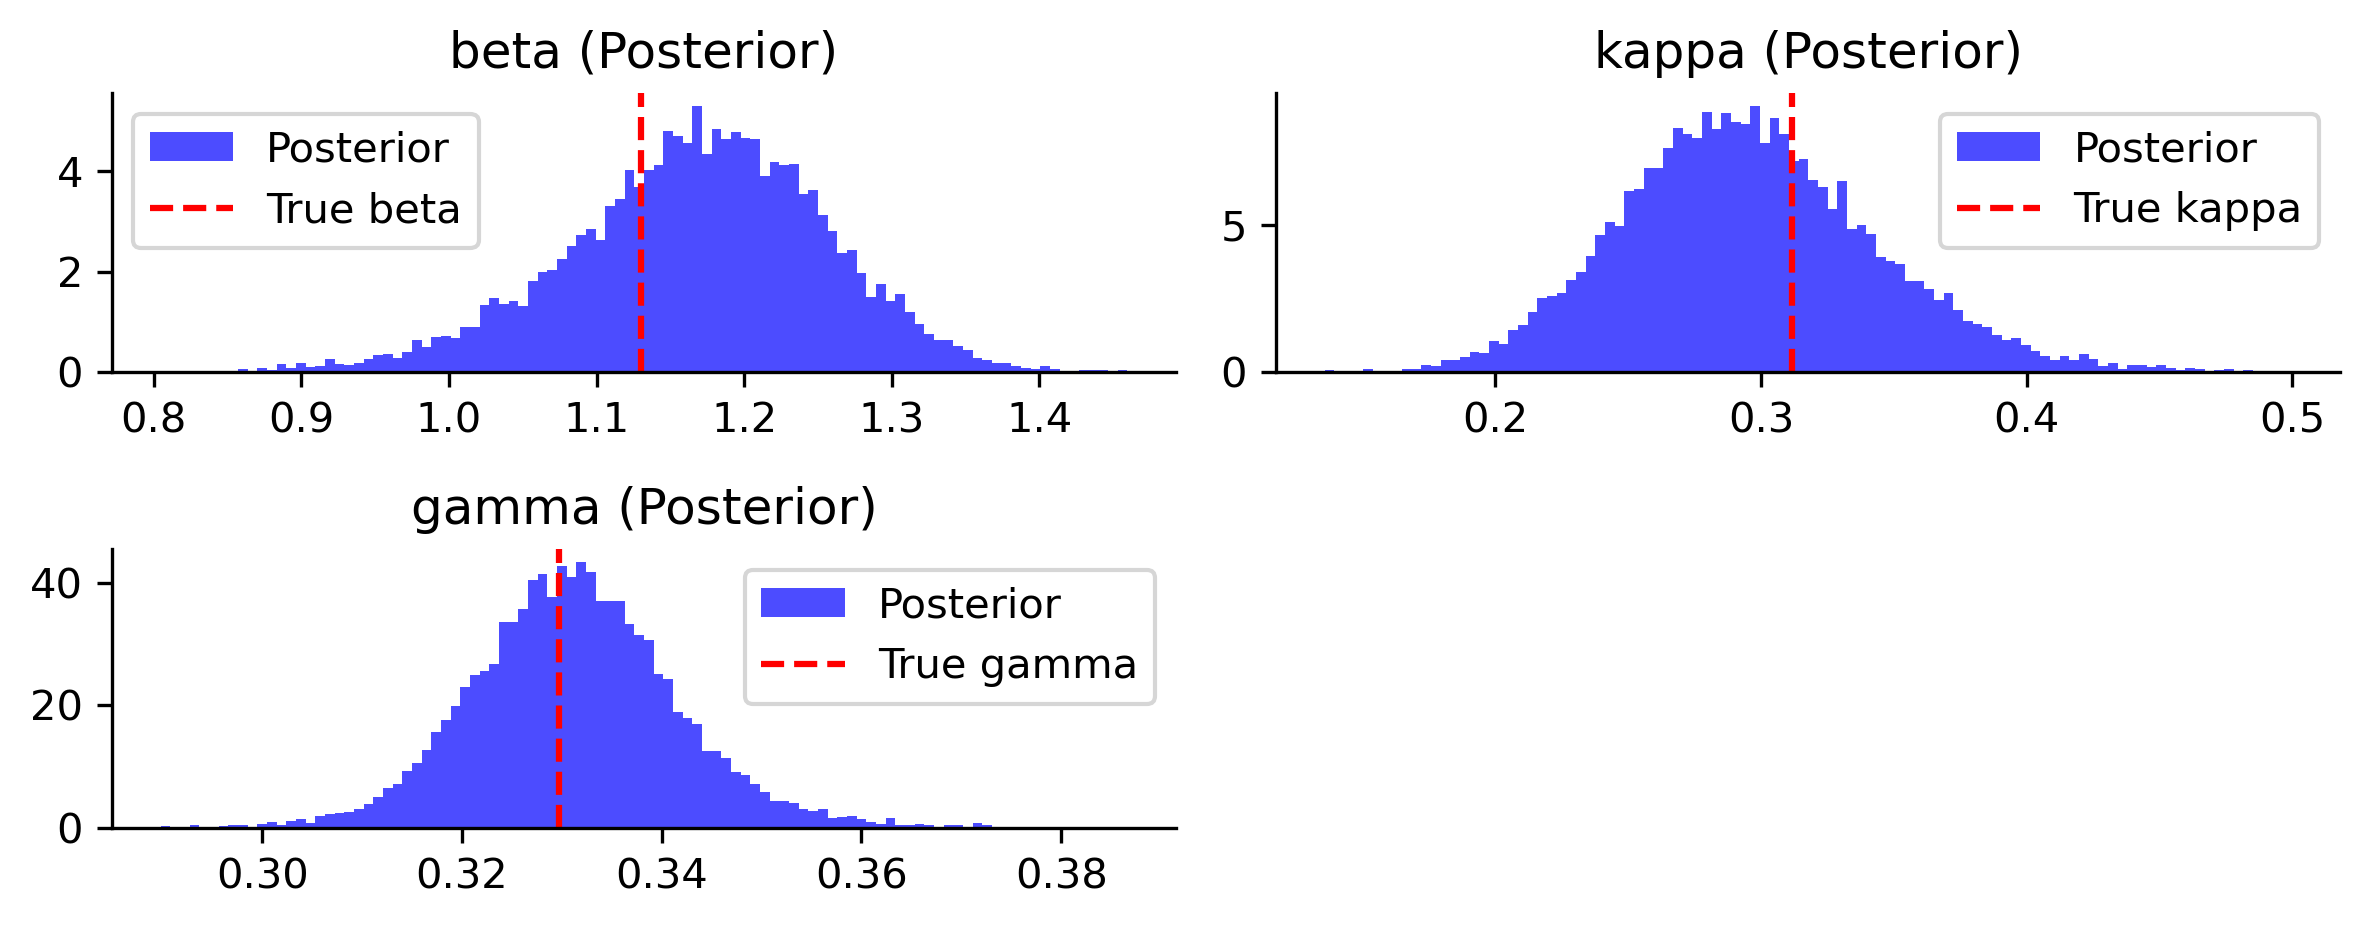

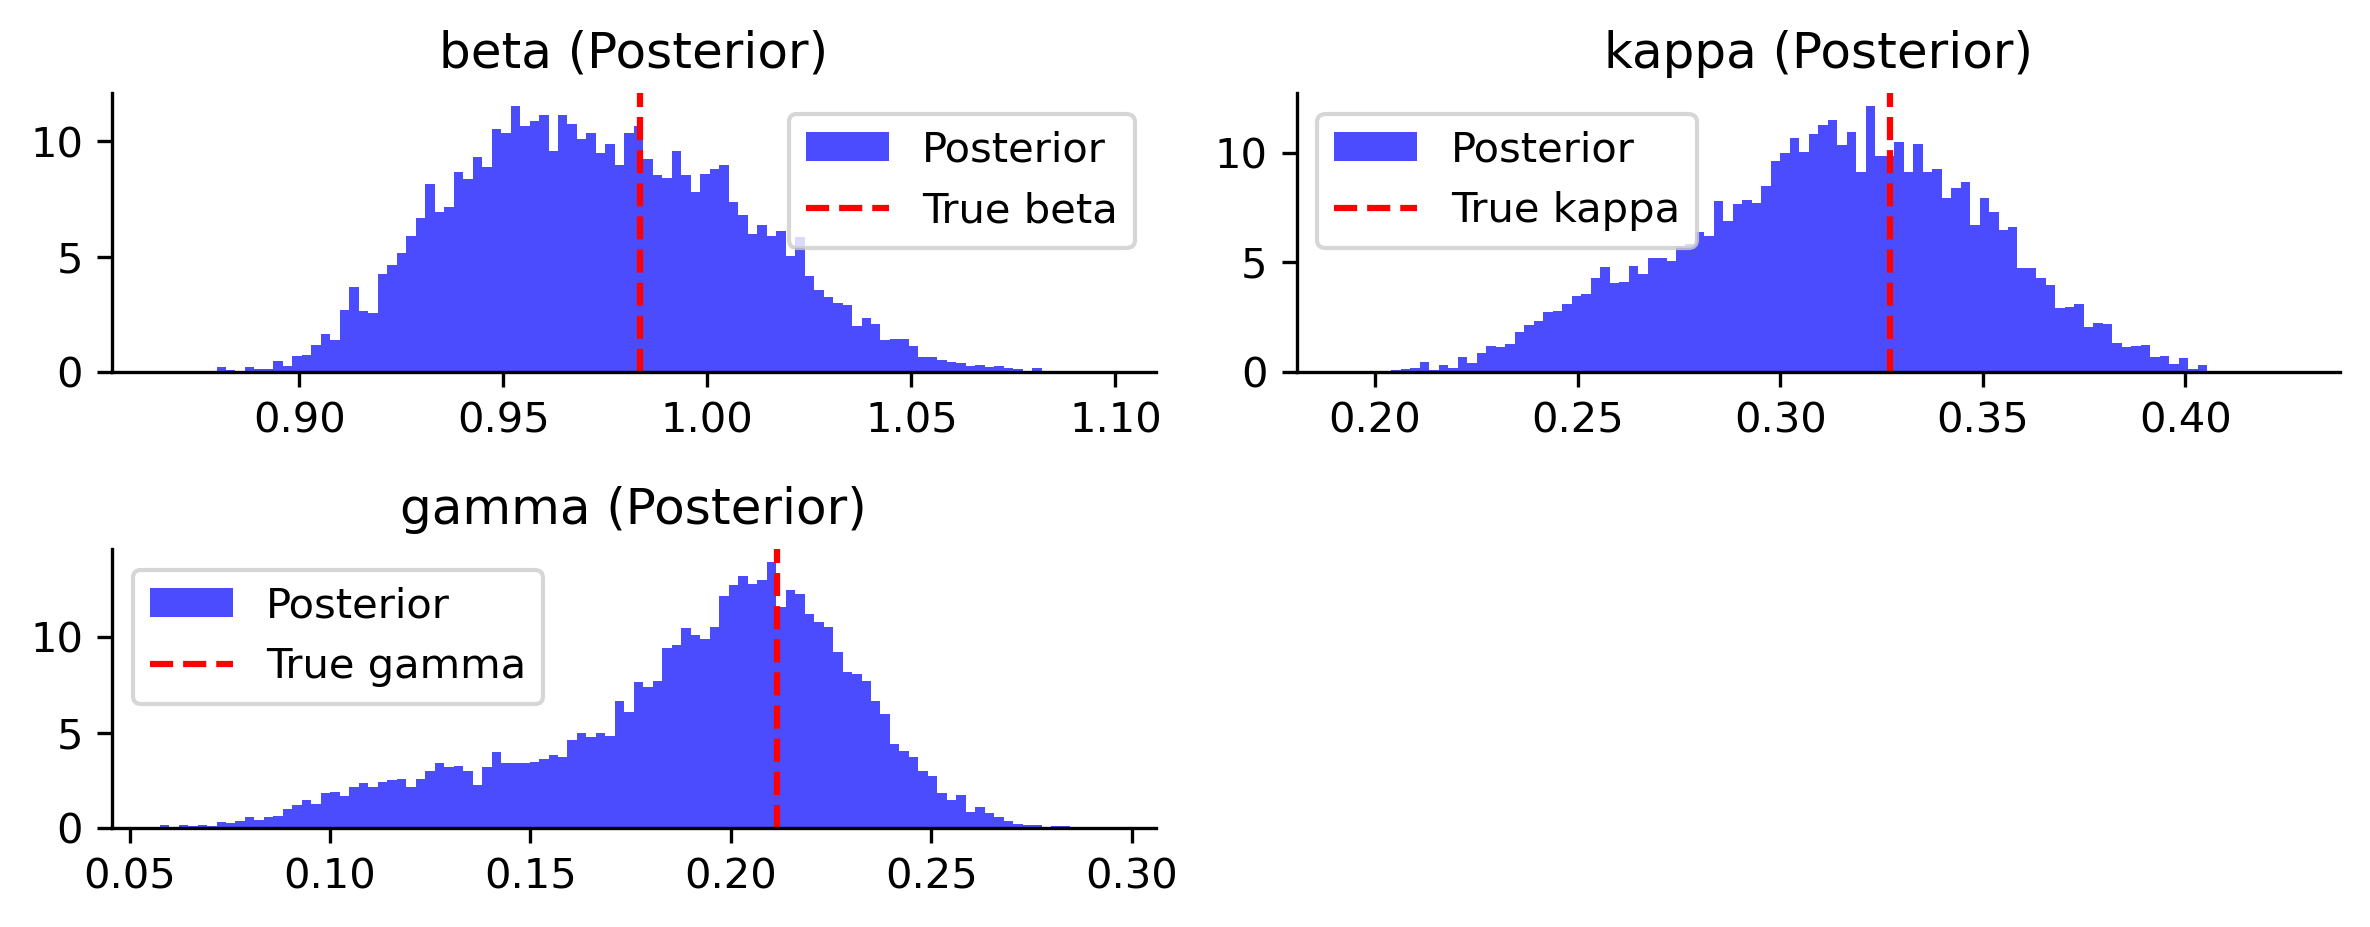

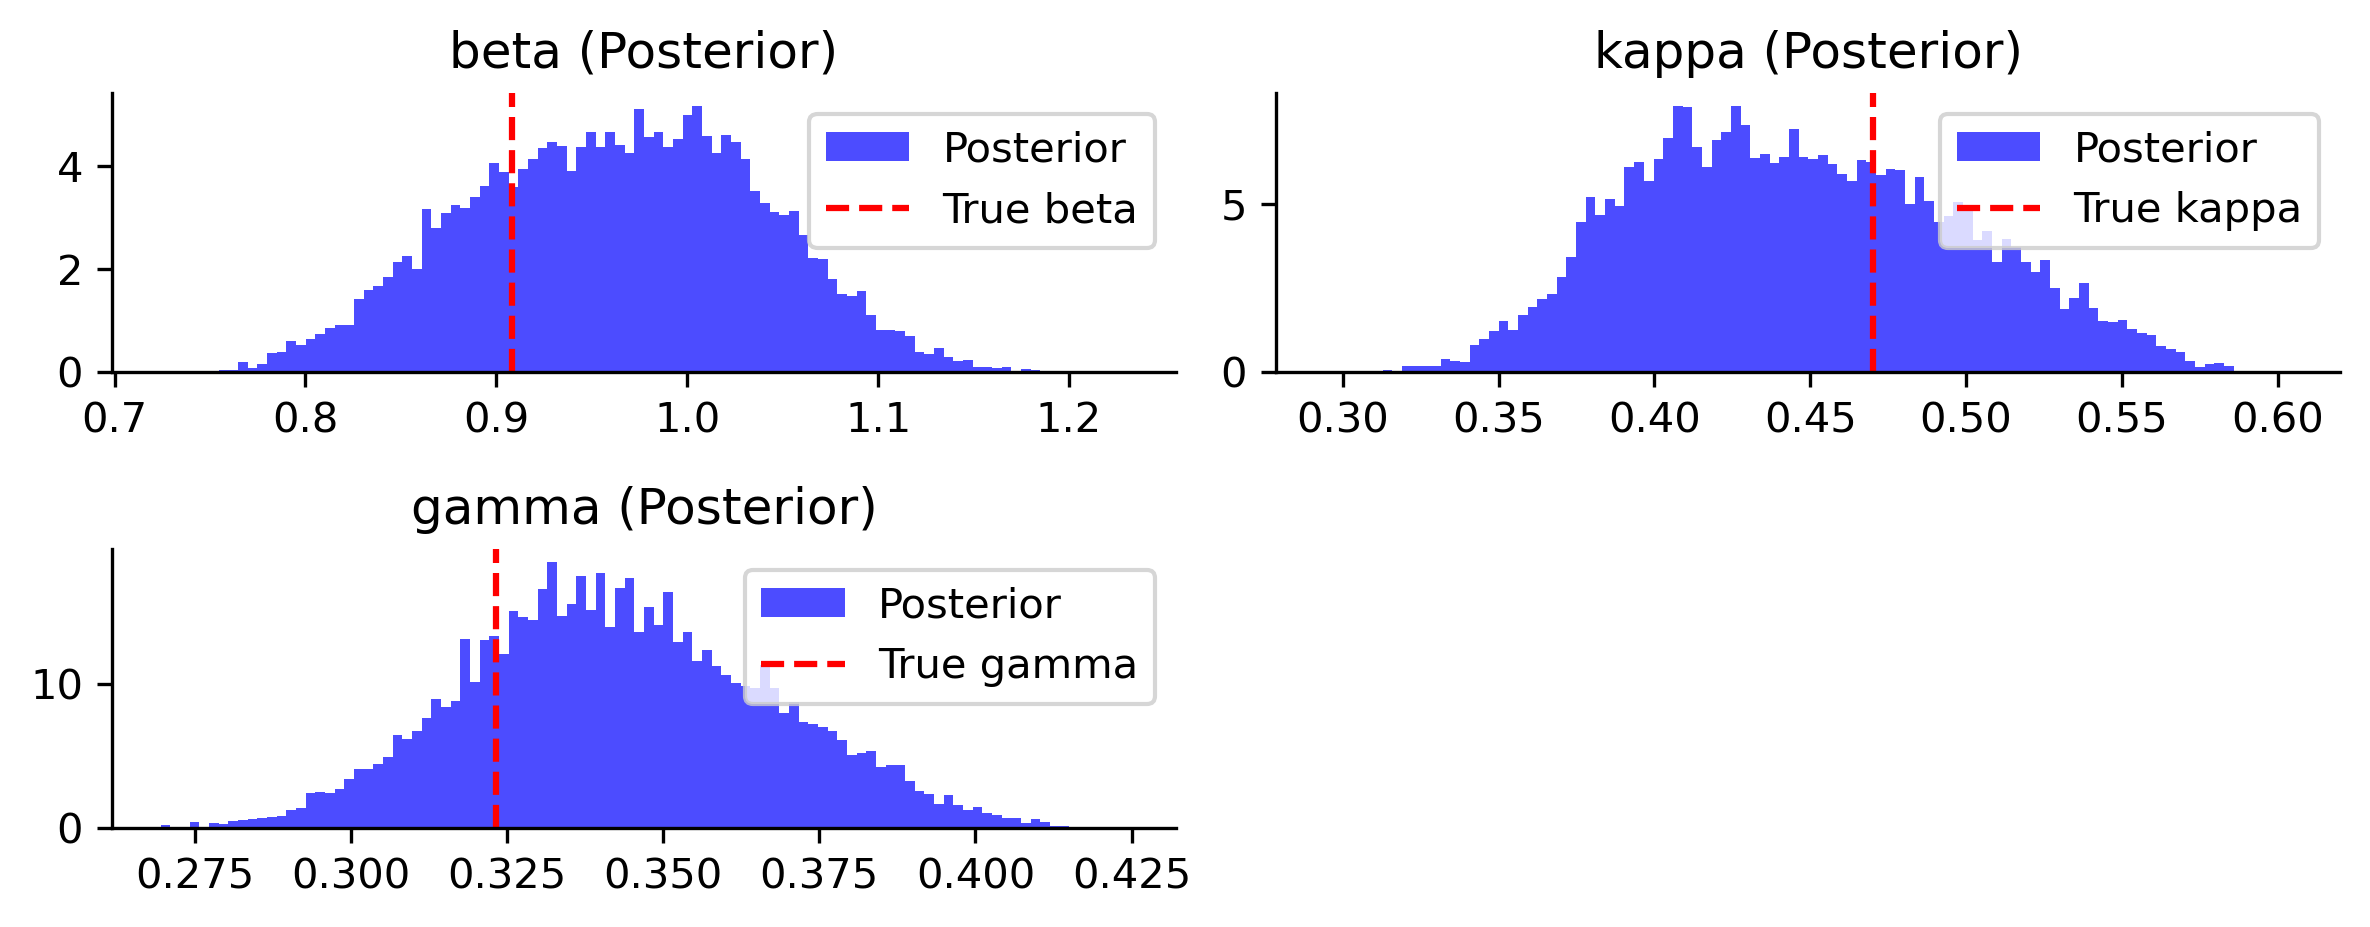

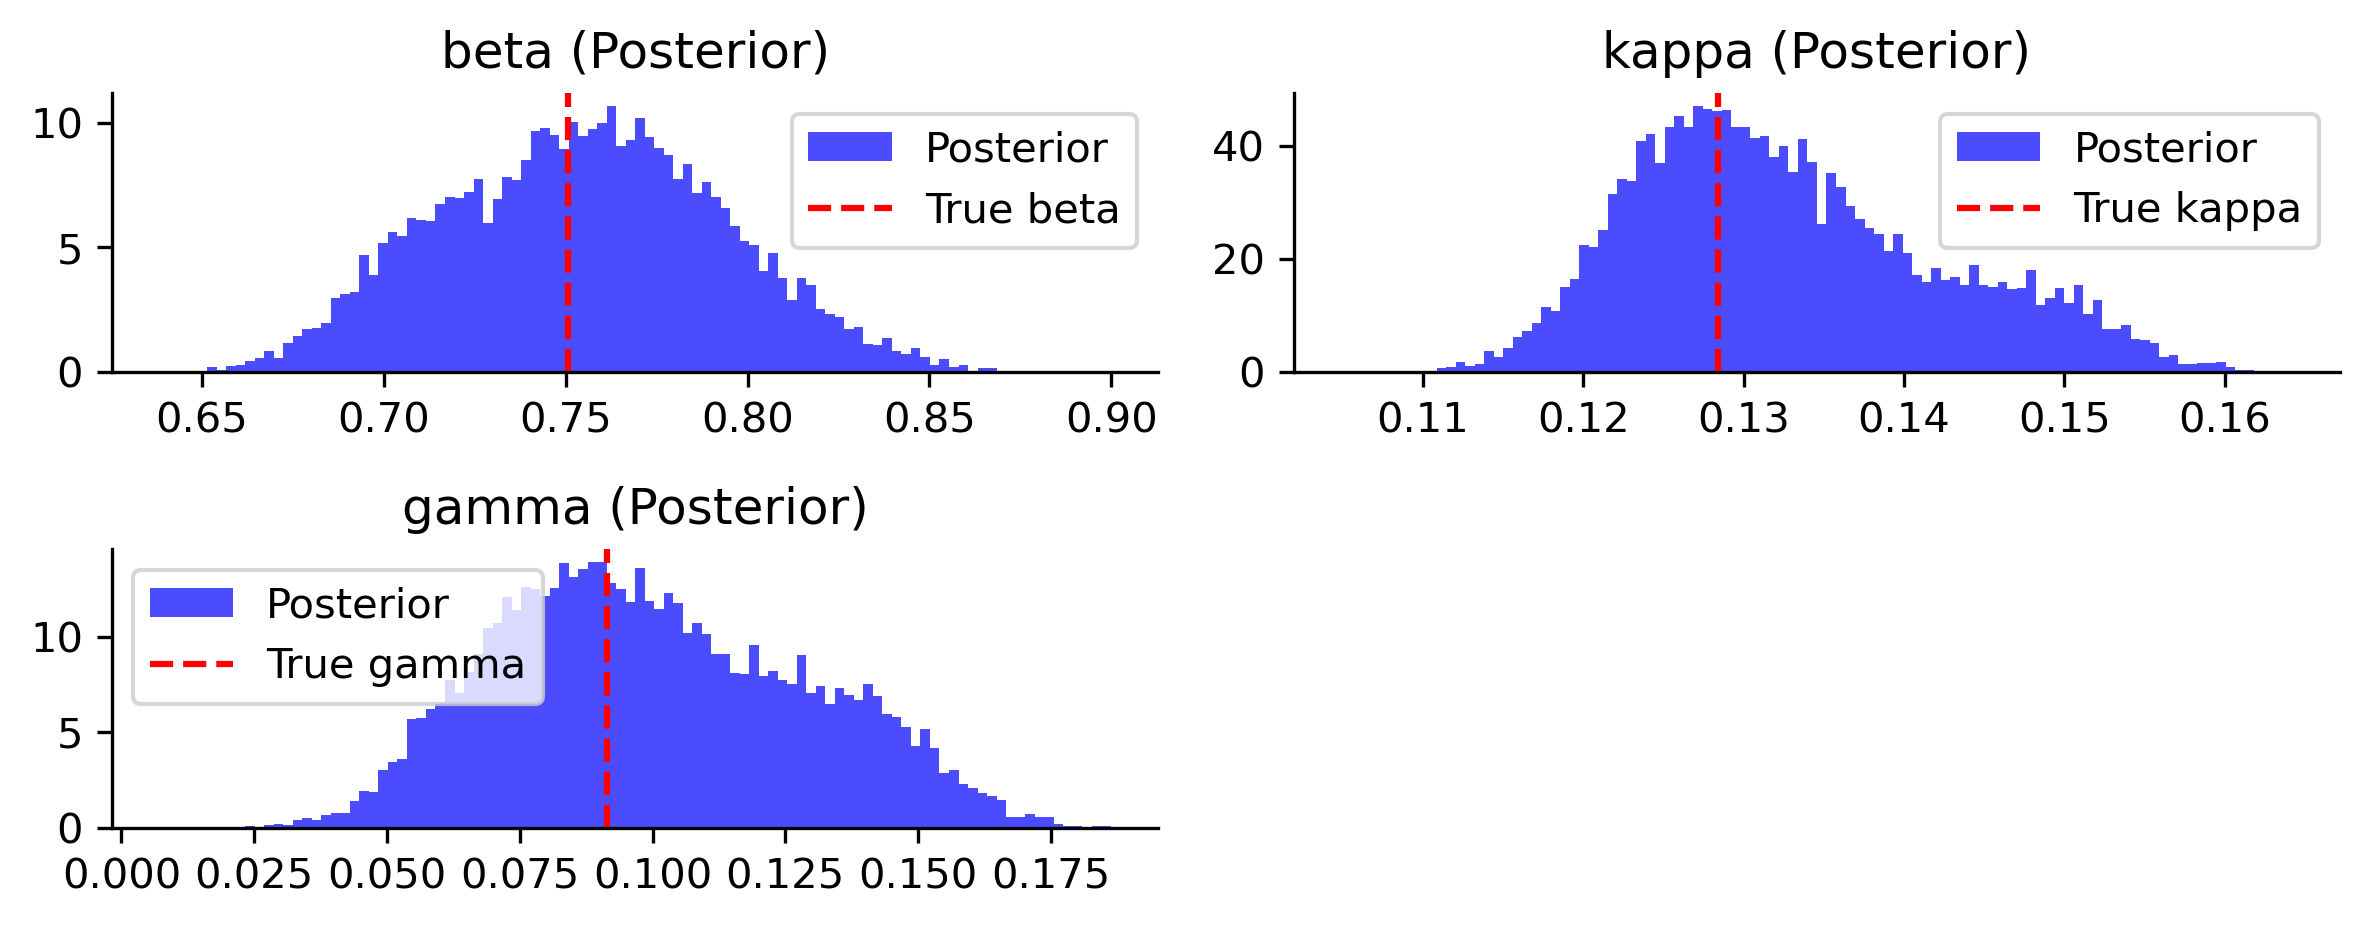

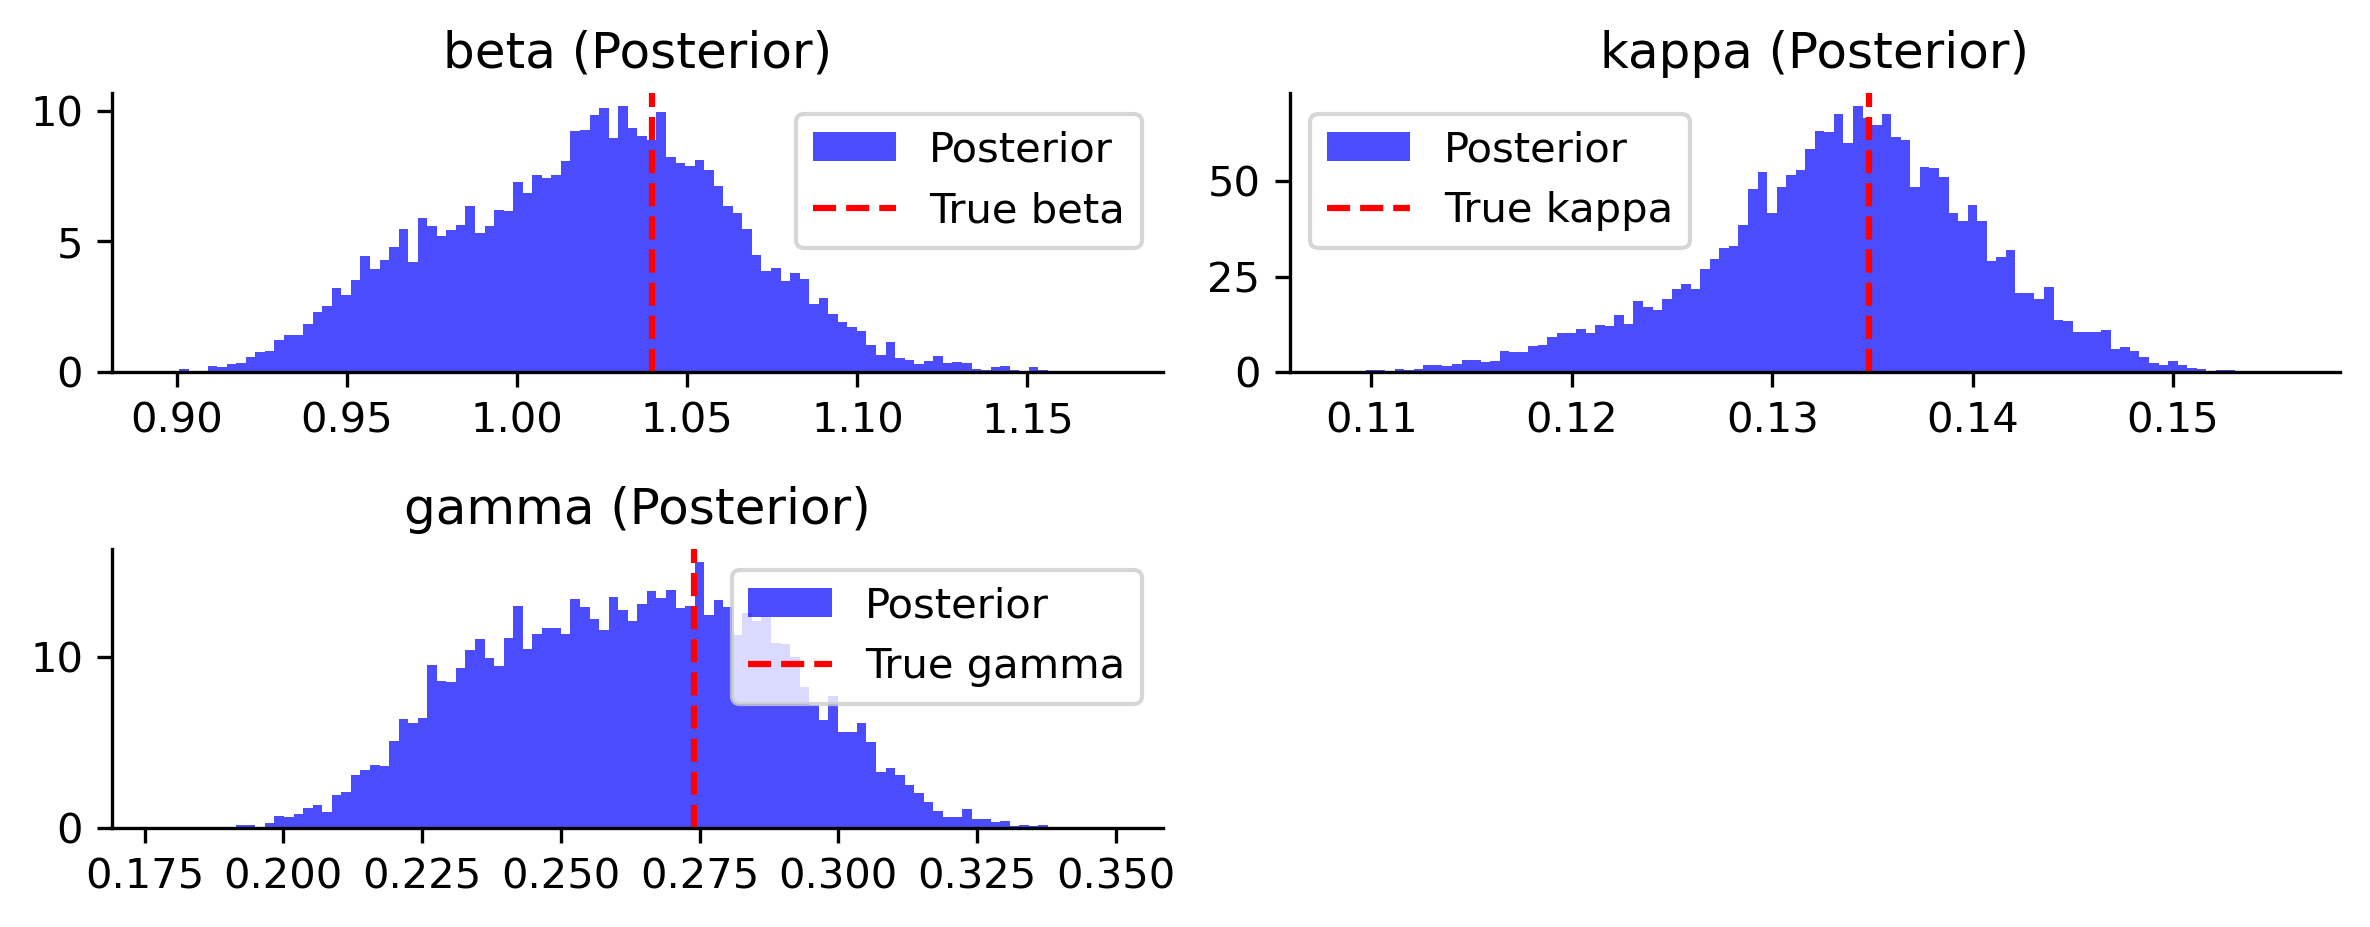

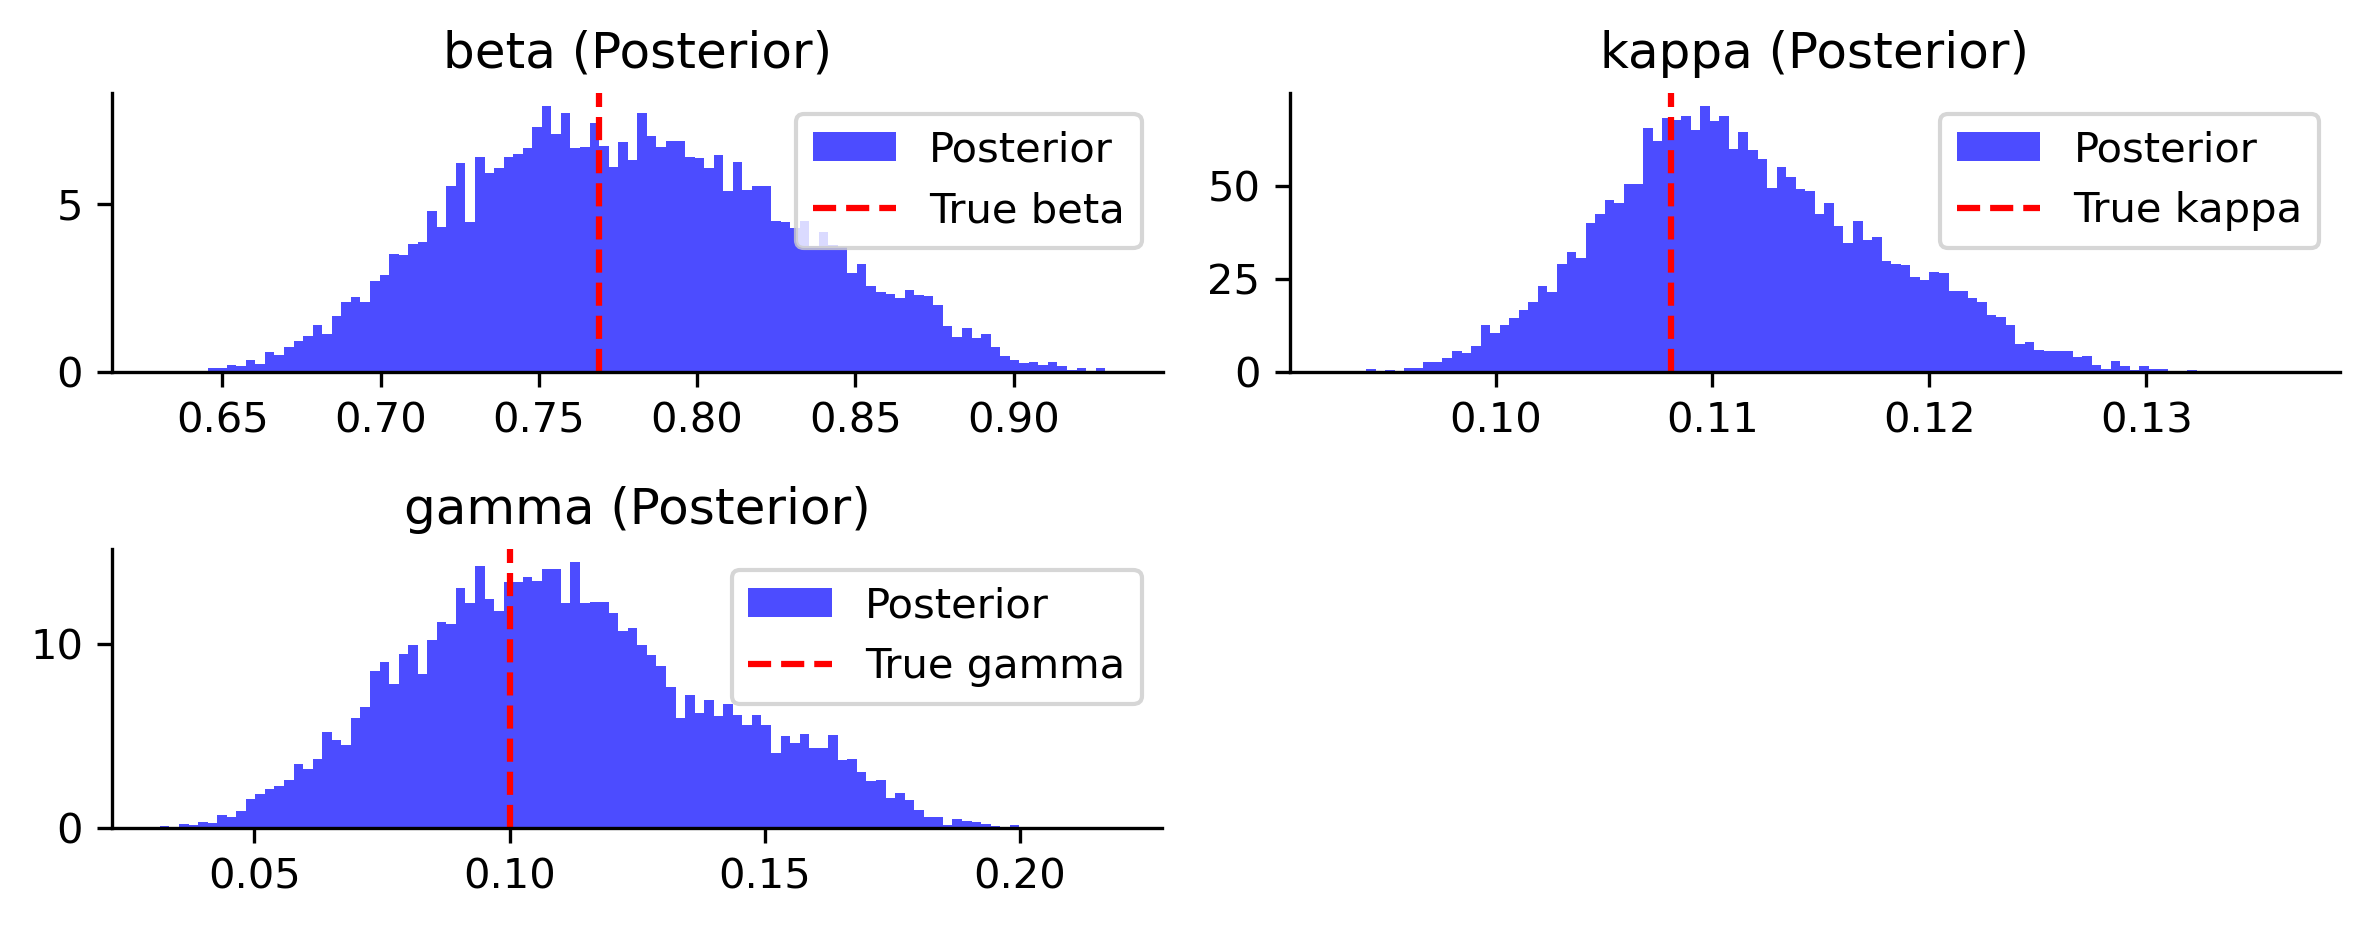

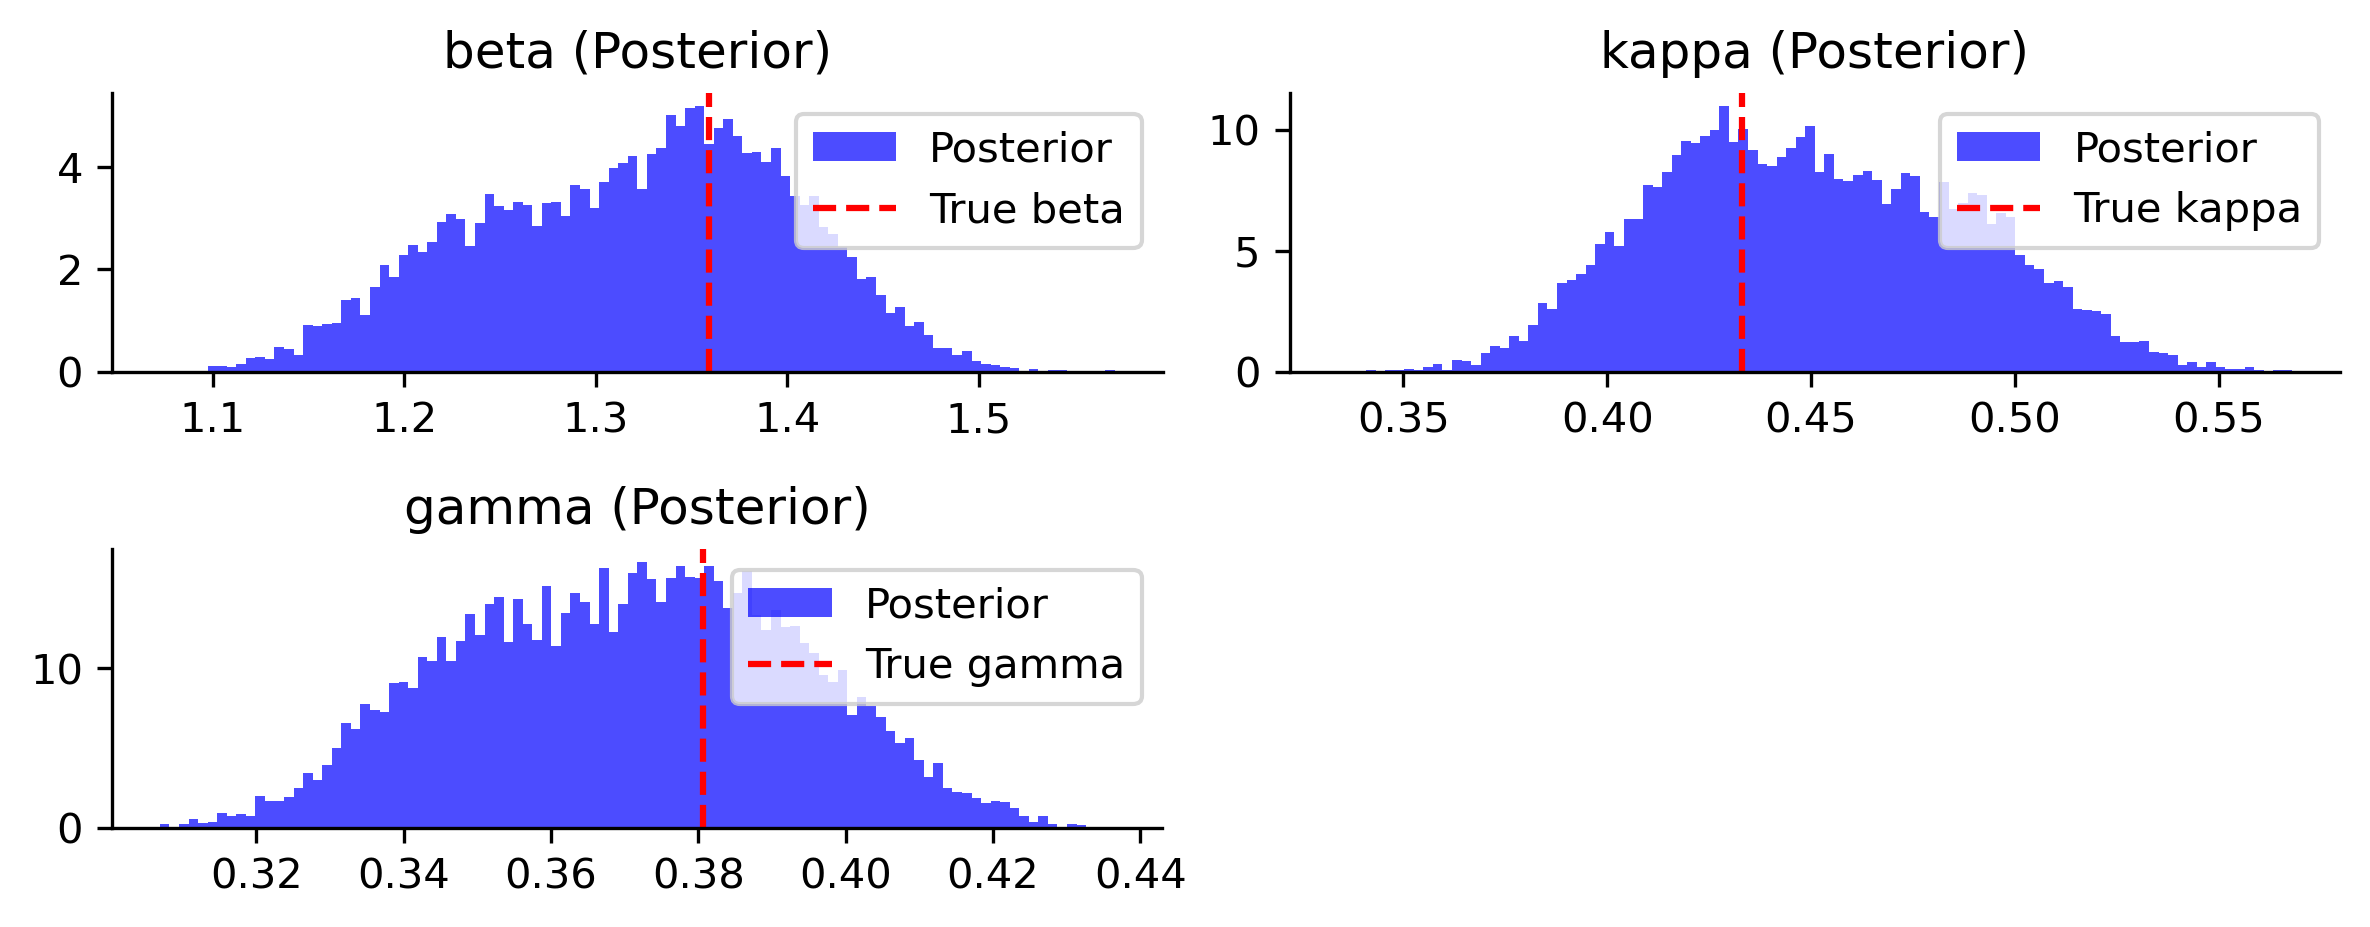

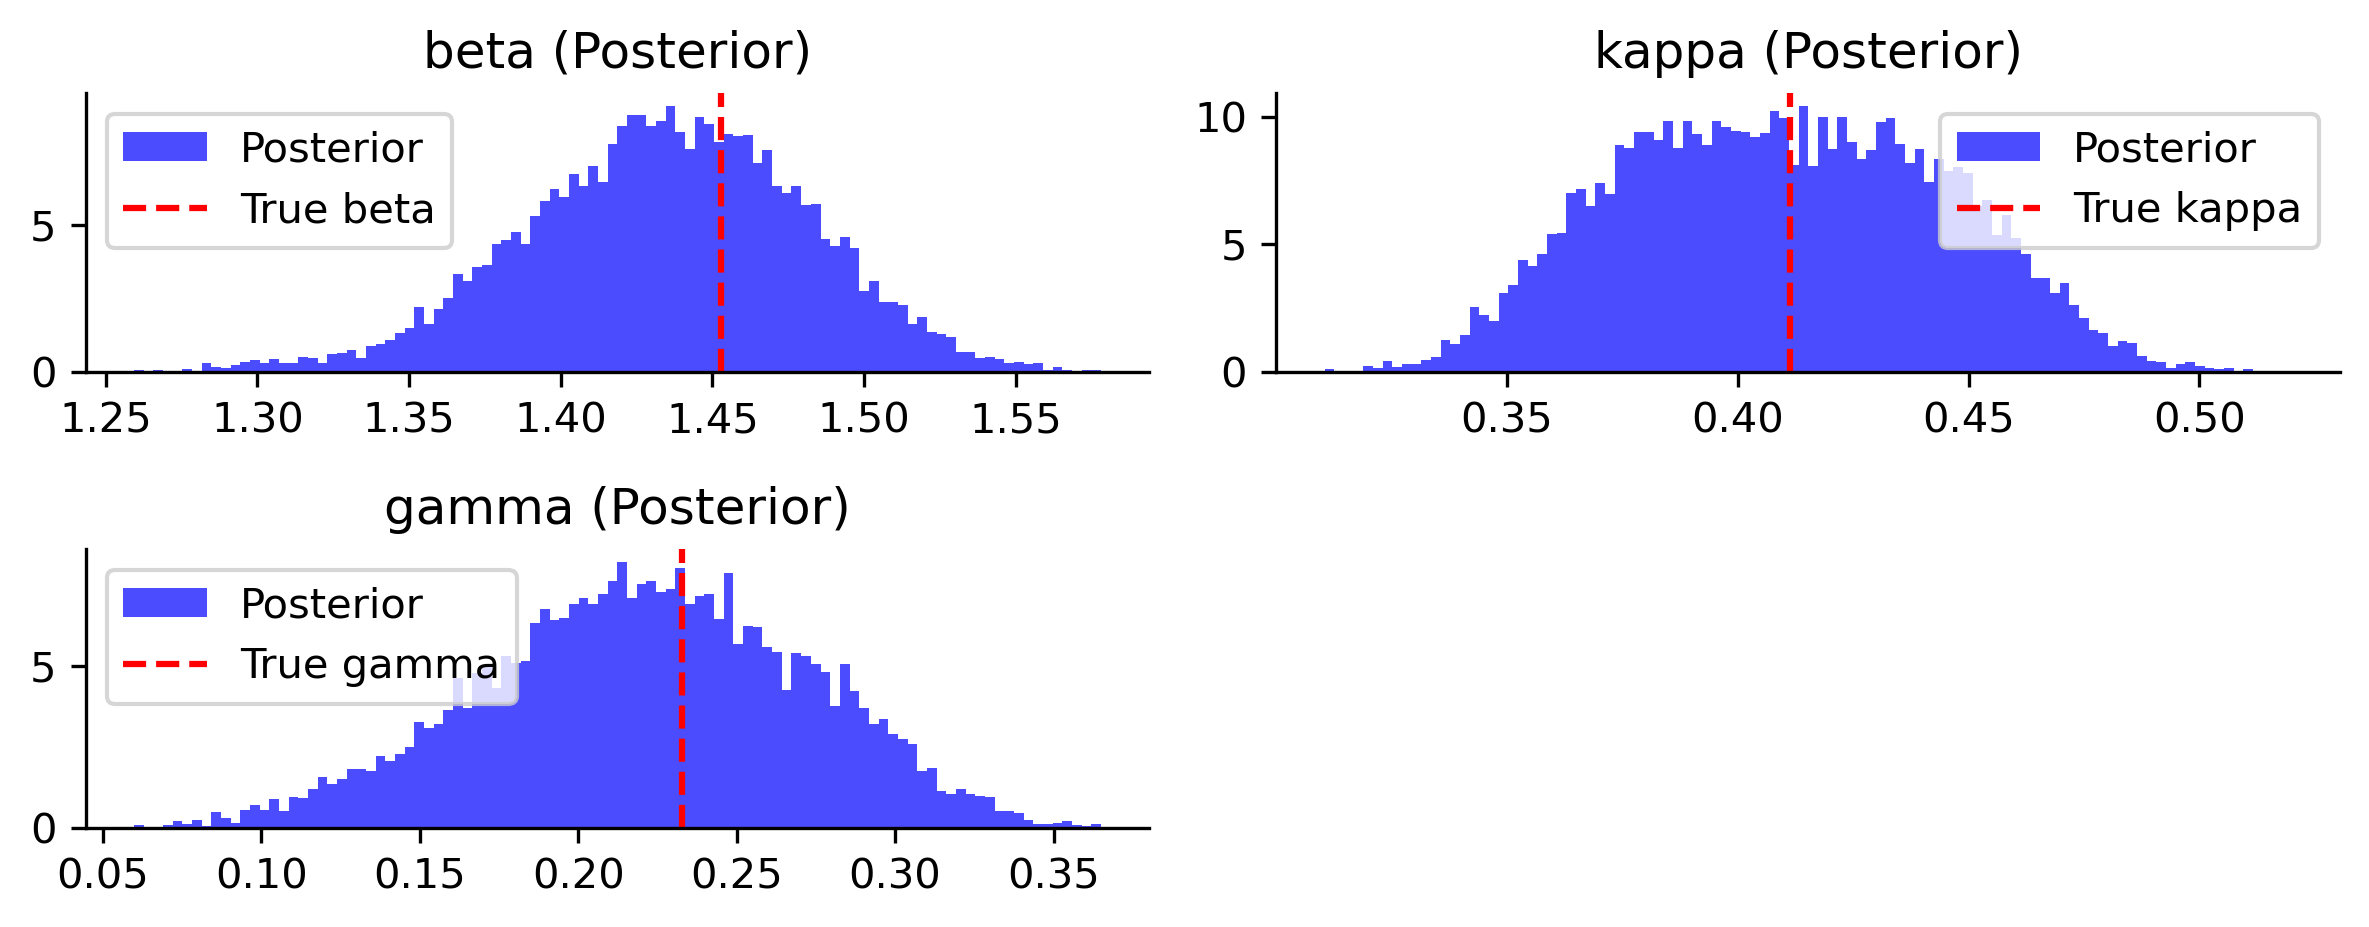

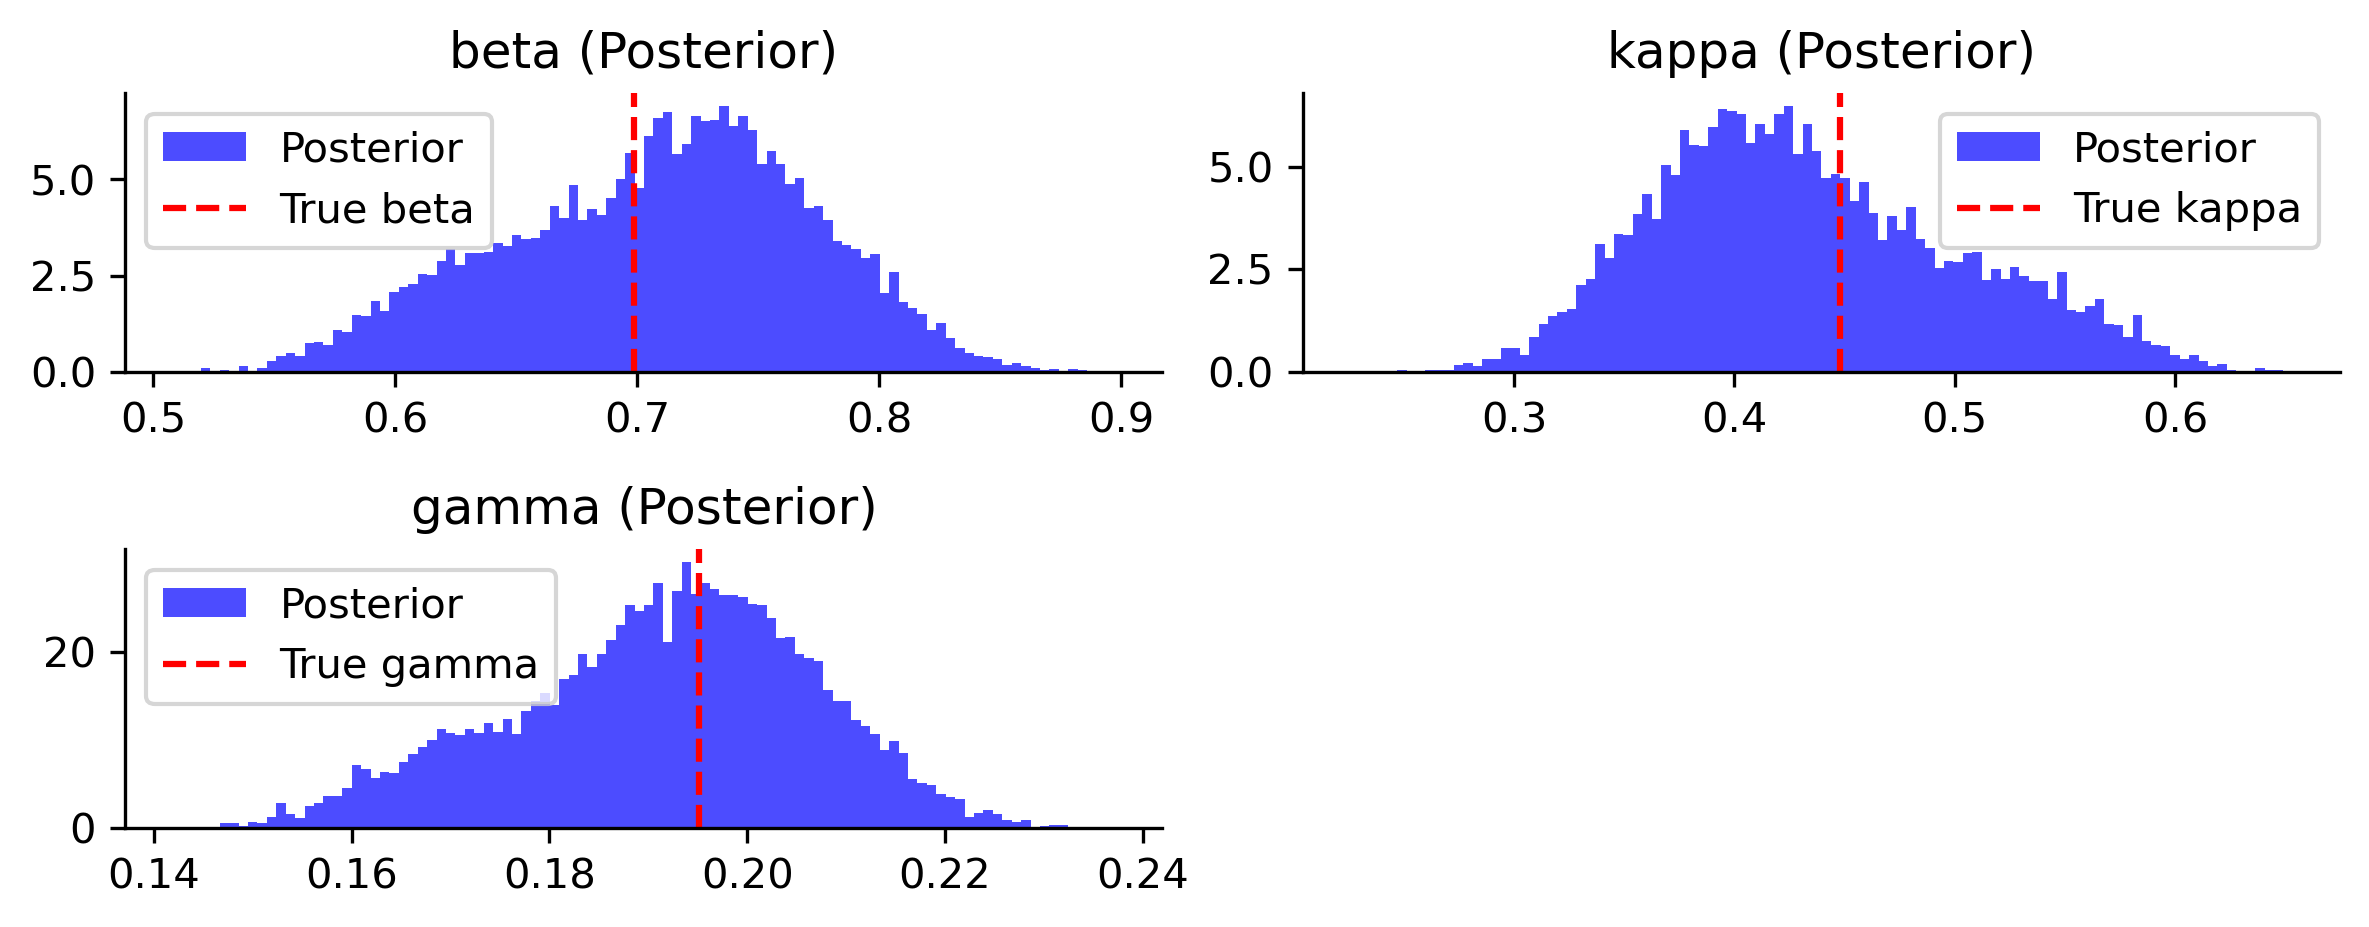

In [39]:
for k in range(10):
    samples = posterior_samples_10k[k]
    true_values = simulation_dataset[k]['params']
    plt.figure(figsize=(8, 6),dpi=300)
    for i in range(3):
        plt.subplot(4, 2, i + 1)
        plt.hist(samples.iloc[:,i], bins=100, alpha=0.7, label="Posterior", color='blue', density=True)
        plt.axvline(true_values[param_names[i]], color='red', linestyle='--', label=f"True {param_names[i]}")
        plt.title(f"{param_names[i]} (Posterior)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [40]:
with open("./posterior/ABC_10k_posterior_samples.pkl", "wb") as f:
    pickle.dump(posterior_samples_10k, f)

In [41]:
results_100k = []
gene_num = 100

for i, sim in enumerate(simulation_dataset):
    obs_data = sim['poisson']
    obs_dict={"cases1": obs_data[:,0]}
 
    db_path = "sqlite:///" + tempfile.mkstemp(suffix=f"abc_{i}.db")[1]

    abc = ABCSMC(model, prior, distance, transitions=transition, eps=eps, population_size=1000)
    abc.new(db_path, obs_dict)

    start_time = time.time()
    history = abc.run(max_total_nr_simulations=100000)
    end_time = time.time()

    df_posterior = history.get_distribution()
    
    results_100k.append({
        "id": i,
        "params": sim['params'],
        "posterior": df_posterior,
        "populations": history.get_all_populations(),
        "runtime": end_time - start_time
    })

    print(f"[{i}] Done in {end_time - start_time:.2f} seconds")

with open("./results/M1_100k.pkl", "wb") as f:
    pickle.dump(results_100k, f)

ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.History INFO: Start <ABCSMC id=1, start_time=2026-01-26 18:57:59>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 1.05732553e+04.
ABC INFO: Accepted: 1000 / 5421 = 1.8447e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 2.88020508e+03.
ABC INFO: Accepted: 1000 / 5804 = 1.7229e-01, ESS: 8.9475e+02.
ABC INFO: t: 2, eps: 1.51143851e+03.
ABC INFO: Accepted: 1000 / 9150 = 1.0929e-01, ESS: 9.0548e+02.
ABC INFO: t: 3, eps: 7.96728401e+02.
ABC INFO: Accepted: 1000 / 7794 = 1.2830e-01, ESS: 8.8520e+02.
ABC INFO: t: 4, eps: 5.10429179e+02.
ABC INFO: Accepted: 1000 / 6733 = 1.4852e-01, ESS: 8.6695e+02.
ABC INFO: t: 5, eps: 4.15768461e+02.
ABC INFO: Accepted: 1000 / 12428 = 8.0463e-02, ESS: 8.5370e+02.
ABC INFO: t: 6, eps: 3.68736486e+02.
ABC INFO: Accepted: 1000 / 37478 = 2.6682e-02, ESS: 5.4930e+02.
ABC INFO: t: 7, eps: 3.36316343e+02.
ABC INFO: Accepted: 1000 / 168406 = 5.9380e-03, ESS: 4.1177e+02.
ABC INFO: Stop: Total simulation

[0] Done in 44.43 seconds


ABC INFO: t: 0, eps: 1.14422555e+04.
ABC INFO: Accepted: 1000 / 4720 = 2.1186e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 2.85787819e+03.
ABC INFO: Accepted: 1000 / 5004 = 1.9984e-01, ESS: 9.1993e+02.
ABC INFO: t: 2, eps: 1.16480783e+03.
ABC INFO: Accepted: 1000 / 8134 = 1.2294e-01, ESS: 8.6948e+02.
ABC INFO: t: 3, eps: 7.57188994e+02.
ABC INFO: Accepted: 1000 / 9678 = 1.0333e-01, ESS: 8.1730e+02.
ABC INFO: t: 4, eps: 5.83926515e+02.
ABC INFO: Accepted: 1000 / 14814 = 6.7504e-02, ESS: 8.7741e+02.
ABC INFO: t: 5, eps: 5.00643076e+02.
ABC INFO: Accepted: 1000 / 14714 = 6.7962e-02, ESS: 7.3713e+02.
ABC INFO: t: 6, eps: 4.47257508e+02.
ABC INFO: Accepted: 1000 / 31479 = 3.1767e-02, ESS: 7.5699e+02.
ABC INFO: t: 7, eps: 4.06710613e+02.
ABC INFO: Accepted: 1000 / 66305 = 1.5082e-02, ESS: 6.4063e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:32.116112, end_time=2026-01-26 18:59:16>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.H

[1] Done in 32.09 seconds


ABC INFO: t: 0, eps: 1.28620176e+04.
ABC INFO: Accepted: 1000 / 4700 = 2.1277e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.52161976e+03.
ABC INFO: Accepted: 1000 / 4621 = 2.1640e-01, ESS: 8.8742e+02.
ABC INFO: t: 2, eps: 1.43398091e+03.
ABC INFO: Accepted: 1000 / 6527 = 1.5321e-01, ESS: 9.2276e+02.
ABC INFO: t: 3, eps: 8.09887276e+02.
ABC INFO: Accepted: 1000 / 7770 = 1.2870e-01, ESS: 8.8792e+02.
ABC INFO: t: 4, eps: 5.61351481e+02.
ABC INFO: Accepted: 1000 / 12222 = 8.1820e-02, ESS: 8.7863e+02.
ABC INFO: t: 5, eps: 4.62129896e+02.
ABC INFO: Accepted: 1000 / 14576 = 6.8606e-02, ESS: 8.0359e+02.
ABC INFO: t: 6, eps: 4.01657351e+02.
ABC INFO: Accepted: 1000 / 30546 = 3.2738e-02, ESS: 6.7720e+02.
ABC INFO: t: 7, eps: 3.61425194e+02.
ABC INFO: Accepted: 1000 / 62024 = 1.6123e-02, ESS: 5.4102e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:30.848028, end_time=2026-01-26 18:59:46>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.H

[2] Done in 30.84 seconds


ABC INFO: t: 0, eps: 1.07927157e+04.
ABC INFO: Accepted: 1000 / 5116 = 1.9547e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 2.68008785e+03.
ABC INFO: Accepted: 1000 / 5514 = 1.8136e-01, ESS: 9.5232e+02.
ABC INFO: t: 2, eps: 1.28949848e+03.
ABC INFO: Accepted: 1000 / 7845 = 1.2747e-01, ESS: 8.4880e+02.
ABC INFO: t: 3, eps: 7.11756233e+02.
ABC INFO: Accepted: 1000 / 9619 = 1.0396e-01, ESS: 8.4412e+02.
ABC INFO: t: 4, eps: 4.93683823e+02.
ABC INFO: Accepted: 1000 / 9546 = 1.0476e-01, ESS: 8.7882e+02.
ABC INFO: t: 5, eps: 4.05556025e+02.
ABC INFO: Accepted: 1000 / 11883 = 8.4154e-02, ESS: 7.2385e+02.
ABC INFO: t: 6, eps: 3.55411349e+02.
ABC INFO: Accepted: 1000 / 33388 = 2.9951e-02, ESS: 5.6184e+02.
ABC INFO: t: 7, eps: 3.21325119e+02.
ABC INFO: Accepted: 1000 / 98967 = 1.0104e-02, ESS: 2.3530e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:36.999237, end_time=2026-01-26 19:00:23>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.Hi

[3] Done in 36.99 seconds


ABC INFO: t: 0, eps: 1.28109806e+04.
ABC INFO: Accepted: 1000 / 4676 = 2.1386e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.53368077e+03.
ABC INFO: Accepted: 1000 / 5072 = 1.9716e-01, ESS: 9.0429e+02.
ABC INFO: t: 2, eps: 1.62518246e+03.
ABC INFO: Accepted: 1000 / 7993 = 1.2511e-01, ESS: 8.6497e+02.
ABC INFO: t: 3, eps: 1.01838605e+03.
ABC INFO: Accepted: 1000 / 14675 = 6.8143e-02, ESS: 8.5735e+02.
ABC INFO: t: 4, eps: 6.80234161e+02.
ABC INFO: Accepted: 1000 / 9128 = 1.0955e-01, ESS: 8.3735e+02.
ABC INFO: t: 5, eps: 5.11214916e+02.
ABC INFO: Accepted: 1000 / 5436 = 1.8396e-01, ESS: 9.5028e+02.
ABC INFO: t: 6, eps: 4.25122323e+02.
ABC INFO: Accepted: 1000 / 6774 = 1.4762e-01, ESS: 8.8682e+02.
ABC INFO: t: 7, eps: 3.78062884e+02.
ABC INFO: Accepted: 1000 / 13586 = 7.3605e-02, ESS: 3.9614e+02.
ABC INFO: t: 8, eps: 3.46801559e+02.
ABC INFO: Accepted: 1000 / 43697 = 2.2885e-02, ESS: 3.7229e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:27.4

[4] Done in 27.46 seconds


ABC INFO: t: 0, eps: 1.33010183e+04.
ABC INFO: Accepted: 1000 / 4750 = 2.1053e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.55638767e+03.
ABC INFO: Accepted: 1000 / 5399 = 1.8522e-01, ESS: 9.1711e+02.
ABC INFO: t: 2, eps: 1.49364001e+03.
ABC INFO: Accepted: 1000 / 8668 = 1.1537e-01, ESS: 7.9694e+02.
ABC INFO: t: 3, eps: 8.38388199e+02.
ABC INFO: Accepted: 1000 / 20476 = 4.8838e-02, ESS: 8.7214e+02.
ABC INFO: t: 4, eps: 5.66759617e+02.
ABC INFO: Accepted: 1000 / 6116 = 1.6351e-01, ESS: 9.3422e+02.
ABC INFO: t: 5, eps: 4.58540806e+02.
ABC INFO: Accepted: 1000 / 5915 = 1.6906e-01, ESS: 9.1909e+02.
ABC INFO: t: 6, eps: 3.99278709e+02.
ABC INFO: Accepted: 1000 / 9700 = 1.0309e-01, ESS: 6.9558e+02.
ABC INFO: t: 7, eps: 3.66221749e+02.
ABC INFO: Accepted: 1000 / 23404 = 4.2728e-02, ESS: 6.3894e+02.
ABC INFO: t: 8, eps: 3.39449731e+02.
ABC INFO: Accepted: 1000 / 65472 = 1.5274e-02, ESS: 4.4982e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:31.3

[5] Done in 31.35 seconds


ABC INFO: t: 0, eps: 1.18733251e+04.
ABC INFO: Accepted: 1000 / 5362 = 1.8650e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.22370298e+03.
ABC INFO: Accepted: 1000 / 5199 = 1.9234e-01, ESS: 9.1218e+02.
ABC INFO: t: 2, eps: 1.47511981e+03.
ABC INFO: Accepted: 1000 / 10410 = 9.6061e-02, ESS: 8.1918e+02.
ABC INFO: t: 3, eps: 9.14880023e+02.
ABC INFO: Accepted: 1000 / 21596 = 4.6305e-02, ESS: 8.6309e+02.
ABC INFO: t: 4, eps: 6.14406152e+02.
ABC INFO: Accepted: 1000 / 5911 = 1.6918e-01, ESS: 9.2450e+02.
ABC INFO: t: 5, eps: 4.80484055e+02.
ABC INFO: Accepted: 1000 / 5439 = 1.8386e-01, ESS: 9.4194e+02.
ABC INFO: t: 6, eps: 4.19410282e+02.
ABC INFO: Accepted: 1000 / 7105 = 1.4075e-01, ESS: 8.0286e+02.
ABC INFO: t: 7, eps: 3.80433310e+02.
ABC INFO: Accepted: 1000 / 17571 = 5.6912e-02, ESS: 6.3052e+02.
ABC INFO: t: 8, eps: 3.54100289e+02.
ABC INFO: Accepted: 1000 / 51769 = 1.9317e-02, ESS: 5.2381e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:29.

[6] Done in 29.36 seconds


ABC INFO: t: 0, eps: 1.34759330e+04.
ABC INFO: Accepted: 1000 / 4517 = 2.2139e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 3.13711185e+03.
ABC INFO: Accepted: 1000 / 5082 = 1.9677e-01, ESS: 9.1220e+02.
ABC INFO: t: 2, eps: 1.24533768e+03.
ABC INFO: Accepted: 1000 / 5339 = 1.8730e-01, ESS: 9.4223e+02.
ABC INFO: t: 3, eps: 7.16453488e+02.
ABC INFO: Accepted: 1000 / 6808 = 1.4689e-01, ESS: 9.1877e+02.
ABC INFO: t: 4, eps: 5.04919036e+02.
ABC INFO: Accepted: 1000 / 8408 = 1.1893e-01, ESS: 9.0247e+02.
ABC INFO: t: 5, eps: 4.12654120e+02.
ABC INFO: Accepted: 1000 / 10806 = 9.2541e-02, ESS: 5.9386e+02.
ABC INFO: t: 6, eps: 3.61050359e+02.
ABC INFO: Accepted: 1000 / 22096 = 4.5257e-02, ESS: 4.8571e+02.
ABC INFO: t: 7, eps: 3.24507888e+02.
ABC INFO: Accepted: 1000 / 57048 = 1.7529e-02, ESS: 6.8016e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:29.669073, end_time=2026-01-26 19:02:21>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.Hi

[7] Done in 29.66 seconds


ABC INFO: t: 0, eps: 1.79084071e+04.
ABC INFO: Accepted: 1000 / 4515 = 2.2148e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 4.20721190e+03.
ABC INFO: Accepted: 1000 / 4973 = 2.0109e-01, ESS: 9.1937e+02.
ABC INFO: t: 2, eps: 1.24279987e+03.
ABC INFO: Accepted: 1000 / 4960 = 2.0161e-01, ESS: 9.1088e+02.
ABC INFO: t: 3, eps: 6.90804918e+02.
ABC INFO: Accepted: 1000 / 5085 = 1.9666e-01, ESS: 9.5554e+02.
ABC INFO: t: 4, eps: 4.88979179e+02.
ABC INFO: Accepted: 1000 / 6792 = 1.4723e-01, ESS: 9.2283e+02.
ABC INFO: t: 5, eps: 3.87961820e+02.
ABC INFO: Accepted: 1000 / 10985 = 9.1033e-02, ESS: 8.7657e+02.
ABC INFO: t: 6, eps: 3.30199936e+02.
ABC INFO: Accepted: 1000 / 21843 = 4.5781e-02, ESS: 7.1918e+02.
ABC INFO: t: 7, eps: 2.89378199e+02.
ABC INFO: Accepted: 1000 / 68016 = 1.4702e-02, ESS: 6.4662e+02.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:30.608766, end_time=2026-01-26 19:02:52>
ABC.Sampler INFO: Parallelize sampling on 128 processes.
ABC.Hi

[8] Done in 30.60 seconds


ABC INFO: t: 0, eps: 1.11174357e+04.
ABC INFO: Accepted: 1000 / 5306 = 1.8847e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 2.88282721e+03.
ABC INFO: Accepted: 1000 / 5278 = 1.8947e-01, ESS: 9.1600e+02.
ABC INFO: t: 2, eps: 1.37702044e+03.
ABC INFO: Accepted: 1000 / 7022 = 1.4241e-01, ESS: 8.8332e+02.
ABC INFO: t: 3, eps: 7.58529960e+02.
ABC INFO: Accepted: 1000 / 9780 = 1.0225e-01, ESS: 8.5550e+02.
ABC INFO: t: 4, eps: 5.45054663e+02.
ABC INFO: Accepted: 1000 / 11947 = 8.3703e-02, ESS: 8.1246e+02.
ABC INFO: t: 5, eps: 4.43604770e+02.
ABC INFO: Accepted: 1000 / 16047 = 6.2317e-02, ESS: 7.4394e+02.
ABC INFO: t: 6, eps: 3.91225613e+02.
ABC INFO: Accepted: 1000 / 34705 = 2.8814e-02, ESS: 4.7811e+02.
ABC INFO: t: 7, eps: 3.52566645e+02.
ABC INFO: Accepted: 1000 / 116417 = 8.5898e-03, ESS: 7.4356e+00.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:38.990537, end_time=2026-01-26 19:03:31>


[9] Done in 38.98 seconds


In [42]:
posterior_samples_100k=[]
for i, res in enumerate(results_100k):  # results[i]['history']가 history 객체
    df, weights = res['posterior']
    df = df[param_names]
    
    kde_estimator = pyabc.transition.MultivariateNormalTransition()
    kde_estimator.fit(df, weights)
    
    num_samples = 10000
    samples = kde_estimator.rvs(num_samples)
    posterior_samples_100k.append(samples)

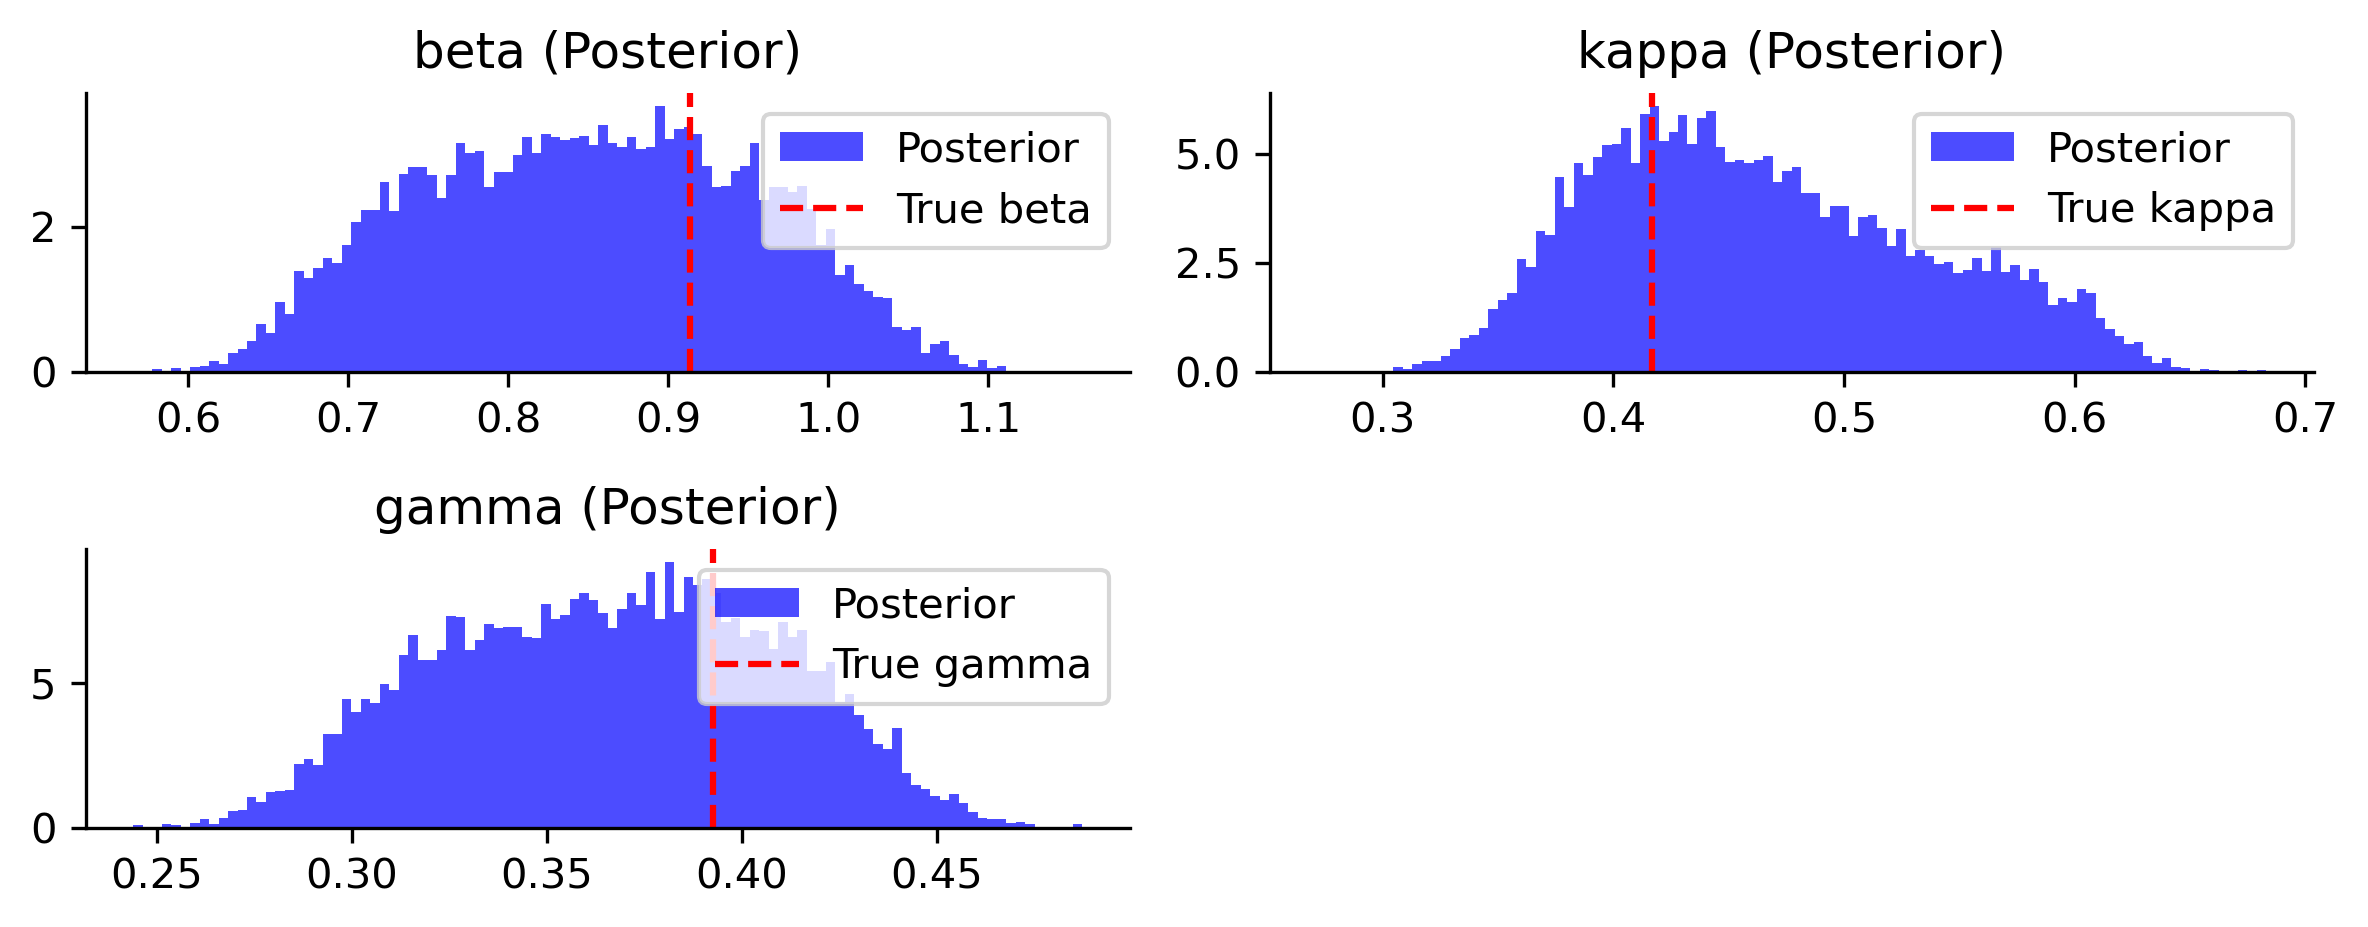

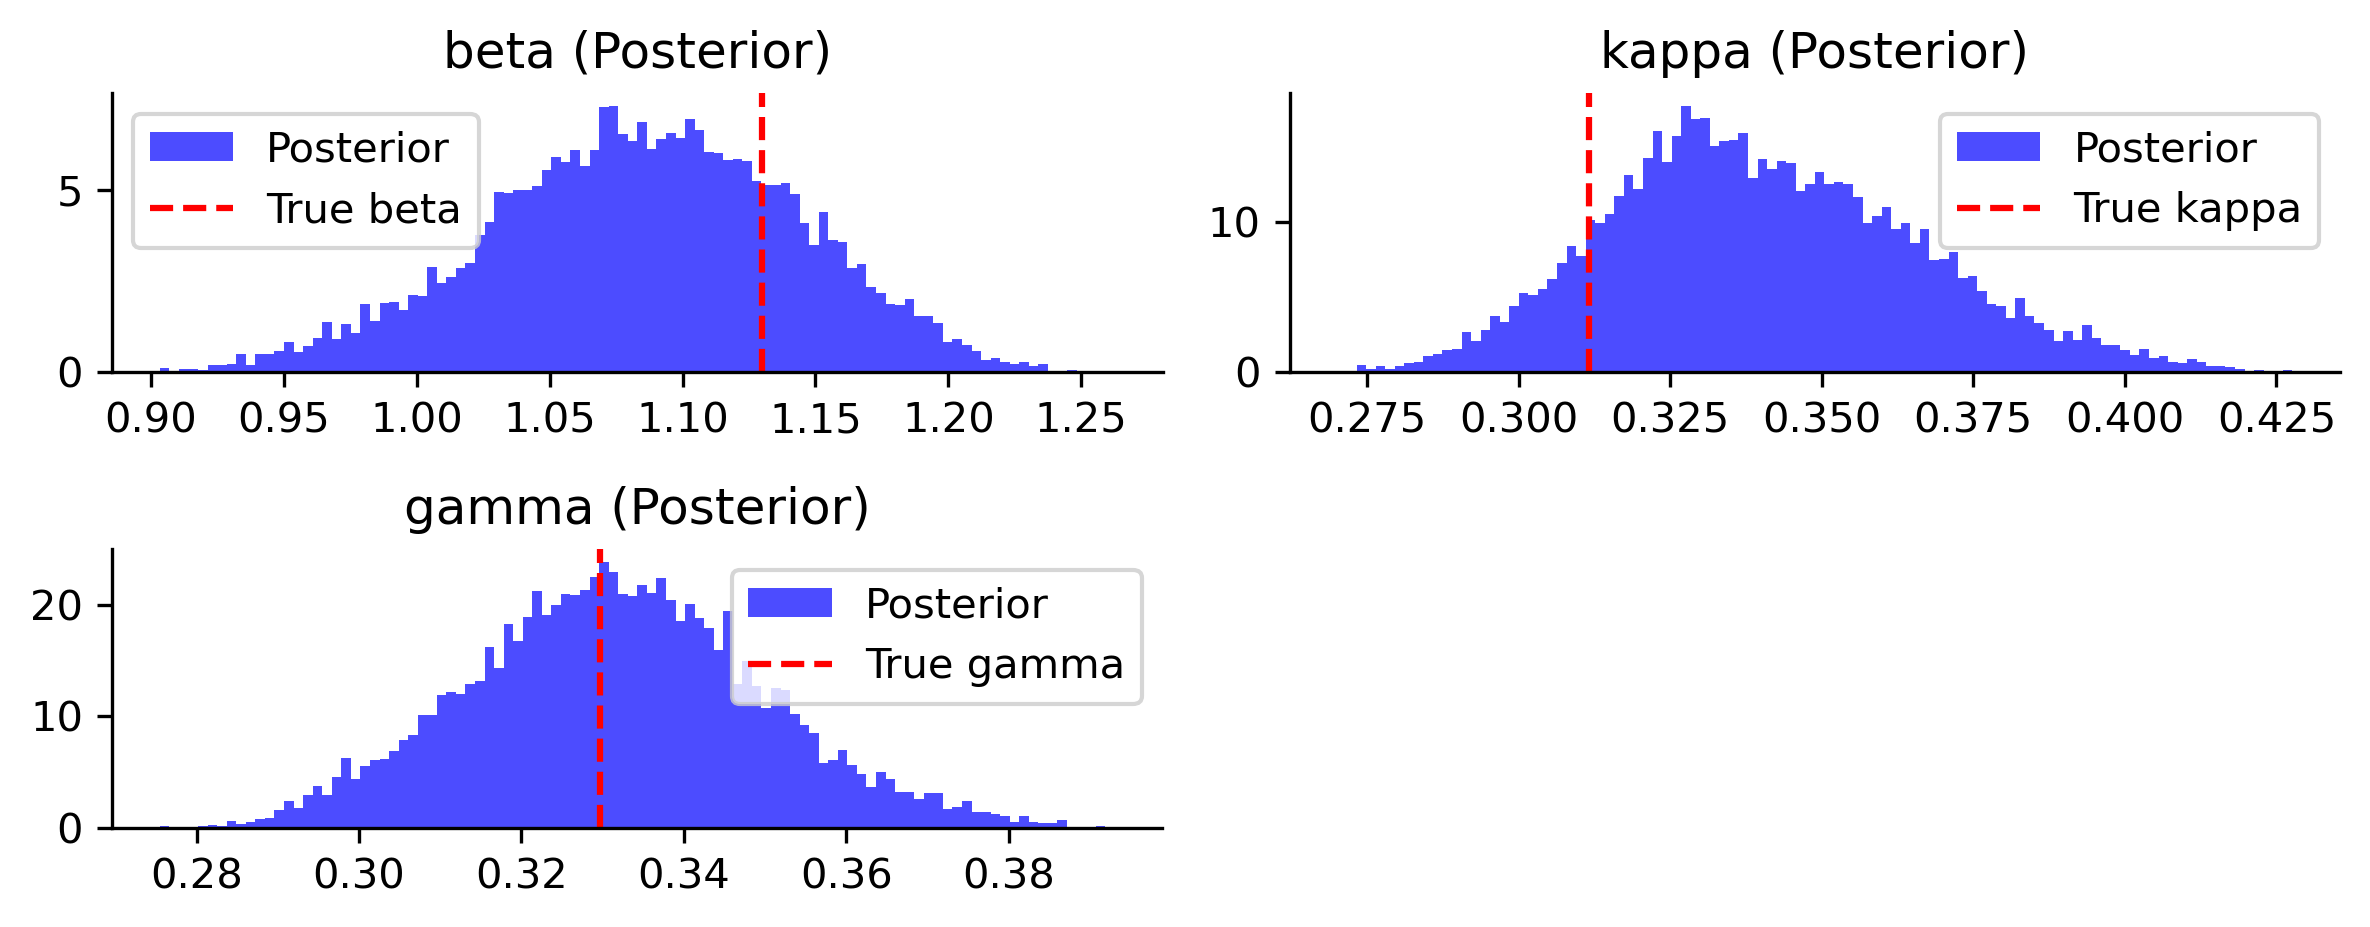

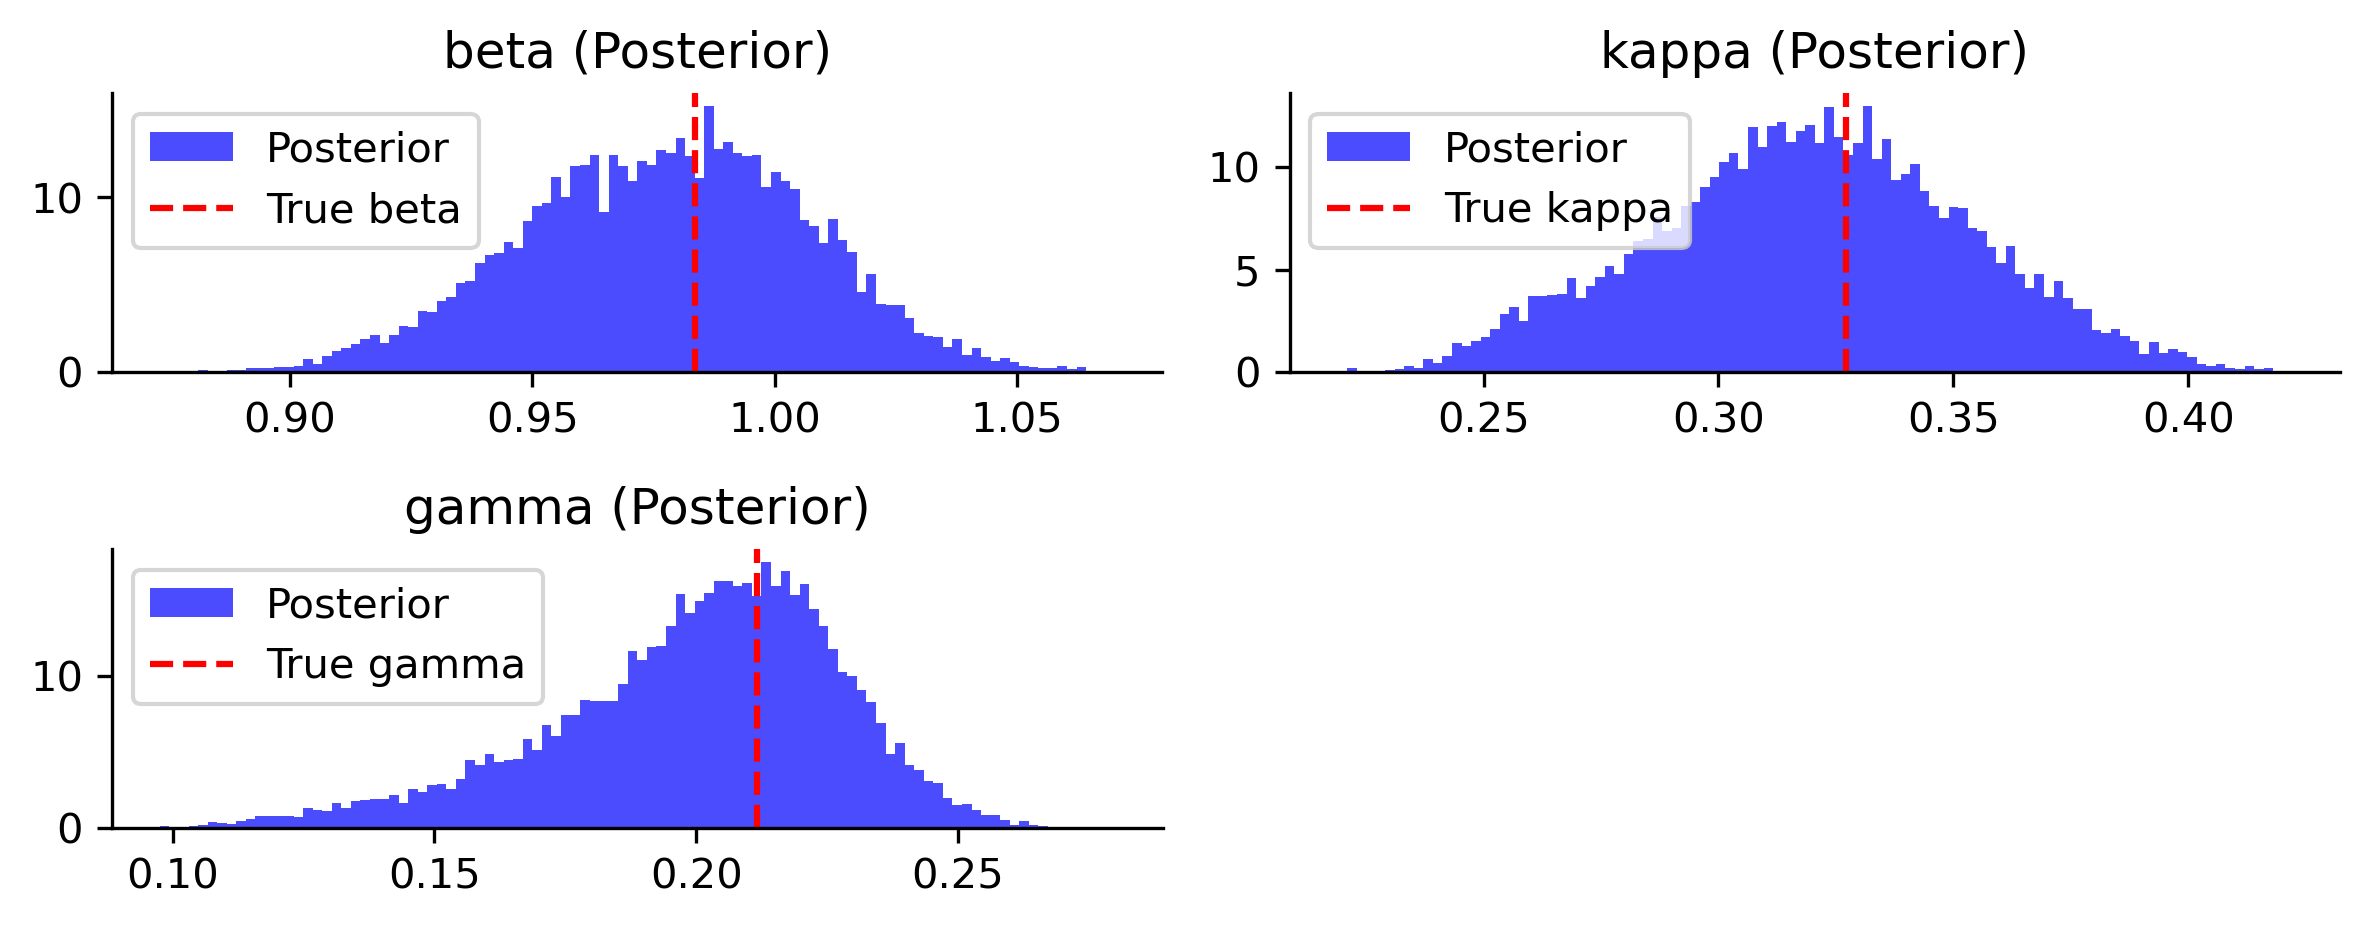

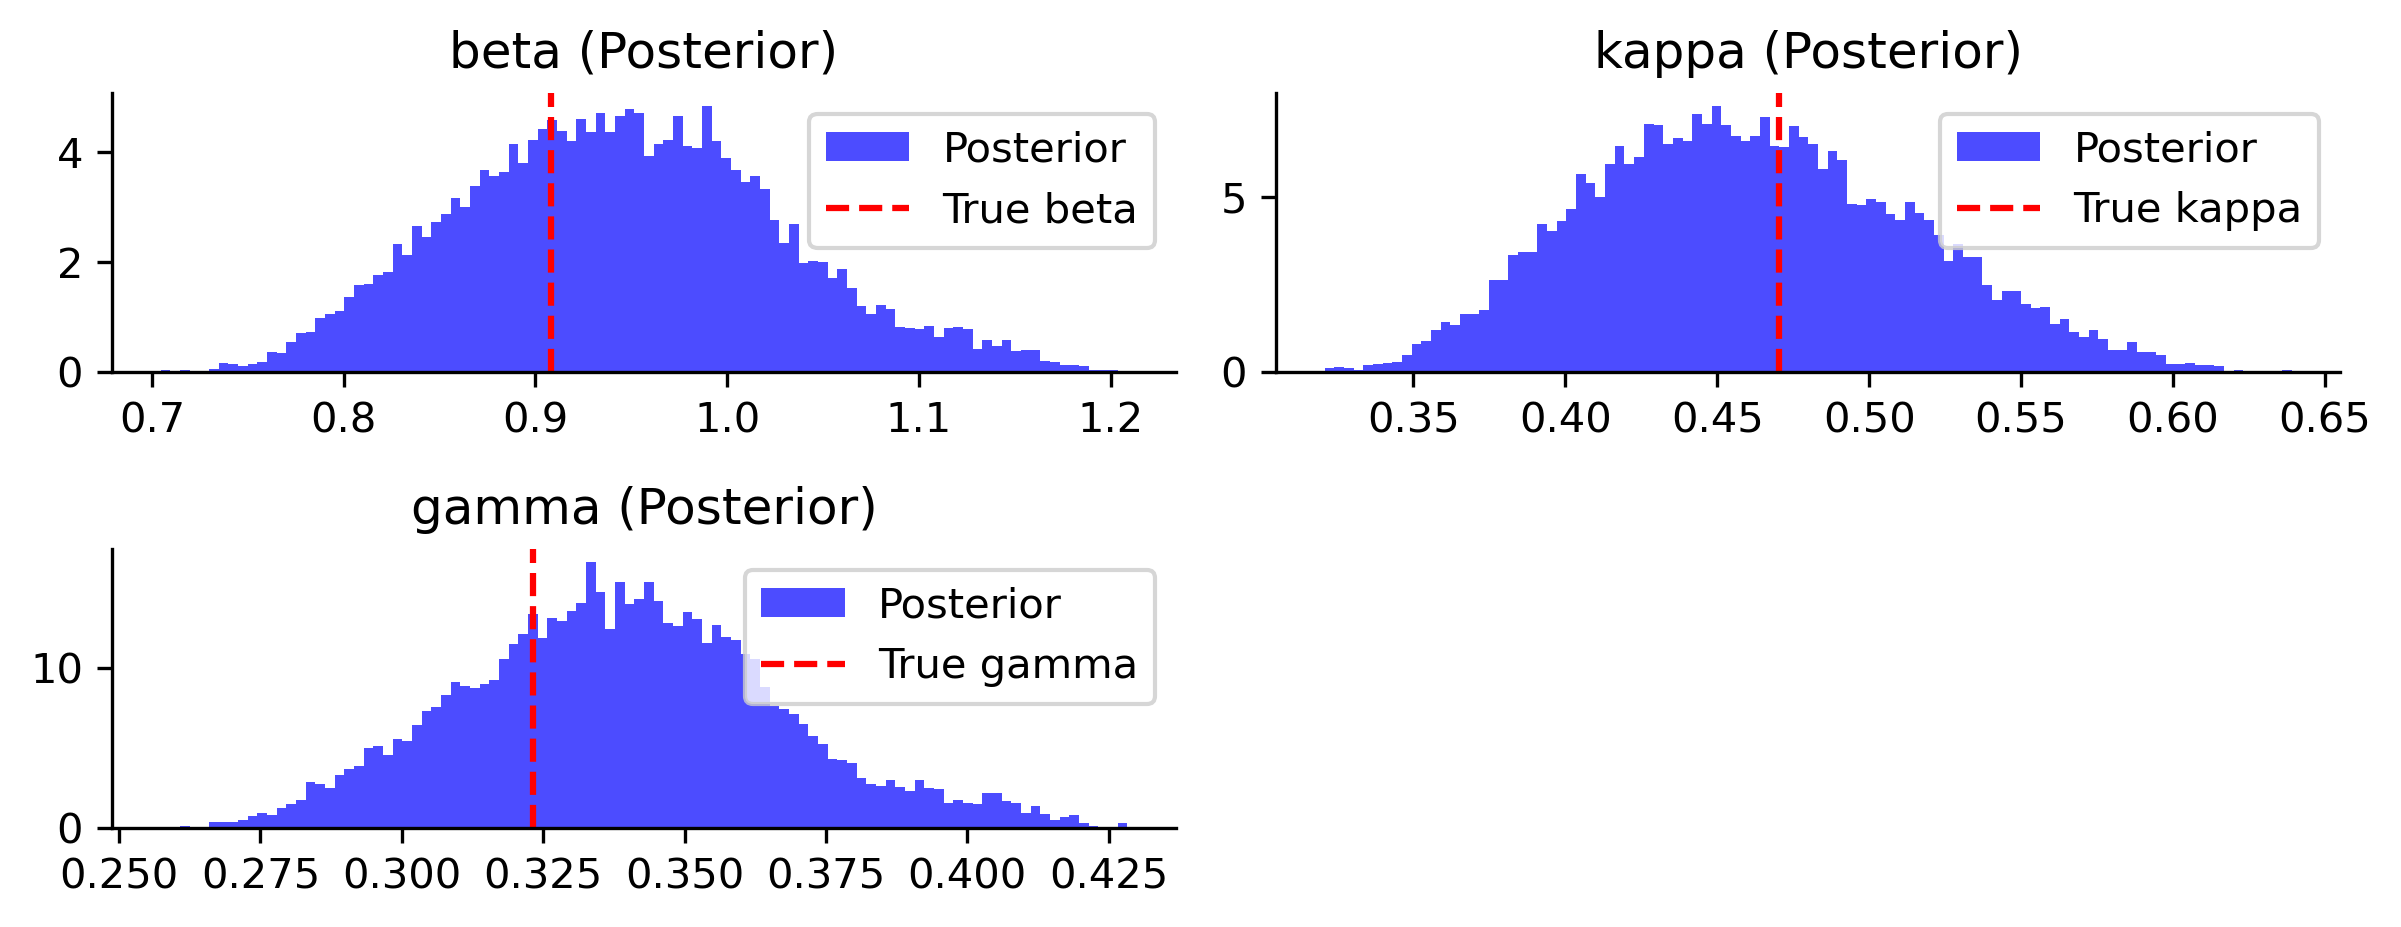

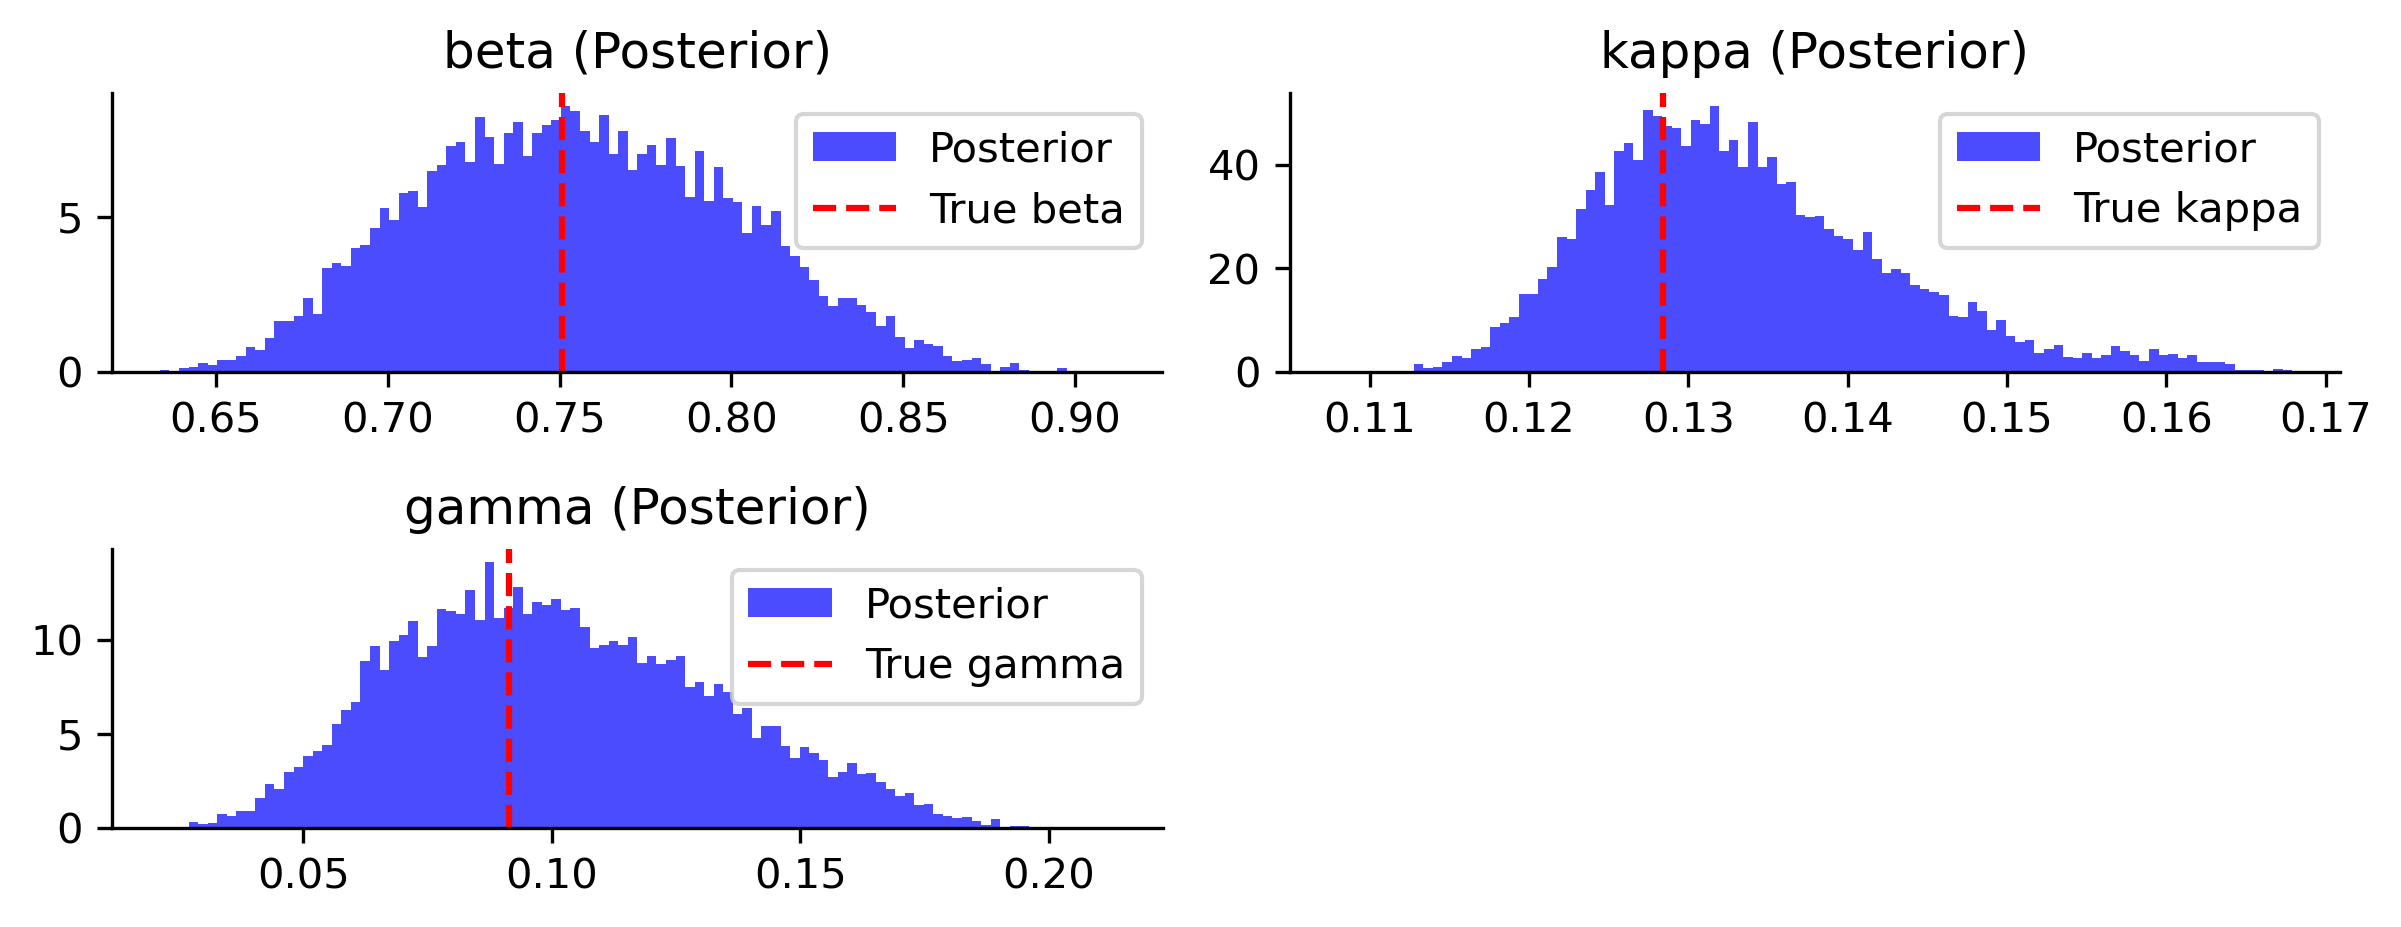

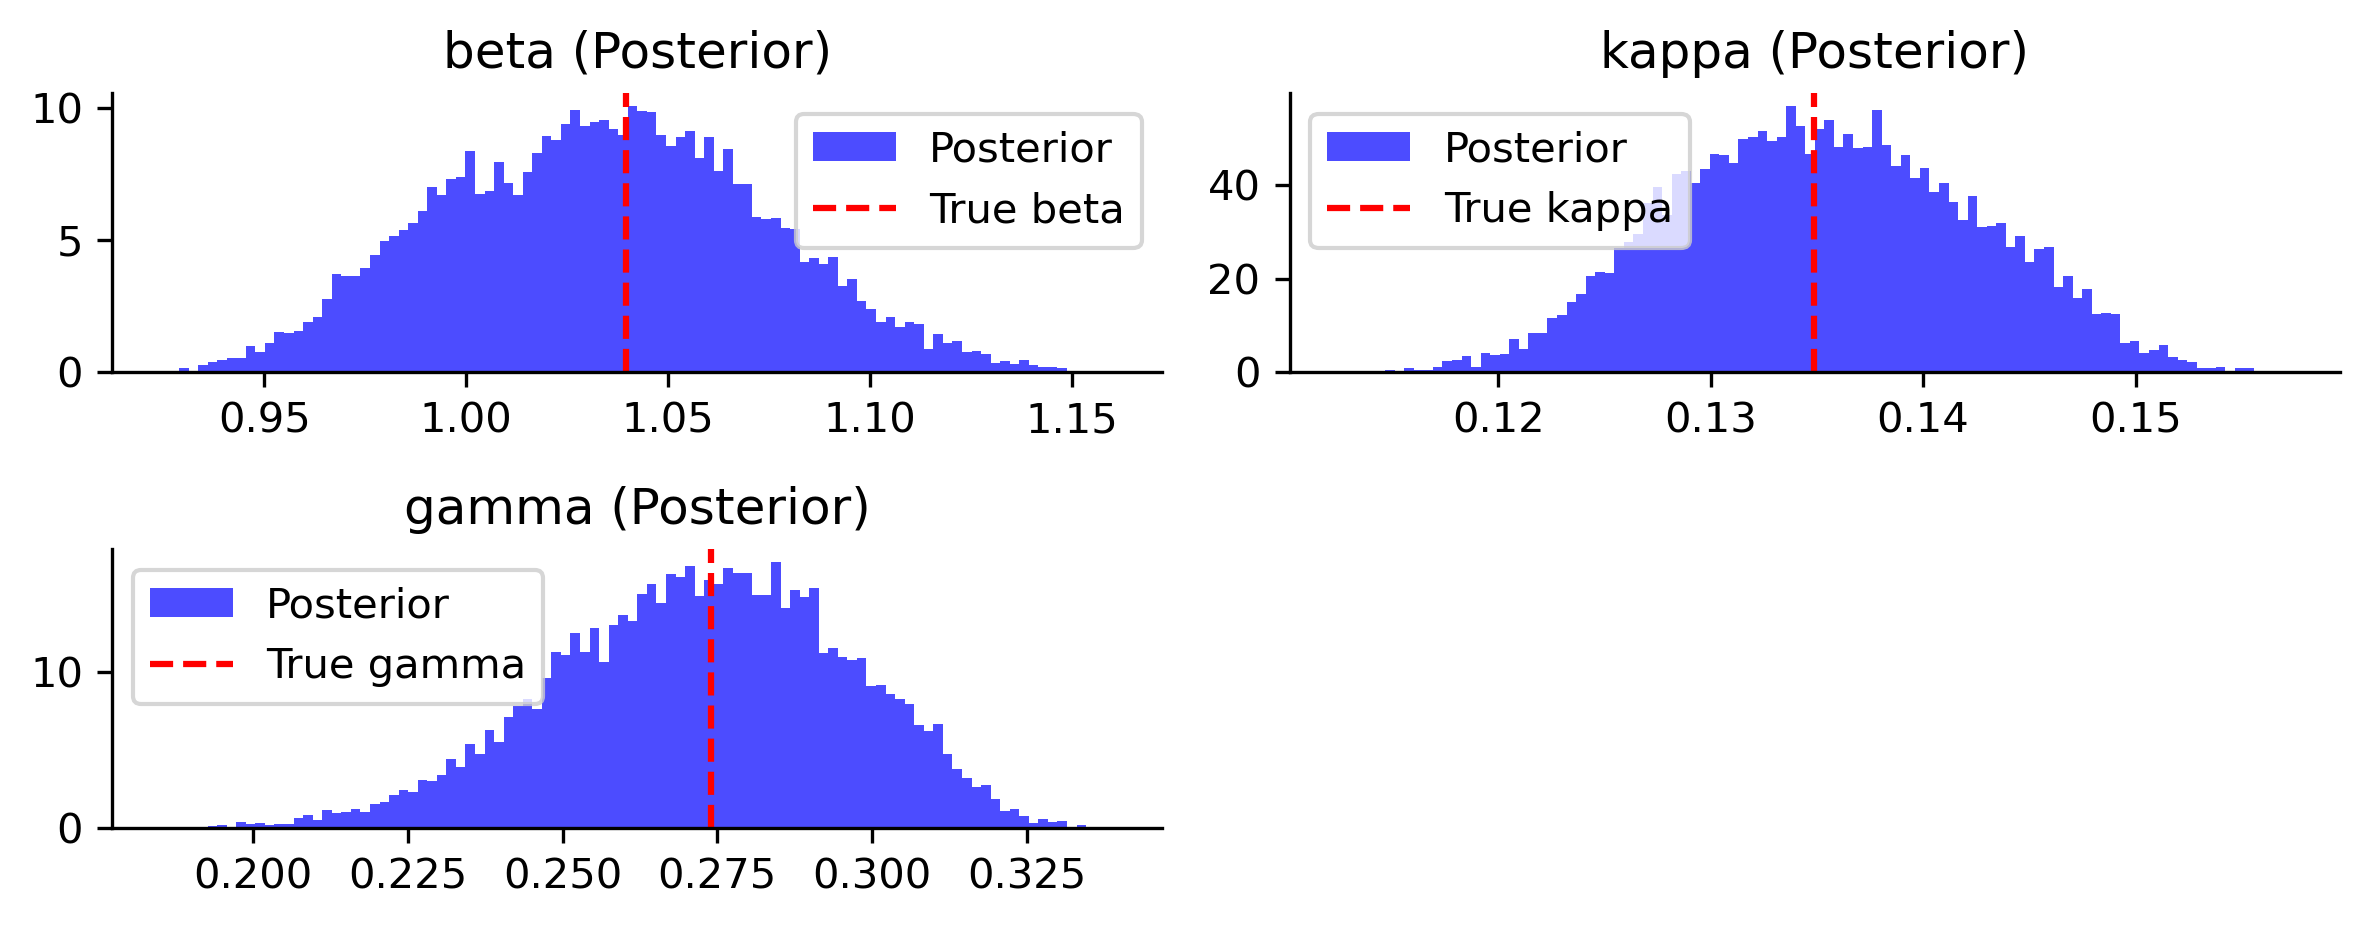

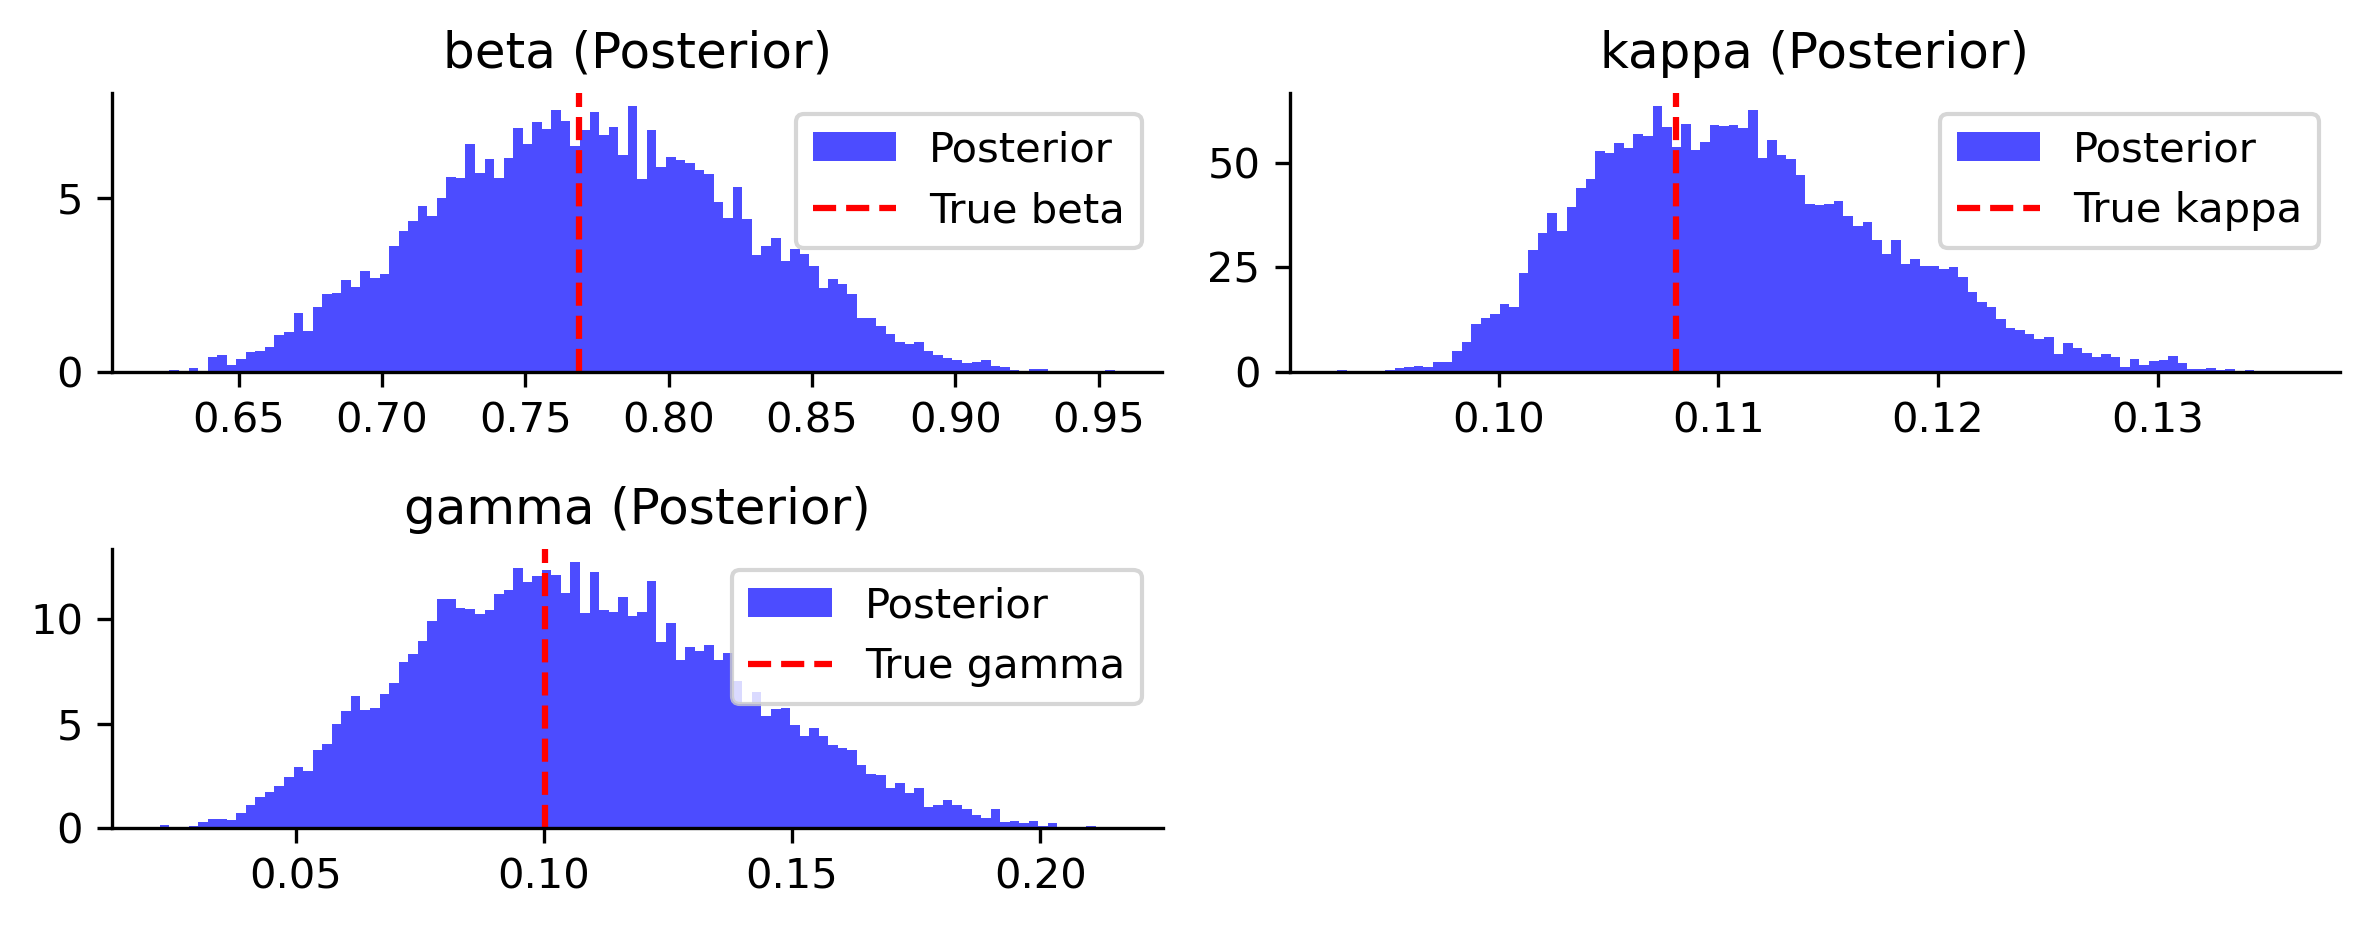

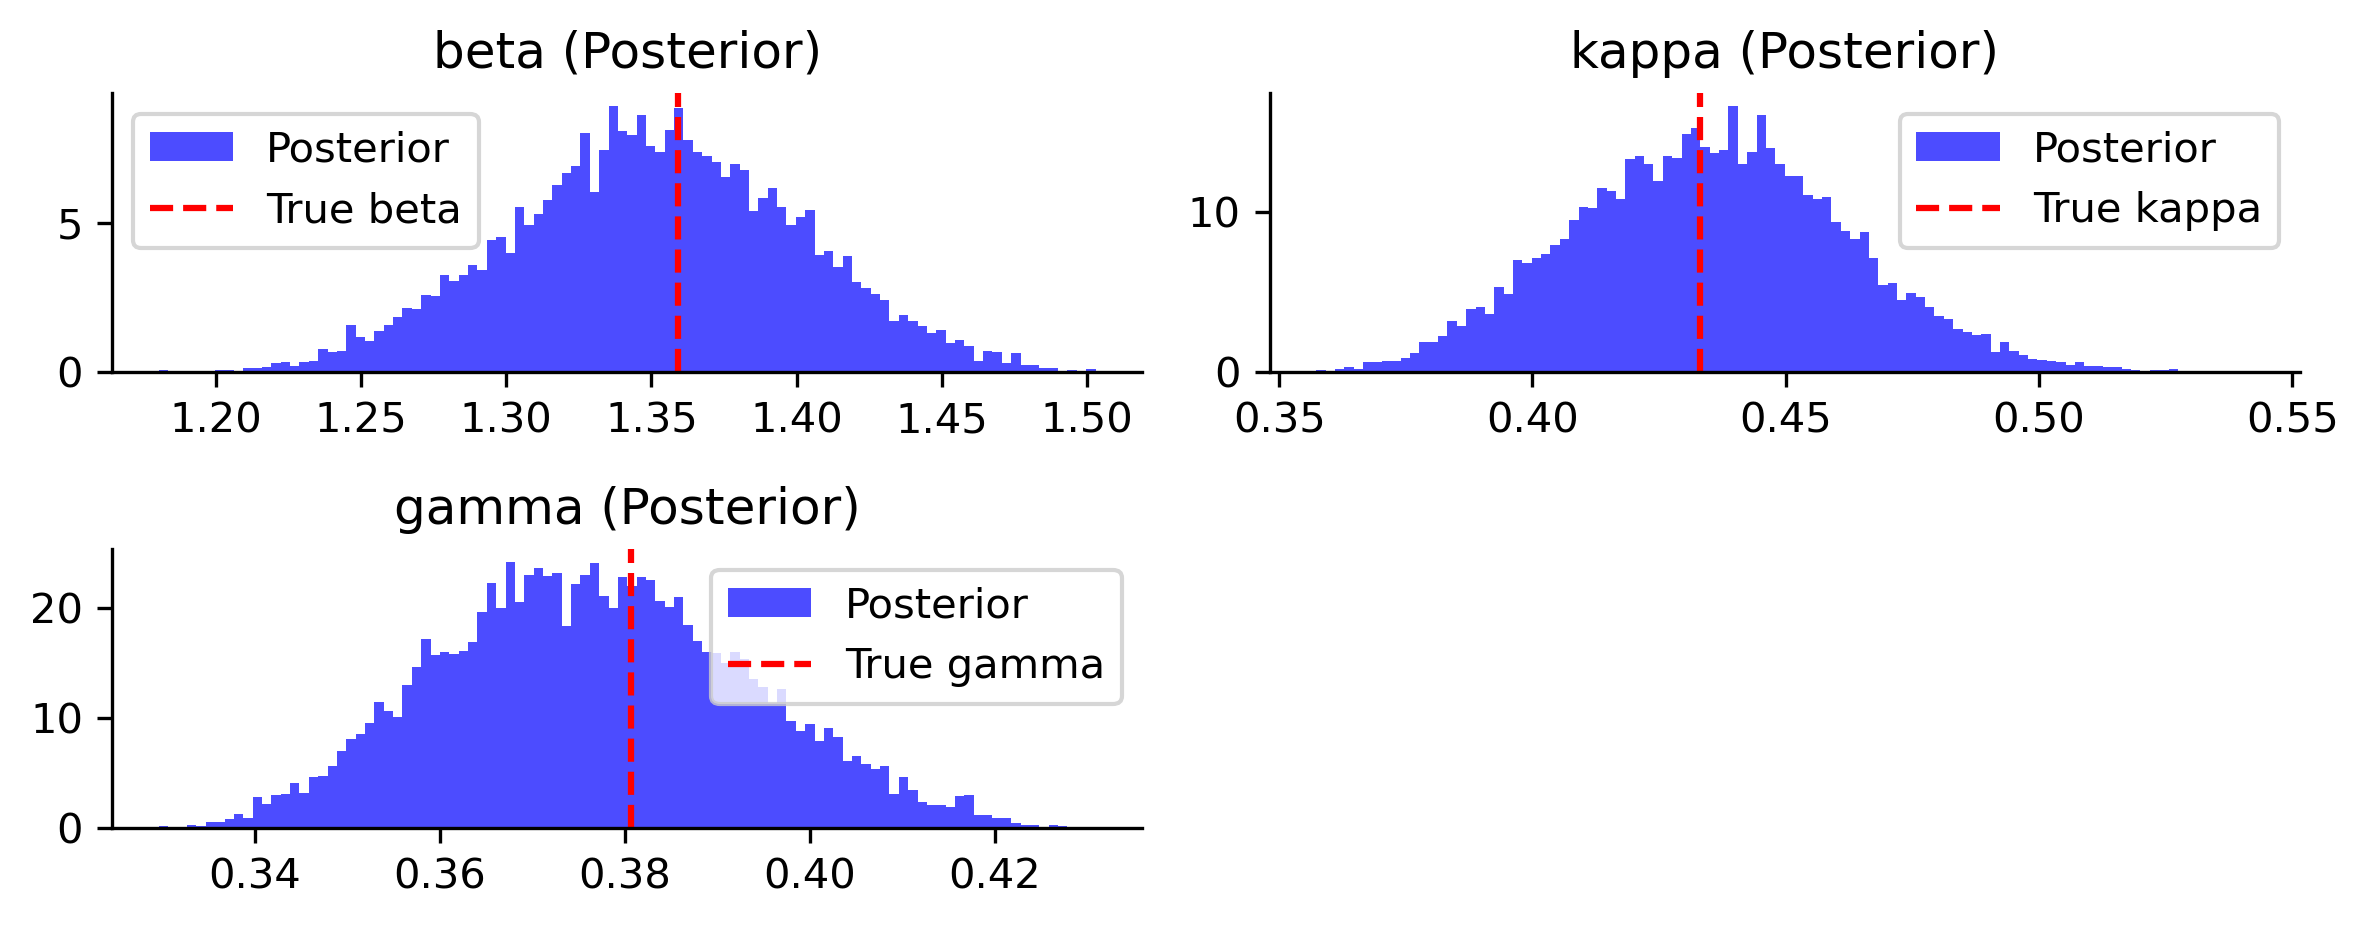

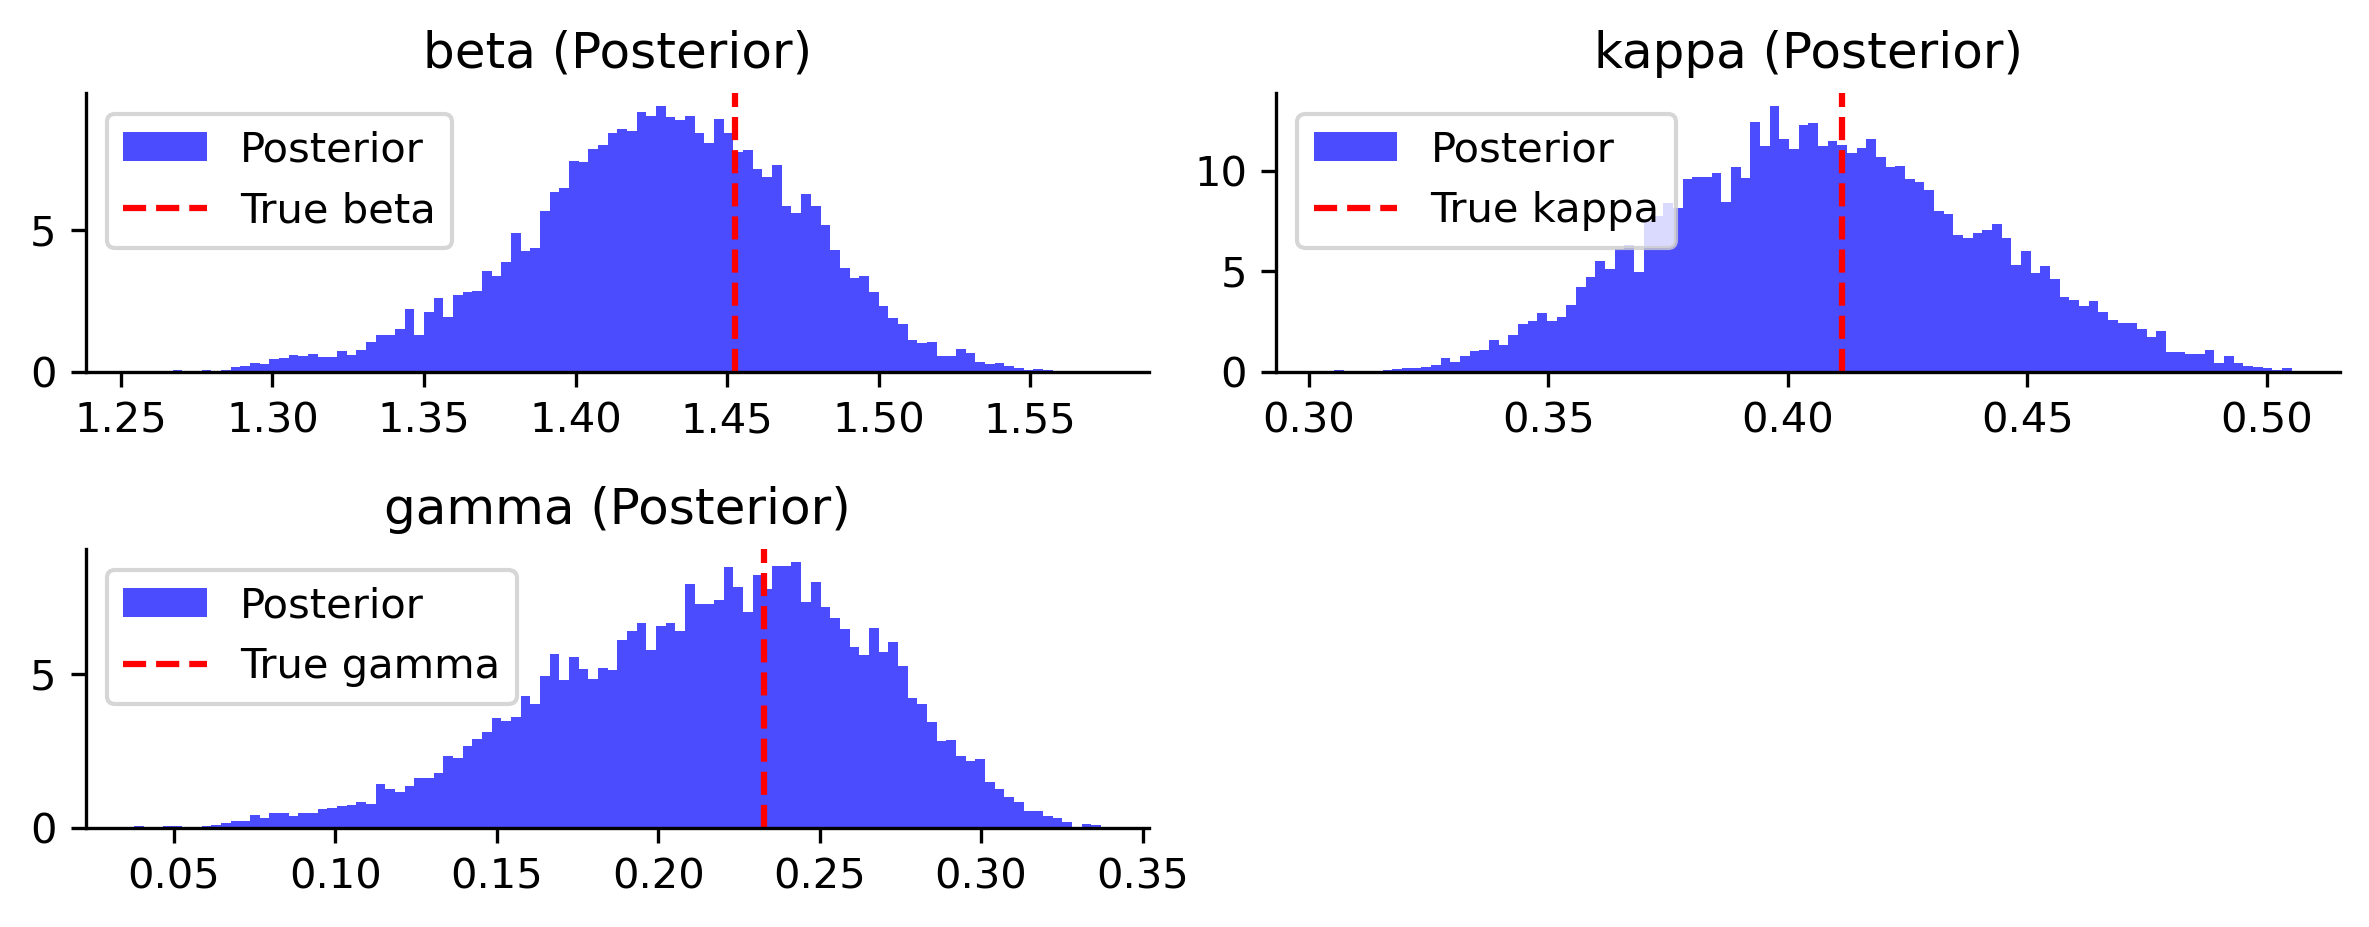

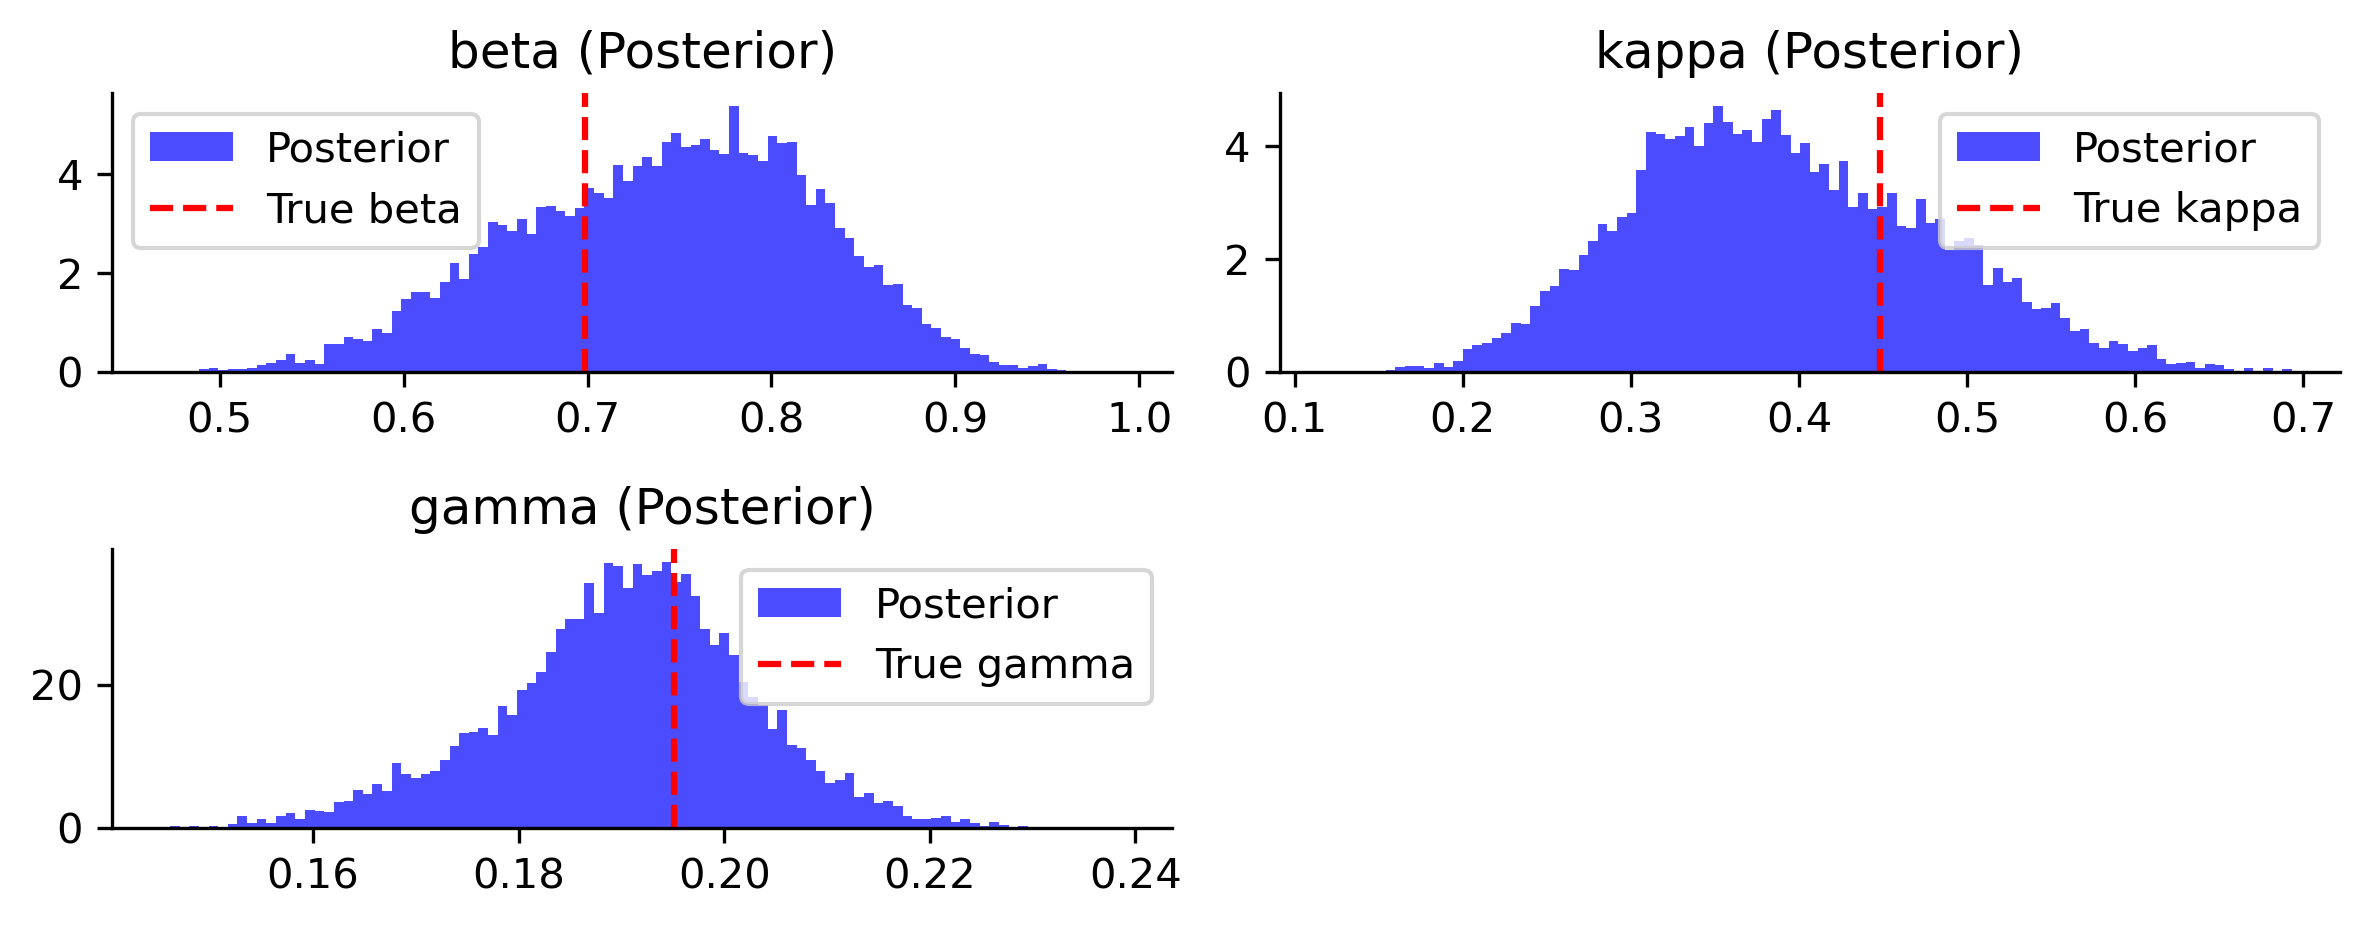

In [43]:
for k in range(10):
    samples = posterior_samples_100k[k]
    true_values = simulation_dataset[k]['params']
    plt.figure(figsize=(8, 6),dpi=300)
    for i in range(3):
        plt.subplot(4, 2, i + 1)
        plt.hist(samples.iloc[:,i], bins=100, alpha=0.7, label="Posterior", color='blue', density=True)
        plt.axvline(true_values[param_names[i]], color='red', linestyle='--', label=f"True {param_names[i]}")
        plt.title(f"{param_names[i]} (Posterior)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()

In [44]:
with open("./posterior/ABC_100k_posterior_samples.pkl", "wb") as f:
    pickle.dump(posterior_samples_100k, f)